# Ecommerce Capstone Project

## Contents
- <a href=#1>Business Objective
- <a href=#2>Data Understanding & Clean up
	- <a href=#3>Input file - Preprocessing
	- <a href=#4>Reading Master input data
	- <a href=#5>Outlier Treatment - GMV
	- <a href=#6>Sale day, Pay day, holiday feature addition
	- <a href=#7>Media Investment
	- <a href=#8>Product List - Percent
	- <a href=#9>Merging of product to sales data
	- <a href=#10>Convert categorical attributes to numeric
	- <a href=#11>Weather Data
	- <a href=#12>NPS & StockIndex
	- <a href=#13>List Price - new KPI
	- <a href=#14>Split Sales data into 3 categories
- <a href=#15>Gaming Accessory
	- <a href=#16>Data validation & Processing
	- <a href=#17>Data aggregation - Sales
	- <a href=#18>Data Analysis
	- <a href=#19>Model Building - Linear
        - <a href=#20>Summary
    - <a href=#26>Model Buidling - Multiplicative Model	
        - <a href=#27>Summary    
    - <a href=#28>Model Building-Distribution Model 
        - <a href=#29>Summary    
	- <a href=#21>Model Building - Koyck Model
		- <a href=#22>Summary
	- <a href=#23>Model Buidling - Multiplicative-Lag Model
		- <a href=#24>Summary  

## <div id=1></div>Business Objective

ElecKart is an e-commerce firm based out of Ontario, Canada specialising in electronic products. Over the last one year, they had spent a significant amount of money on marketing. Occasionally, they had also offered big-ticket promotions (similar to the Big Billion Day). 

They are about to create a marketing budget for the next year, which includes spending on commercials, online campaigns, and pricing & promotion strategies. The CFO feels that the money spent over the last 12 months on marketing was not sufficiently impactful, and, that they can either cut on the budget or reallocate it optimally across marketing levers to improve the revenue response.

Objective is to build the  <B>market mix model</B> which can indicate the <B>impact of the marketing spend on revenue</B> and present to CFO so to enable the spend on marketing is done wisely in the coming year.

Market Mix Model is required to be built for 3 categories using the data from <B>July 205 to June 2016</B>:
<B>
1. Camera Accessory
2. Gaming Accessory
3. Home Audio</B>

In [621]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import holidays
from pandas.tseries.offsets import CustomBusinessDay
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_colwidth',-1)
pd.set_option('display.max_columns', None)

## <div id=2></div>Data Understanding & Clean up

### <div id=3></div>Input file - Preprocessing

In [622]:
#### Processing of Product list and percent file
productlist = pd.read_excel('Media data and other information.xlsx', sheet_name='Product List')
productlist.drop(productlist.columns[0], axis=1,inplace=True)
productlist.columns = ['subcategory','Frequency','Percent']
productlist.head()

subcategory  Frequency   Percent
0  NaN                Frequency  Percent 
1  \N                 5828       0.353464
2  AmplifierReceiver  4056       0.245994
3  AudioMP3Player     112892     6.84682 
4  Binoculars         14599      0.885419

In [623]:
#### Processing of Investment data 
Mediainvestments=pd.read_excel('Media data and other information.xlsx', sheet_name='Media Investment', skiprows=2)
Mediainvestments=Mediainvestments[0:12]
Mediainvestments.fillna(0, inplace=True)
Mediainvestments

Year  Month  Total Investment        TV    Digital  Sponsorship  \
0   2015.0  7.0    17.061775         0.215330  2.533014   7.414270      
1   2015.0  8.0    5.064306          0.006438  1.278074   1.063332      
2   2015.0  9.0    96.254380         3.879504  1.356528   62.787651     
3   2015.0  10.0   170.156297        6.144711  12.622480  84.672532     
4   2015.0  11.0   51.216220         4.220630  1.275469   14.172116     
5   2015.0  12.0   106.745312        5.397502  3.063360   56.705419     
6   2016.0  1.0    74.196000         4.380000  0.456000   4.200000      
7   2016.0  2.0    48.052000         2.586008  1.912651   11.725555     
8   2016.0  3.0    100.024621        9.300000  2.100000   41.590000     
9   2016.0  4.0    56.848241         5.205196  0.871892   24.308354     
10  2016.0  5.0    78.057000         1.370000  0.770000   31.680000     
11  2016.0  6.0    42.834216         1.662717  1.420761   25.048541     

    Content Marketing  Online marketing   Affiliates        SEM  Radio  \
0   0.000933           1.327278          0.547254     5.023697   0.00    
1   0.000006           0.129244          0.073684     2.513528   0.00    
2   0.610292           16.379990         5.038266     6.202149   0.00    
3   3.444075           24.371778         6.973711     31.927011  0.00    
4   0.168633           19.561574         6.595767     5.222032   0.00    
5   1.067307           22.503756         6.826938     11.181030  0.00    
6   0.900000           22.900000         7.370000     4.200000   2.70    
7   0.596771           19.892366         6.465019     4.873630   0.00    
8   0.370000           18.437818         6.217667     5.193591   0.87    
9   0.034876           16.514510         5.693456     4.219958   0.00    
10  0.790000           23.650000         6.800000     6.910000   1.10    
11  0.045081           7.971300          2.768023     3.735516   0.00    

        Other  
0   0.000000   
1   0.000000   
2   0.000000   
3   0.000000   
4   0.000000   
5   0.000000   
6   27.090000  
7   0.000000   
8   15.945545  
9   0.000000   
10  4.987000   
11  0.000000

In [624]:
#### Processing of NPS and StockIndex data
nps_stock=pd.read_excel('Media data and other information.xlsx', sheet_name='Monthly NPS Score', skiprows=1)
nps_stock=nps_stock.T
new_header = nps_stock.iloc[0] 
nps_stock = nps_stock[1:] 
nps_stock.columns=['NPS','StockIndex']
nps_stock['Month']=nps_stock.index
nps_stock['Month']=nps_stock['Month'].str.replace('July','Jul',1)
nps_stock['Month']=nps_stock['Month'].str.replace('Sept','Sep',1)
nps_stock['Month']=nps_stock['Month'].str.replace('June','Jun',1)
# nps_stock.columns=['NPS','StockIndex','Month']
nps_stock['NPS']=pd.to_numeric(nps_stock['NPS'],errors='coerce')
nps_stock['StockIndex']=pd.to_numeric(nps_stock['StockIndex'],errors='coerce')
nps_stock

NPS  StockIndex   Month
July'15  54.599588  1177.0      Jul'15
Aug'15   59.987101  1206.0      Aug'15
Sept'15  46.925419  1101.0      Sep'15
Oct'15   44.398389  1210.0      Oct'15
Nov'15   47.000000  1233.0      Nov'15
Dec'15   45.800000  1038.0      Dec'15
Jan'16   47.093031  1052.0      Jan'16
Feb'16   50.327406  1222.0      Feb'16
Mar'16   49.020550  1015.0      Mar'16
Apr'16   51.827605  1242.0      Apr'16
May'16   47.306951  1228.0      May'16
June'16  50.516687  1194.0      Jun'16

In [625]:
#### Sale Day processing
sale_day=['7/18/2015', '7/19/2015', '8/15/2015', '8/16/2015', '8/17/2015',
       '8/28/2015', '8/29/2015', '8/30/2015', '10/15/2015', '10/16/2015',
       '10/17/2015', '11/7/2015', '11/8/2015', '11/9/2015', '11/10/2015',
       '11/11/2015', '11/12/2015', '11/13/2015', '11/14/2015', '12/25/2015',
       '12/26/2015', '12/27/2015', '12/28/2015', '12/29/2015', '12/30/2015',
       '12/31/2015', '1/1/2016', '1/2/2016', '1/3/2016', '1/20/2016',
       '1/20/2016', '1/22/2016', '2/1/2016', '2/2/2016', '2/14/2016',
       '2/15/2016', '2/20/2016', '2/21/2016', '3/7/2016', '3/8/2016',
       '3/9/2016', '5/25/2016', '5/26/2016', '5/27/2016']

sale_day=pd.DataFrame(sale_day)
sale_day.columns=['SaleDay']
sale_day.head(3)

SaleDay
0  7/18/2015
1  7/19/2015
2  8/15/2015

### <div id=4></div>Reading Master input data

In [626]:
sales_master=pd.read_csv('ConsumerElectronics.csv',encoding='latin-1')

In [627]:
sales_master.head()

fsn_id           order_date  Year  Month      order_id  \
0  ACCCX3S58G7B5F6P  2015-10-17 15:11:54  2015  10     3.419301e+15   
1  ACCCX3S58G7B5F6P  2015-10-19 10:07:22  2015  10     1.420831e+15   
2  ACCCX3S5AHMF55FV  2015-10-20 15:45:56  2015  10     2.421913e+15   
3  ACCCX3S5AHMF55FV  2015-10-14 12:05:15  2015  10     4.416592e+15   
4  ACCCX3S5AHMF55FV  2015-10-17 21:25:03  2015  10     4.419525e+15   

   order_item_id   gmv  units deliverybdays deliverycdays  \
0  3.419301e+15   6400  1      \N            \N             
1  1.420831e+15   6900  1      \N            \N             
2  2.421913e+15   1990  1      \N            \N             
3  4.416592e+15   1690  1      \N            \N             
4  4.419525e+15   1618  1      \N            \N             

  s1_fact.order_payment_type  sla                 cust_id  \
0  COD                        5    -1.01299130778588E+018   
1  COD                        7    -8.99032457905512E+018   
2  COD                        10   -1.0404429420466E+018    
3  Prepaid                    4    -7.60496084352714E+018   
4  Prepaid                    6    2.8945572083453E+018     

                  pincode product_analytic_super_category  \
0  -7.79175582905735E+018  CE                               
1  7.33541149097431E+018   CE                               
2  -7.47768776228657E+018  CE                               
3  -5.83593163877661E+018  CE                               
4  5.34735360997242E+017   CE                               

  product_analytic_category product_analytic_sub_category  \
0  CameraAccessory           CameraAccessory                
1  CameraAccessory           CameraAccessory                
2  CameraAccessory           CameraAccessory                
3  CameraAccessory           CameraAccessory                
4  CameraAccessory           CameraAccessory                

  product_analytic_vertical  product_mrp  product_procurement_sla  
0  CameraTripod              7190         0                        
1  CameraTripod              7190         0                        
2  CameraTripod              2099         3                        
3  CameraTripod              2099         3                        
4  CameraTripod              2099         3

In [628]:
sales_master.shape
### 1.6Mn records present in master sales data with 20 features.

(1648824, 20)

In [629]:
sales_master.Year.unique()

array([2015, 2016], dtype=int64)

In [630]:
sales_master.Month.unique()

array([10, 11,  4,  3,  9,  2,  1, 12,  8,  5,  6,  7], dtype=int64)

In [631]:
### Fetch data from July 2015 to June 2016 for analysis.
sales=sales_master.loc[((sales_master.Year == 2015) & (sales_master.Month > 6 ) ) | ((sales_master.Year ==2016) &(sales_master.Month <7)) ]

In [632]:
sales.shape

(1648215, 20)

In [633]:
### Fetch data only specific to 3 categories - CameraAccessory, HomeAudio & GamingAccessory.
sales=sales.loc[((sales.product_analytic_sub_category =='CameraAccessory')|(sales.product_analytic_sub_category =='HomeAudio')|(sales.product_analytic_sub_category =='GamingAccessory'))]

In [634]:
sales.shape

(566067, 20)

In [635]:
sales['order_date_formatted'] = pd.to_datetime(sales.order_date , format = '%Y-%m-%d %H:%M:%S')
sales['day']=sales['order_date_formatted'].dt.day

In [636]:
### Blank values seen for GMV . 
sales.loc[(sales.gmv == ' ')]

fsn_id           order_date  Year  Month      order_id  \
8        ACCCX3S5JGAJETYR  2015-10-16 00:49:14  2015  10     2.417870e+15   
95       ACCCX3SGAR6NNBMR  2015-10-05 13:25:48  2015  10     2.408842e+15   
124      ACCCX3SGDGPZAQXD  2015-10-16 01:49:30  2015  10     4.417909e+15   
142      ACCCX3SGDGPZAQXD  2015-10-16 22:59:20  2015  10     4.418717e+15   
186      ACCCX3SGDGPZAQXD  2015-10-16 07:30:25  2015  10     4.418158e+15   
...                   ...                  ...   ...  ..              ...   
1644956  TESE8QG5TPDQFYUN  2015-09-06 14:32:32  2015  9      3.381988e+15   
1644979  TESE94HWYUNW5JMW  2015-09-17 15:49:52  2015  9      3.393404e+15   
1645021  TESE94HWYUNW5JMW  2015-09-24 23:35:38  2015  9      3.399732e+15   
1646976  VORDF83RSGB5BENW  2015-09-28 13:42:45  2015  9      3.402826e+15   
1647019  VORDFBFYGEHTVQHP  2015-09-01 21:47:07  2015  9      2.378843e+15   

         order_item_id gmv  units deliverybdays deliverycdays  \
8        2.417870e+15       1      \N            \N             
95       2.408842e+15       1      \N            \N             
124      4.417909e+15       1      \N            \N             
142      4.418717e+15       1      \N            \N             
186      4.418158e+15       1      \N            \N             
...               ...  ..  ..      ..            ..             
1644956  3.000373e+17       1      \N            \N             
1644979  3.393404e+15       1      \N            \N             
1645021  3.399732e+15       1      \N            \N             
1646976  3.402826e+15       1      \N            \N             
1647019  2.378843e+15       1      \N            \N             

        s1_fact.order_payment_type  sla cust_id pincode  \
8        Prepaid                    9                     
95       Prepaid                    3                     
124      Prepaid                    6                     
142      Prepaid                    6                     
186      Prepaid                    6                     
...          ...                   ..   ..      ..        
1644956  Prepaid                    5                     
1644979  Prepaid                    6                     
1645021  Prepaid                    6                     
1646976  Prepaid                    10                    
1647019  Prepaid                    2                     

        product_analytic_super_category product_analytic_category  \
8        CE                              CameraAccessory            
95       CE                              CameraAccessory            
124      CE                              CameraAccessory            
142      CE                              CameraAccessory            
186      CE                              CameraAccessory            
...      ..                                          ...            
1644956  CE                              CameraAccessory            
1644979  CE                              CameraAccessory            
1645021  CE                              CameraAccessory            
1646976  CE                              EntertainmentSmall         
1647019  CE                              EntertainmentSmall         

        product_analytic_sub_category product_analytic_vertical  product_mrp  \
8        CameraAccessory               CameraTripod              4044          
95       CameraAccessory               Lens                      7150          
124      CameraAccessory               Lens                      17995         
142      CameraAccessory               Lens                      17995         
186      CameraAccessory               Lens                      17995         
...                  ...                ...                        ...         
1644956  CameraAccessory               Telescope                 3000          
1644979  CameraAccessory               Telescope                 1000          
1645021  CameraAccessory               Telescope       

In [637]:
len(sales.loc[(sales.gmv == ' ')])

1672

In [638]:
# The column gmv is character type, convert it to float
sales['gmv'] = pd.to_numeric(sales['gmv'],errors='coerce')

In [639]:
### Set GMV as units * mrp where it is blank
sales['gmv']=sales.apply(lambda X : X.units*X.product_mrp if X.gmv ==' ' else X.gmv, axis=1)

In [640]:
### Set GMV as units * mrp where GMV is less than units * mrp
sales['gmv']=sales.apply(lambda X :(X.product_mrp*X.units) if (float(X.gmv) > (X.product_mrp*X.units)) else X.gmv, axis=1)

In [641]:
import math
sales['gmv']=sales.apply(lambda X :(X.product_mrp*X.units) if (math.isnan(X.gmv)) else X.gmv, axis=1)

In [642]:
len(sales.loc[(sales.gmv==0)])

3687

In [643]:
sales.loc[(sales.gmv.isnull())]

Empty DataFrame
Columns: [fsn_id, order_date, Year, Month, order_id, order_item_id, gmv, units, deliverybdays, deliverycdays, s1_fact.order_payment_type, sla, cust_id, pincode, product_analytic_super_category, product_analytic_category, product_analytic_sub_category, product_analytic_vertical, product_mrp, product_procurement_sla, order_date_formatted, day]
Index: []

In [644]:
sales.loc[(sales.gmv==0)]

fsn_id           order_date  Year  Month      order_id  \
12807    ACCDGXGZQUGHFYHT  2015-10-23 19:26:01  2015  10     1.424635e+15   
15031    ACCDHHZZGFBDPJRP  2015-10-20 21:27:29  2015  10     3.422118e+15   
15032    ACCDHHZZGFBDPJRP  2015-10-28 23:49:41  2015  10     2.429117e+15   
15529    ACCDHTZ4CZCECAFF  2015-10-27 01:05:20  2015  10     1.427429e+15   
16980    ACCDK94FSKCZBJCU  2015-10-28 18:36:07  2015  10     4.428925e+15   
...                   ...                  ...   ...  ..              ...   
1579561  ACCE44KFZKEGJ5FS  2015-09-13 19:24:37  2015  9      3.390072e+15   
1582812  ACCE5FZYHMQ2CAGK  2015-09-19 14:45:49  2015  9      4.395092e+15   
1582813  ACCE5FZYHMQ2CAGK  2015-09-26 12:42:05  2015  9      1.401061e+15   
1582880  ACCE5GCFRVSMNTHH  2015-09-05 13:08:03  2015  9      3.381988e+15   
1584253  ACCE6BE4EEK3HYWC  2015-09-07 19:10:02  2015  9      3.381988e+15   

         order_item_id  gmv  units deliverybdays deliverycdays  \
12807    1.424635e+15   0.0  1      \N            \N             
15031    3.422118e+15   0.0  1      \N            \N             
15032    2.429117e+15   0.0  1      \N            \N             
15529    1.427429e+15   0.0  1      \N            \N             
16980    4.428925e+15   0.0  1      \N            \N             
...               ...   ... ..      ..            ..             
1579561  3.390072e+15   0.0  1      \N            \N             
1582812  4.395092e+15   0.0  1      \N            \N             
1582813  1.401061e+15   0.0  1      \N            \N             
1582880  3.000373e+17   0.0  1      \N            \N             
1584253  3.000373e+17   0.0  1      \N            \N             

        s1_fact.order_payment_type  sla                 cust_id  \
12807    COD                        5    1.95757717948634E+018    
15031    Prepaid                    6    4.4039953528426E+018     
15032    COD                        8    2.02066165332605E+018    
15529    COD                        7    2.54451421812842E+018    
16980    Prepaid                    6    7.46177327353558E+018    
...          ...                   ..                      ...    
1579561  COD                        4    -2.47512344829113E+018   
1582812  COD                        12   -1.97947353885972E+017   
1582813  COD                        6    5.9580459151875E+018     
1582880  COD                        6    -5.7638907749992E+018    
1584253  Prepaid                    6    -5.99314555019433E+018   

                        pincode product_analytic_super_category  \
12807    -4.61973414463541E+018  CE                               
15031    1.15136841865603E+018   CE                               
15032    -5.73945007094169E+018  CE                               
15529    8.25363017907057E+018   CE                               
16980    1.84021085056852E+018   CE                               
...                        ...   ..                               
1579561  -7.008123264312E+018    CE                               
1582812  8.00910274715175E+018   CE                               
1582813  4.80060717761072E+018   CE                               
1582880  -7.08185663429652E+018  CE                               
1584253  9.03774187950348E+017   CE                               

        product_analytic_category product_analytic_sub_category  \
12807    GamingHardware            GamingAccessory                
15031    CameraAccessory           CameraAccessory                
15032    CameraAccessory           CameraAccessory                
15529    CameraAccessory           CameraAccessory                
16980    EntertainmentSmall        HomeAudio                      
...                     ...              ...                      
1579561  GamingHardware            GamingAccessory                
1582812  CameraAccessory           CameraAccessory                
1582813  CameraAccessory           CameraAccessory                
1582880  CameraAccess

In [645]:
### Drop the values where GMV is zero as this can be incorrect. There is no other data to certify why they are 0. 
sales=sales.loc[(sales.gmv != 0)]

In [646]:
### Check for records with MRP as 0.
len(sales.loc[(sales.product_mrp == 0)])/len(sales.index)

0.0

In [647]:
### convert mrp as float
sales['product_mrp']= sales['product_mrp'].astype(float)

In [648]:
## Discount calculation - new KPI 
sales['discount_per']=(((sales.product_mrp * sales.units)-(sales.gmv.astype(float)))/(sales.product_mrp * sales.units))*100

In [649]:
sales['discount_per'].replace([np.inf, -np.inf],0,inplace=True)

In [650]:
sales.loc[(sales['discount_per'] <0 )]

Empty DataFrame
Columns: [fsn_id, order_date, Year, Month, order_id, order_item_id, gmv, units, deliverybdays, deliverycdays, s1_fact.order_payment_type, sla, cust_id, pincode, product_analytic_super_category, product_analytic_category, product_analytic_sub_category, product_analytic_vertical, product_mrp, product_procurement_sla, order_date_formatted, day, discount_per]
Index: []

In [651]:
### Check for null values and impute by 0 for delivery delays .
sales.deliverybdays.unique()

array(['\\N', '5', '4', '6', '8', '7', '3', '9', '2', '18', '10', '32',
       '1', '14', '13', '0', '12', '11', '15', '16', '23', '36', '35',
       '19', '26', '17', '20', '53', '-71', '22', '25', '-39', '-72',
       '-41', '21', '-14', '-45', '-56', '24', '-73', '61', '30'],
      dtype=object)

In [652]:
sales.deliverybdays.replace('\\N','0',inplace=True)

In [653]:
sales.deliverycdays.unique()

array(['\\N', '6', '5', '7', '9', '4', '11', '3', '8', '20', '37', '12',
       '2', '1', '16', '17', '15', '14', '10', '13', '21', '18', '19',
       '27', '42', '41', '23', '31', '24', '0', '61', '-832', '26', '22',
       '-836', '29', '-466', '-848', '-844', '-482', '25', '-16', '-532',
       '-655', '28', '-859', '72', '35'], dtype=object)

In [654]:
sales.deliverycdays.replace('\\N','0',inplace=True)

In [655]:
sales.units.unique()

array([ 1,  2, 10,  4,  3,  6,  7,  8, 12, 34,  5, 17,  9, 21, 39, 15, 13,
       18, 19], dtype=int64)

In [656]:
sales.product_procurement_sla.unique()

array([ 0,  3,  5, -1,  1,  6,  2,  7,  4, 13, 14, 10,  9, 12,  8, 15],
      dtype=int64)

In [657]:
#transform negitive sla to zeros 
sales.loc[sales['product_procurement_sla'] < 0, 'product_procurement_sla'] = 0

In [658]:
sales.product_mrp.unique()

array([7190., 2099., 4044., ..., 1053., 9775., 3341.])

In [659]:
sales.product_analytic_vertical.unique()

array(['CameraTripod', 'Lens', 'CameraBag', 'Flash', 'CameraBattery',
       'CameraBatteryCharger', 'GamePad', 'GamingAccessoryKit',
       'GamingHeadset', 'GamingMemoryCard', 'MotionController',
       'GamingMouse', 'GamingAdapter', 'TVOutCableAccessory', 'GamingGun',
       'JoystickGamingWheel', 'HomeAudioSpeaker', 'CameraRemoteControl',
       'Binoculars', 'Filter', 'GamingMousePad', 'Strap',
       'GamingKeyboard', 'Dock', 'SlingBox', 'GamingSpeaker',
       'CoolingPad', 'BoomBox', 'CameraBatteryGrip', 'CameraAccessory',
       'CameraFilmRolls', 'CameraMount', 'DockingStation', 'DJController',
       'ExtensionTube', 'FMRadio', 'HiFiSystem', 'KaraokePlayer',
       'Telescope', 'VoiceRecorder', 'GamingChargingStation',
       'CameraEyeCup', 'GameControlMount', 'SoundMixer', 'CameraLEDLight',
       'CameraMicrophone', 'FlashShoeAdapter', 'Softbox',
       'ReflectorUmbrella', 'Teleconverter', 'CameraHousing'],
      dtype=object)

In [660]:
sales.product_analytic_sub_category.unique()

array(['CameraAccessory', 'GamingAccessory', 'HomeAudio'], dtype=object)

In [661]:
sales.product_analytic_super_category.unique()

array(['CE'], dtype=object)

In [662]:
sales.sla.unique()

array([ 5,  7, 10,  4,  6,  9,  8,  2,  3, 12,  1, 13, 11, 14, 19, 15, 17,
       16, 20, 18,  0, 21, 25, 22, 41, 23, 60, 24, 29, 26, 27, 30, 42, 28,
       37, 31, 39, 35, 32], dtype=int64)

In [663]:
sales['s1_fact.order_payment_type'].unique()

array(['COD', 'Prepaid'], dtype=object)

In [664]:
sales['date']=sales.order_date_formatted.apply(lambda x : x.date())

### <div id=5></div>Outlier Treatment - GMV

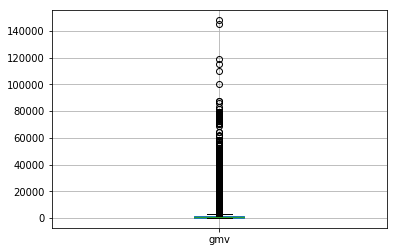

In [665]:
### Outlier check for gmv
boxplot = sales.boxplot(column=['gmv'])

In [666]:
## Finding the standard deviation of the features.
sales.std(axis = 0, skipna = True)

Year                       4.986571e-01
Month                      3.616032e+00
order_id                   1.270620e+15
order_item_id              5.710212e+16
gmv                        2.458177e+03
units                      2.510338e-01
sla                        2.701323e+00
product_mrp                4.700260e+03
product_procurement_sla    1.689143e+00
day                        8.693521e+00
discount_per               2.446097e+01
dtype: float64

In [667]:
sales.shape

(562380, 24)

In [668]:
len(sales.loc[(sales.gmv <= 3*2.458177e+03)])

551041

In [669]:
len(sales.loc[(sales.gmv >= 0.1*2.458177e+03)])

473194

In [670]:
### Remove rows with > 3 times standard deviation and less than 0.1 times the standard deviation .
sales=sales.loc[(sales.gmv <= 3*2.458177e+03) & (sales.gmv >= 0.1*2.458177e+03)]

In [671]:
sales.shape

(461855, 24)

### <div id=6></div>Sale day, Pay day, holiday feature addition

In [672]:
## Pay day marking. All Paydays - 01st and 15th of a month .
sales['payday']=sales['day'].apply(lambda x : 1 if (x == 1)|(x==15) else 0)

In [673]:
## Sale days 
sale_day['saleday_formatted']= pd.to_datetime(sale_day.SaleDay)
list_sale=set(sale_day.saleday_formatted.dt.date)
sales['saleday']=sales['order_date_formatted'].apply(lambda x : 1 if x.date() in list_sale else 0)

In [674]:
sales.loc[(sales.order_date == '2015-10-17 21:25:03')]

fsn_id           order_date  Year  Month      order_id  \
4  ACCCX3S5AHMF55FV  2015-10-17 21:25:03  2015  10     4.419525e+15   

   order_item_id     gmv  units deliverybdays deliverycdays  \
4  4.419525e+15   1618.0  1      0             0              

  s1_fact.order_payment_type  sla               cust_id  \
4  Prepaid                    6    2.8945572083453E+018   

                 pincode product_analytic_super_category  \
4  5.34735360997242E+017  CE                               

  product_analytic_category product_analytic_sub_category  \
4  CameraAccessory           CameraAccessory                

  product_analytic_vertical  product_mrp  product_procurement_sla  \
4  CameraTripod              2099.0       3                         

  order_date_formatted  day  discount_per        date  payday  saleday  
4 2015-10-17 21:25:03   17   22.915674     2015-10-17  0       1

In [675]:
round(100*(sales.isnull().sum()/len(sales.index)), 2)

fsn_id                             0.0
order_date                         0.0
Year                               0.0
Month                              0.0
order_id                           0.0
order_item_id                      0.0
gmv                                0.0
units                              0.0
deliverybdays                      0.0
deliverycdays                      0.0
s1_fact.order_payment_type         0.0
sla                                0.0
cust_id                            0.0
pincode                            0.0
product_analytic_super_category    0.0
product_analytic_category          0.0
product_analytic_sub_category      0.0
product_analytic_vertical          0.0
product_mrp                        0.0
product_procurement_sla            0.0
order_date_formatted               0.0
day                                0.0
discount_per                       0.0
date                               0.0
payday                             0.0
saleday                  

In [676]:
### Holiday data for Ontario from July 2015 to Jun 2016 
canon_cal = CustomBusinessDay(calendar=holidays.CA())
rng = pd.Series(pd.date_range(start="7/1/2015",end="6/30/2016", freq=canon_cal)).to_frame("Date")
df = pd.Series(pd.date_range("2015-07-01","2016-06-30")).to_frame("Date")

In [677]:
weekend=df.merge(rng, how='left', indicator=True).query('_merge == "left_only"').drop(['_merge'],axis=1).sort_values(by='Date')
CA_holidays = holidays.CountryHoliday('CA', prov='ON', state='ON')['2015-07-01': '2016-06-30']
CA_holidays=pd.to_datetime(CA_holidays,format = '%Y-%m-%d %H:%M:%S')
CA_holidays=pd.DataFrame(CA_holidays,columns=['Date'])
CA_holidays=CA_holidays.append(weekend,sort=True).sort_values(by='Date')
CA_holidays['Holiday']=CA_holidays['Date'].apply(lambda x:1)
CA_holidays.head(5)

Date  Holiday
0  2015-07-01  1      
3  2015-07-04  1      
4  2015-07-05  1      
10 2015-07-11  1      
11 2015-07-12  1

In [678]:
list_holiday=set(CA_holidays.Date.dt.date)
sales['holiday']=sales.date.apply(lambda X: 1 if X in (list_holiday) else 0)

In [679]:
sales.loc[(sales.holiday==1)]

fsn_id           order_date  Year  Month      order_id  \
0        ACCCX3S58G7B5F6P  2015-10-17 15:11:54  2015  10     3.419301e+15   
4        ACCCX3S5AHMF55FV  2015-10-17 21:25:03  2015  10     4.419525e+15   
5        ACCCX3S5JGAJETYR  2015-10-17 12:07:24  2015  10     3.419189e+15   
9        ACCCX3S5JGAJETYR  2015-10-25 22:52:34  2015  10     4.426482e+15   
12       ACCCX3SG2GG9YYAH  2015-10-10 22:10:51  2015  10     3.413503e+15   
...                   ...                  ...   ...  ..              ...   
1647192  VOREYV2HWZDUFZ9Y  2015-09-06 12:48:37  2015  9      3.381988e+15   
1647194  VOREYV2HWZDUFZ9Y  2015-09-13 10:39:31  2015  9      3.389756e+15   
1647195  VOREYV2HWZDUFZ9Y  2015-09-27 18:03:31  2015  9      3.402125e+15   
1647197  VOREYV2HWZDUFZ9Y  2015-09-07 23:25:57  2015  9      3.381988e+15   
1647203  VOREYV2HWZDUFZ9Y  2015-09-06 22:14:34  2015  9      3.381988e+15   

         order_item_id     gmv  units deliverybdays deliverycdays  \
0        3.419301e+15   6400.0  1      0             0              
4        4.419525e+15   1618.0  1      0             0              
5        3.419189e+15   3324.0  1      0             0              
9        4.426482e+15   3695.0  1      0             0              
12       3.413503e+15   6750.0  1      0             0              
...               ...      ... ..     ..            ..              
1647192  3.000373e+17   4599.0  1      0             0              
1647194  3.389756e+15   4399.0  1      0             0              
1647195  3.402125e+15   5200.0  1      0             0              
1647197  3.000373e+17   4299.0  1      0             0              
1647203  3.000373e+17   4299.0  1      0             0              

        s1_fact.order_payment_type  sla                 cust_id  \
0        COD                        5    -1.01299130778588E+018   
4        Prepaid                    6    2.8945572083453E+018     
5        Prepaid                    5    -7.64154636189174E+018   
9        COD                        7    -7.80915606896163E+018   
12       Prepaid                    5    -2.16791353432751E+018   
...          ...                   ..                       ...   
1647192  COD                        9    8.16181179507871E+018    
1647194  COD                        5    7.78000337595106E+018    
1647195  COD                        8    3.45003624486821E+018    
1647197  COD                        9    -8.41360970932606E+018   
1647203  COD                        7    6.09775807960118E+018    

                        pincode product_analytic_super_category  \
0        -7.79175582905735E+018  CE                               
4        5.34735360997242E+017   CE                               
5        -1.91905269756031E+018  CE                               
9        -9.779010321304E+017    CE                               
12       -7.70816034119555E+018  CE                               
...                         ...  ..                               
1647192  -6.57163828779004E+018  CE                               
1647194  -7.37959859832673E+018  CE                               
1647195  -6.7818744633342E+018   CE                               
1647197  -1.85859277911333E+018  CE                               
1647203  -5.15252222605545E+018  CE                               

        product_analytic_category product_analytic_sub_category  \
0        CameraAccessory           CameraAccessory                
4        CameraAccessory           CameraAccessory                
5        CameraAccessory           CameraAccessory                
9        CameraAccessory           CameraAccessory                
12       CameraAccessory           CameraAccessory                
...                  ...                       ...                
1647192  EntertainmentSmall        HomeAudio                      
1647194  EntertainmentSmall        HomeAudio                      
1647195  EntertainmentSmall        HomeAudio        

### <div id=7></div>Media Investment

In [680]:
import datetime
import pandas as pd
import numpy as np
date1 = '2015-07-01'
date2 = '2016-06-30'
start = datetime.datetime.strptime(date1, '%Y-%m-%d')
end = datetime.datetime.strptime(date2, '%Y-%m-%d')
step = datetime.timedelta(days=1)
days=[]
while start <= end:
    days.append(start.date())
    start += step

In [681]:
df = pd.DataFrame({ 'Date': days }) 
df=pd.to_datetime(df.stack()).unstack()
df['Month']= pd.DatetimeIndex(df['Date']).month
df['Week']= pd.DatetimeIndex(df['Date']).week
df['days']=df['Date'].apply(lambda x:1)
df.head(10).T

0                    1                    2  \
Date   2015-07-01 00:00:00  2015-07-02 00:00:00  2015-07-03 00:00:00   
Month  7                    7                    7                     
Week   27                   27                   27                    
days   1                    1                    1                     

                         3                    4                    5  \
Date   2015-07-04 00:00:00  2015-07-05 00:00:00  2015-07-06 00:00:00   
Month  7                    7                    7                     
Week   27                   27                   28                    
days   1                    1                    1                     

                         6                    7                    8  \
Date   2015-07-07 00:00:00  2015-07-08 00:00:00  2015-07-09 00:00:00   
Month  7                    7                    7                     
Week   28                   28                   28                    
days   1                    1                    1                     

                         9  
Date   2015-07-10 00:00:00  
Month  7                    
Week   28                   
days   1

In [682]:
df['daysperweek']=df.groupby([df.Month, df.Week])['days'].transform('sum')
df['dayspermonth']=df.groupby([df.Month])['days'].transform('sum')

In [683]:
Mediainvestments.columns = [x.strip() for x in Mediainvestments.columns]
Mediainvestments.columns = [x.replace(' ', '_') for x in Mediainvestments.columns]
Mediainvestments.fillna(0, inplace=True)
Mediainvestments.columns

Index(['Year', 'Month', 'Total_Investment', 'TV', 'Digital', 'Sponsorship',
       'Content_Marketing', 'Online_marketing', 'Affiliates', 'SEM', 'Radio',
       'Other'],
      dtype='object')

In [684]:
cols=['Total_Investment', 'TV', 'Digital', 'Sponsorship',
       'Content_Marketing', 'Online_marketing', 'Affiliates', 'SEM', 'Radio',
       'Other']
# dropping the year columns
Mediainvestments = Mediainvestments.drop(['Year'], axis=1)
Mediainvestweekly=pd.merge(df,Mediainvestments, how ='inner', on ='Month')
Mediainvestweekly.head()

Date  Month  Week  days  daysperweek  dayspermonth  Total_Investment  \
0 2015-07-01  7      27    1     5            31            17.061775          
1 2015-07-02  7      27    1     5            31            17.061775          
2 2015-07-03  7      27    1     5            31            17.061775          
3 2015-07-04  7      27    1     5            31            17.061775          
4 2015-07-05  7      27    1     5            31            17.061775          

        TV   Digital  Sponsorship  Content_Marketing  Online_marketing  \
0  0.21533  2.533014  7.41427      0.000933           1.327278           
1  0.21533  2.533014  7.41427      0.000933           1.327278           
2  0.21533  2.533014  7.41427      0.000933           1.327278           
3  0.21533  2.533014  7.41427      0.000933           1.327278           
4  0.21533  2.533014  7.41427      0.000933           1.327278           

   Affiliates       SEM  Radio  Other  
0  0.547254    5.023697  0.0    0.0    
1  0.547254    5.023697  0.0    0.0    
2  0.547254    5.023697  0.0    0.0    
3  0.547254    5.023697  0.0    0.0    
4  0.547254    5.023697  0.0    0.0

In [685]:
#### Addition of Wk end to the data for further processing
from pandas.tseries.offsets import *
Mediainvestweekly['WK_end'] = Mediainvestweekly['Date'] - pd.to_timedelta((Mediainvestweekly['Date'].dt.weekday-6)%-7,unit='d')
Mediainvestweekly

Date  Month  Week  days  daysperweek  dayspermonth  \
0   2015-07-01  7      27    1     5            31             
1   2015-07-02  7      27    1     5            31             
2   2015-07-03  7      27    1     5            31             
3   2015-07-04  7      27    1     5            31             
4   2015-07-05  7      27    1     5            31             
..         ... ..      ..   ..    ..            ..             
361 2016-06-26  6      25    1     7            30             
362 2016-06-27  6      26    1     4            30             
363 2016-06-28  6      26    1     4            30             
364 2016-06-29  6      26    1     4            30             
365 2016-06-30  6      26    1     4            30             

     Total_Investment        TV   Digital  Sponsorship  Content_Marketing  \
0    17.061775         0.215330  2.533014  7.414270     0.000933            
1    17.061775         0.215330  2.533014  7.414270     0.000933            
2    17.061775         0.215330  2.533014  7.414270     0.000933            
3    17.061775         0.215330  2.533014  7.414270     0.000933            
4    17.061775         0.215330  2.533014  7.414270     0.000933            
..         ...              ...       ...       ...          ...            
361  42.834216         1.662717  1.420761  25.048541    0.045081            
362  42.834216         1.662717  1.420761  25.048541    0.045081            
363  42.834216         1.662717  1.420761  25.048541    0.045081            
364  42.834216         1.662717  1.420761  25.048541    0.045081            
365  42.834216         1.662717  1.420761  25.048541    0.045081            

     Online_marketing  Affiliates       SEM  Radio  Other     WK_end  
0    1.327278          0.547254    5.023697  0.0    0.0   2015-07-05  
1    1.327278          0.547254    5.023697  0.0    0.0   2015-07-05  
2    1.327278          0.547254    5.023697  0.0    0.0   2015-07-05  
3    1.327278          0.547254    5.023697  0.0    0.0   2015-07-05  
4    1.327278          0.547254    5.023697  0.0    0.0   2015-07-05  
..        ...               ...         ...  ...    ...          ...  
361  7.971300          2.768023    3.735516  0.0    0.0   2016-06-26  
362  7.971300          2.768023    3.735516  0.0    0.0   2016-07-03  
363  7.971300          2.768023    3.735516  0.0    0.0   2016-07-03  
364  7.971300          2.768023    3.735516  0.0    0.0   2016-07-03  
365  7.971300          2.768023    3.735516  0.0    0.0   2016-07-03  

[366 rows x 17 columns]

In [686]:
Mediainvestweekly.loc[(Mediainvestweekly.Week==31)]

Date  Month  Week  days  daysperweek  dayspermonth  Total_Investment  \
26 2015-07-27  7      31    1     5            31            17.061775          
27 2015-07-28  7      31    1     5            31            17.061775          
28 2015-07-29  7      31    1     5            31            17.061775          
29 2015-07-30  7      31    1     5            31            17.061775          
30 2015-07-31  7      31    1     5            31            17.061775          
31 2015-08-01  8      31    1     2            31            5.064306           
32 2015-08-02  8      31    1     2            31            5.064306           

          TV   Digital  Sponsorship  Content_Marketing  Online_marketing  \
26  0.215330  2.533014  7.414270     0.000933           1.327278           
27  0.215330  2.533014  7.414270     0.000933           1.327278           
28  0.215330  2.533014  7.414270     0.000933           1.327278           
29  0.215330  2.533014  7.414270     0.000933           1.327278           
30  0.215330  2.533014  7.414270     0.000933           1.327278           
31  0.006438  1.278074  1.063332     0.000006           0.129244           
32  0.006438  1.278074  1.063332     0.000006           0.129244           

    Affiliates       SEM  Radio  Other     WK_end  
26  0.547254    5.023697  0.0    0.0   2015-08-02  
27  0.547254    5.023697  0.0    0.0   2015-08-02  
28  0.547254    5.023697  0.0    0.0   2015-08-02  
29  0.547254    5.023697  0.0    0.0   2015-08-02  
30  0.547254    5.023697  0.0    0.0   2015-08-02  
31  0.073684    2.513528  0.0    0.0   2015-08-02  
32  0.073684    2.513528  0.0    0.0   2015-08-02

In [687]:
Mediainvestweekly=Mediainvestweekly.drop(['Month','Date','days'],axis=1)

In [688]:
Mediainvestweekly.drop_duplicates(keep='first',inplace=True)
Mediainvestweekly[cols]=Mediainvestweekly[cols].div(Mediainvestweekly['dayspermonth'], axis=0)
Mediainvestweekly[cols]=Mediainvestweekly[cols].mul(Mediainvestweekly['daysperweek'], axis=0)
Mediainvestweekly.sort_values(by='WK_end')

Week  daysperweek  dayspermonth  Total_Investment        TV   Digital  \
0    27    5            31            2.751899          0.034731  0.408551   
5    28    7            31            3.852659          0.048623  0.571971   
12   29    7            31            3.852659          0.048623  0.571971   
19   30    7            31            3.852659          0.048623  0.571971   
26   31    5            31            2.751899          0.034731  0.408551   
..   ..   ..            ..                 ...               ...       ...   
336  22    5            30            7.139036          0.277119  0.236793   
341  23    7            30            9.994650          0.387967  0.331511   
348  24    7            30            9.994650          0.387967  0.331511   
355  25    7            30            9.994650          0.387967  0.331511   
362  26    4            30            5.711229          0.221696  0.189435   

     Sponsorship  Content_Marketing  Online_marketing  Affiliates       SEM  \
0    1.195850     0.000150           0.214077          0.088267    0.810274   
5    1.674190     0.000211           0.299708          0.123573    1.134383   
12   1.674190     0.000211           0.299708          0.123573    1.134383   
19   1.674190     0.000211           0.299708          0.123573    1.134383   
26   1.195850     0.000150           0.214077          0.088267    0.810274   
..        ...          ...                ...               ...         ...   
336  4.174757     0.007513           1.328550          0.461337    0.622586   
341  5.844660     0.010519           1.859970          0.645872    0.871620   
348  5.844660     0.010519           1.859970          0.645872    0.871620   
355  5.844660     0.010519           1.859970          0.645872    0.871620   
362  3.339805     0.006011           1.062840          0.369070    0.498069   

     Radio  Other     WK_end  
0    0.0    0.0   2015-07-05  
5    0.0    0.0   2015-07-12  
12   0.0    0.0   2015-07-19  
19   0.0    0.0   2015-07-26  
26   0.0    0.0   2015-08-02  
..   ...    ...          ...  
336  0.0    0.0   2016-06-05  
341  0.0    0.0   2016-06-12  
348  0.0    0.0   2016-06-19  
355  0.0    0.0   2016-06-26  
362  0.0    0.0   2016-07-03  

[63 rows x 14 columns]

In [689]:
# dropping the factor columns
Mediainvestweekly.drop(['daysperweek','dayspermonth'], axis=1,inplace=True)

In [690]:
MediainvestweeklyFinal=Mediainvestweekly.groupby('WK_end').sum().reset_index()

In [691]:
MediainvestweeklyFinal.head()

WK_end  Week  Total_Investment        TV   Digital  Sponsorship  \
0 2015-07-05  27    2.751899          0.034731  0.408551  1.195850      
1 2015-07-12  28    3.852659          0.048623  0.571971  1.674190      
2 2015-07-19  29    3.852659          0.048623  0.571971  1.674190      
3 2015-07-26  30    3.852659          0.048623  0.571971  1.674190      
4 2015-08-02  62    3.078629          0.035146  0.491007  1.264452      

   Content_Marketing  Online_marketing  Affiliates       SEM  Radio  Other  
0  0.000150           0.214077          0.088267    0.810274  0.0    0.0    
1  0.000211           0.299708          0.123573    1.134383  0.0    0.0    
2  0.000211           0.299708          0.123573    1.134383  0.0    0.0    
3  0.000211           0.299708          0.123573    1.134383  0.0    0.0    
4  0.000151           0.222415          0.093021    0.972437  0.0    0.0

### <div id=8></div>Product List - Percent

In [692]:
### Media investment - arrive at the value only for the required categories based frequency of the product 
#category=set(sales.product_analytic_vertical.unique())
productlist.head()

subcategory  Frequency   Percent
0  NaN                Frequency  Percent 
1  \N                 5828       0.353464
2  AmplifierReceiver  4056       0.245994
3  AudioMP3Player     112892     6.84682 
4  Binoculars         14599      0.885419

In [693]:
productlist.rename(columns={"subcategory": "product_analytic_vertical"},inplace=True)

#### <div id=9></div>Merging of product to sales data

In [694]:
sales=pd.merge(sales,productlist,on='product_analytic_vertical')

In [695]:
sales.columns

Index(['fsn_id', 'order_date', 'Year', 'Month', 'order_id', 'order_item_id',
       'gmv', 'units', 'deliverybdays', 'deliverycdays',
       's1_fact.order_payment_type', 'sla', 'cust_id', 'pincode',
       'product_analytic_super_category', 'product_analytic_category',
       'product_analytic_sub_category', 'product_analytic_vertical',
       'product_mrp', 'product_procurement_sla', 'order_date_formatted', 'day',
       'discount_per', 'date', 'payday', 'saleday', 'holiday', 'Frequency',
       'Percent'],
      dtype='object')

In [696]:
### Dropping columns which doesnt add value for further analysis.
sales.drop(['order_date','order_id','order_item_id','fsn_id','product_analytic_super_category',
            'cust_id','pincode'],axis=1,inplace=True)

### <div id=10></div>Convert categorical attributes to numeric

In [697]:
### Payment type conversion 
payment=pd.get_dummies(sales['s1_fact.order_payment_type'],drop_first=True)
sales=pd.concat([sales,payment],axis=1)
sales.head()

Year  Month     gmv  units deliverybdays deliverycdays  \
0  2015  10     6400.0  1      0             0              
1  2015  10     6900.0  1      0             0              
2  2015  10     1990.0  1      0             0              
3  2015  10     1690.0  1      0             0              
4  2015  10     1618.0  1      0             0              

  s1_fact.order_payment_type  sla product_analytic_category  \
0  COD                        5    CameraAccessory            
1  COD                        7    CameraAccessory            
2  COD                        10   CameraAccessory            
3  Prepaid                    4    CameraAccessory            
4  Prepaid                    6    CameraAccessory            

  product_analytic_sub_category product_analytic_vertical  product_mrp  \
0  CameraAccessory               CameraTripod              7190.0        
1  CameraAccessory               CameraTripod              7190.0        
2  CameraAccessory               CameraTripod              2099.0        
3  CameraAccessory               CameraTripod              2099.0        
4  CameraAccessory               CameraTripod              2099.0        

   product_procurement_sla order_date_formatted  day  discount_per  \
0  0                       2015-10-17 15:11:54   17   10.987483      
1  0                       2015-10-19 10:07:22   19   4.033380       
2  3                       2015-10-20 15:45:56   20   5.192949       
3  3                       2015-10-14 12:05:15   14   19.485469      
4  3                       2015-10-17 21:25:03   17   22.915674      

         date  payday  saleday  holiday Frequency  Percent  Prepaid  
0  2015-10-17  0       1        1        37909     2.29915  0        
1  2015-10-19  0       0        0        37909     2.29915  0        
2  2015-10-20  0       0        0        37909     2.29915  0        
3  2015-10-14  0       0        0        37909     2.29915  1        
4  2015-10-17  0       1        1        37909     2.29915  1

### <div id=11></div>Weather Data

In [698]:
## Temperature data 
weather_2015=pd.read_csv('ONTARIO-2015.csv', skiprows=range(0, 24))
weather_2015=weather_2015.loc[(weather_2015.Month > 6)]
weather_2015['DateTime']=pd.to_datetime(weather_2015['Date/Time'] , format = '%Y-%m-%d')

In [699]:
weather_2015=weather_2015.set_index(weather_2015.DateTime)

In [700]:
### get the mean  of max temp , avg of total rain, avg of total snow, avg of total precipitation,  avg of snow on Grnd in a week .
weekly_data=pd.DataFrame()
weekly_data['Max_Temp_avg'] = weather_2015['Max Temp (°C)'].resample('W').mean()
weekly_data['Rain_avg'] = weather_2015['Total Rain (mm)'].resample('W').mean()
weekly_data['Snow_avg'] = weather_2015['Snow on Grnd (cm)'].resample('W').mean()
weekly_data['Precipitation_avg'] = weather_2015['Total Precip (mm)'].resample('W').mean()
weekly_data['Max_Temp_max'] = weather_2015['Max Temp (°C)'].resample('W').max()
weekly_data['Rain_max'] = weather_2015['Total Rain (mm)'].resample('W').max()
weekly_data['Snow_max'] = weather_2015['Snow on Grnd (cm)'].resample('W').max()
weekly_data['Precipitation_max'] = weather_2015['Total Precip (mm)'].resample('W').max()

In [701]:
weekly_data['Hot_WK']=weekly_data.apply(lambda x :1 if (x['Max_Temp_avg'] < x['Max_Temp_max']) else 0, axis=1)
weekly_data['Snow_WK']=weekly_data.apply(lambda x :1 if x.Snow_max > x.Snow_avg else 0,axis=1)
weekly_data['Rain']=weekly_data.apply(lambda x :1 if x.Rain_max > x.Rain_avg else 0,axis=1)
weekly_data['Precipitation']=weekly_data.apply(lambda x :1 if x.Precipitation_max > x.Precipitation_avg else 0,axis=1)

In [702]:
## Temperature data for 2016
weather_2016=pd.read_csv('ONTARIO-2016.csv', skiprows=range(0, 24))
weather_2016=weather_2016.loc[(weather_2016.Month < 7)]
weather_2016['DateTime']=pd.to_datetime(weather_2016['Date/Time'] , format = '%Y-%m-%d')
# resample data to weekly
weather_2016=weather_2016.set_index(weather_2016.DateTime)
#weekly_groups = weather_2015.resample('W', on='DateTime')
weekly_data_16=pd.DataFrame()
weekly_data_16['Max_Temp_avg'] = weather_2016['Max Temp (°C)'].resample('W').mean()
weekly_data_16['Rain_avg'] = weather_2016['Total Rain (mm)'].resample('W').mean()
weekly_data_16['Snow_avg'] = weather_2016['Snow on Grnd (cm)'].resample('W').mean()
weekly_data_16['Precipitation_avg'] = weather_2016['Total Precip (mm)'].resample('W').mean()

weekly_data_16['Max_Temp_max'] = weather_2016['Max Temp (°C)'].resample('W').max()
weekly_data_16['Rain_max'] = weather_2016['Total Rain (mm)'].resample('W').max()
weekly_data_16['Snow_max'] = weather_2016['Snow on Grnd (cm)'].resample('W').max()
weekly_data_16['Precipitation_max'] = weather_2016['Total Precip (mm)'].resample('W').max()

weekly_data_16['Hot_WK']=weekly_data_16.apply(lambda x :1 if (x['Max_Temp_avg'] < x['Max_Temp_max']) else 0, axis=1)
weekly_data_16['Snow_WK']=weekly_data_16.apply(lambda x :1 if x.Snow_max > x.Snow_avg else 0,axis=1)
weekly_data_16['Rain']=weekly_data_16.apply(lambda x :1 if x.Rain_max > x.Rain_avg else 0,axis=1)
weekly_data_16['Precipitation']=weekly_data_16.apply(lambda x :1 if x.Precipitation_max > x.Precipitation_avg else 0,axis=1)

In [703]:
weather=pd.concat([weekly_data,weekly_data_16])
weather['Week']=weather.index
weather.drop(['Max_Temp_avg','Rain_avg','Snow_avg','Precipitation_avg','Max_Temp_max','Rain_max','Snow_max','Precipitation_max'],axis=1,inplace=True)

In [704]:
weather.drop_duplicates(subset='Week',keep='first',inplace=True)

### <div id=12></div>NPS & StockIndex

In [705]:
nps_stock=nps_stock.dropna()
nps_stock['dateformatted']= pd.to_datetime(nps_stock.Month, format = "%b'%y")
df_tmp = pd.DataFrame([["Jun-16",50.5,1194.0,pd.to_datetime('2016-06-30')]], columns=('Month','NPS','StockIndex','dateformatted'))
nps_stock=nps_stock.append(df_tmp)

In [706]:
nps_stock.head(4)

Month        NPS  StockIndex dateformatted
July'15  Jul'15  54.599588  1177.0     2015-07-01   
Aug'15   Aug'15  59.987101  1206.0     2015-08-01   
Sept'15  Sep'15  46.925419  1101.0     2015-09-01   
Oct'15   Oct'15  44.398389  1210.0     2015-10-01

In [707]:
### Create weekly data by resampling daily and then weekly - mean . 
nps_stock.set_index(nps_stock.dateformatted,inplace=True)
daily_nps_stock=pd.DataFrame()
daily_nps_stock['NPS'] = nps_stock.NPS.resample('D').ffill()
daily_nps_stock['Stock'] = nps_stock.StockIndex.resample('D').ffill()
wk_nps_stock=pd.DataFrame()
wk_nps_stock['NPS'] = daily_nps_stock.NPS.resample('W').mean()
wk_nps_stock['Stock'] = daily_nps_stock.Stock.resample('W').mean()


In [708]:
wk_nps_stock.shape

(53, 2)

In [709]:
wk_nps_stock['Week']=wk_nps_stock.index

#### <div id=13></div>List Price - new KPI

In [710]:
##List price 
sales['listprice']=(sales['gmv']/sales['units'])

### <div id=14></div>Split Sales data into 3 categories

In [711]:
### Groupby subCategory 'CameraAccessory', 'GamingAccessory', 'HomeAudio'
camera_accessory_orig=sales.loc[(sales.product_analytic_sub_category=='CameraAccessory')]
gaming_accessory_orig=sales.loc[(sales.product_analytic_sub_category=='GamingAccessory')]
home_audio_orig=sales.loc[(sales.product_analytic_sub_category=='HomeAudio')]

In [712]:
print(camera_accessory_orig.shape)
print(gaming_accessory_orig.shape)
print(home_audio_orig.shape)

(173668, 24)
(165687, 24)
(122500, 24)


### <div id=15></div> Gaming Accessory

#### <div id=16></div>Data validation & Processing

In [713]:
gaming_accessory_orig.product_analytic_sub_category.unique()

array(['GamingAccessory'], dtype=object)

In [714]:
gaming_accessory_orig.product_analytic_category.unique()

array(['GamingHardware'], dtype=object)

In [715]:
## Media Investment
gaming_accessory_orig.Percent.unique().sum()
## 12.245 % of media investment will be considered towards Gaming Accessory.

12.245030397422646

In [716]:
### Convert categories to features suing get_dummies
vertical=pd.get_dummies(gaming_accessory_orig['product_analytic_vertical'],drop_first=True)
gaming_accessory=pd.concat([gaming_accessory_orig,vertical],axis=1)
gaming_accessory.head(2)

Year  Month     gmv  units deliverybdays deliverycdays  \
112230  2015  10     3075.0  1      0             0              
112231  2015  10     2750.0  1      0             0              

       s1_fact.order_payment_type  sla product_analytic_category  \
112230  COD                        9    GamingHardware             
112231  COD                        7    GamingHardware             

       product_analytic_sub_category product_analytic_vertical  product_mrp  \
112230  GamingAccessory               GamePad                   3999.0        
112231  GamingAccessory               GamePad                   3999.0        

        product_procurement_sla order_date_formatted  day  discount_per  \
112230  5                       2015-10-04 19:24:36   4    23.105776      
112231  5                       2015-10-14 22:54:54   14   31.232808      

              date  payday  saleday  holiday Frequency  Percent  Prepaid  \
112230  2015-10-04  0       0        1        59115     3.58528  0         
112231  2015-10-14  0       0        0        59115     3.58528  0         

        listprice  GameControlMount  GamePad  GamingAccessoryKit  \
112230  3075.0     0                 1        0                    
112231  2750.0     0                 1        0                    

        GamingAdapter  GamingChargingStation  GamingGun  GamingHeadset  \
112230  0              0                      0          0               
112231  0              0                      0          0               

        GamingKeyboard  GamingMemoryCard  GamingMouse  GamingMousePad  \
112230  0               0                 0            0                
112231  0               0                 0            0                

        GamingSpeaker  JoystickGamingWheel  MotionController  \
112230  0              0                    0                  
112231  0              0                    0                  

        TVOutCableAccessory  
112230  0                    
112231  0

In [717]:
gaming_accessory.columns

Index(['Year', 'Month', 'gmv', 'units', 'deliverybdays', 'deliverycdays',
       's1_fact.order_payment_type', 'sla', 'product_analytic_category',
       'product_analytic_sub_category', 'product_analytic_vertical',
       'product_mrp', 'product_procurement_sla', 'order_date_formatted', 'day',
       'discount_per', 'date', 'payday', 'saleday', 'holiday', 'Frequency',
       'Percent', 'Prepaid', 'listprice', 'GameControlMount', 'GamePad',
       'GamingAccessoryKit', 'GamingAdapter', 'GamingChargingStation',
       'GamingGun', 'GamingHeadset', 'GamingKeyboard', 'GamingMemoryCard',
       'GamingMouse', 'GamingMousePad', 'GamingSpeaker', 'JoystickGamingWheel',
       'MotionController', 'TVOutCableAccessory'],
      dtype='object')

In [718]:
## Drop columns not required for further processing
gaming_accessory.drop(['Year','Month','s1_fact.order_payment_type','product_analytic_sub_category','product_analytic_vertical'],axis=1,inplace=True)

In [719]:
gaming_accessory.product_analytic_category.unique()

array(['GamingHardware'], dtype=object)

In [720]:
gaming_accessory['deliverybdays']=pd.to_numeric(gaming_accessory.deliverybdays)
gaming_accessory['deliverycdays']=pd.to_numeric(gaming_accessory.deliverycdays)

####  <div id=17></div>Data aggregation - Sales

In [721]:
date_group=gaming_accessory.groupby('date')
daily_gaming_accessory=pd.DataFrame()
daily_gaming_accessory['date_formatted']=pd.to_datetime(gaming_accessory.date, format = '%Y-%m-%d')
daily_gaming_accessory.set_index(daily_gaming_accessory.date_formatted, inplace=True)
daily_gaming_accessory['GamePad']=date_group['GamePad'].sum()
daily_gaming_accessory['GamingAccessoryKit']=date_group['GamingAccessoryKit'].sum()
daily_gaming_accessory['GamingHeadset']=date_group['GamingHeadset'].sum()
daily_gaming_accessory['GamingMemoryCard']=date_group['GamingMemoryCard'].sum()
daily_gaming_accessory['MotionController']=date_group['MotionController'].sum()
daily_gaming_accessory['GamingMouse']=date_group['GamingMouse'].sum()
daily_gaming_accessory['TVOutCableAccessory']=date_group['TVOutCableAccessory'].sum()
daily_gaming_accessory['GamingGun']=date_group['GamingGun'].sum()
daily_gaming_accessory['JoystickGamingWheel']=date_group['JoystickGamingWheel'].sum()
daily_gaming_accessory['GamingAdapter']=date_group['GamingAdapter'].sum()
daily_gaming_accessory['GamingMousePad']=date_group['GamingMousePad'].sum()
daily_gaming_accessory['GamingKeyboard']=date_group['GamingKeyboard'].sum()
daily_gaming_accessory['GamingSpeaker']=date_group['GamingSpeaker'].sum()
daily_gaming_accessory['GamingChargingStation']=date_group['GamingChargingStation'].sum()
daily_gaming_accessory['GameControlMount']=date_group['GameControlMount'].sum()


In [722]:
daily_gaming_accessory['listprice']=date_group.listprice.sum()
daily_gaming_accessory['Prepaid']=date_group.Prepaid.sum()
daily_gaming_accessory['sla']=date_group.sla.mean()
daily_gaming_accessory['product_procurement_sla']=date_group.product_procurement_sla.mean()
daily_gaming_accessory['payday']=date_group.payday.max()
daily_gaming_accessory['saleday']=date_group.saleday.max()
daily_gaming_accessory['discount_per']=date_group.discount_per.mean()
daily_gaming_accessory['Holiday']=date_group['holiday'].max()

In [723]:
daily_gaming_accessory['gmv']=date_group['gmv'].sum()
daily_gaming_accessory['deliverybdays']=date_group['deliverybdays'].mean()
daily_gaming_accessory['deliverycdays']=date_group['deliverycdays'].mean()

In [724]:
daily_gaming_accessory.shape

(165687, 27)

In [725]:
gaming_accessory.shape

(165687, 34)

In [726]:
### remove duplicates
daily_gaming_accessory.drop_duplicates(keep='first',inplace=True)

In [727]:
daily_gaming_accessory.shape

(346, 27)

In [728]:
## check for any null values
round(100*(daily_gaming_accessory.isnull().sum()/len(daily_gaming_accessory.index)), 2)

date_formatted             0.0
GamePad                    0.0
GamingAccessoryKit         0.0
GamingHeadset              0.0
GamingMemoryCard           0.0
MotionController           0.0
GamingMouse                0.0
TVOutCableAccessory        0.0
GamingGun                  0.0
JoystickGamingWheel        0.0
GamingAdapter              0.0
GamingMousePad             0.0
GamingKeyboard             0.0
GamingSpeaker              0.0
GamingChargingStation      0.0
GameControlMount           0.0
listprice                  0.0
Prepaid                    0.0
sla                        0.0
product_procurement_sla    0.0
payday                     0.0
saleday                    0.0
discount_per               0.0
Holiday                    0.0
gmv                        0.0
deliverybdays              0.0
deliverycdays              0.0
dtype: float64

In [729]:
## Weekly aggregation 
GamingAccessory_Week=pd.DataFrame()

GamingAccessory_Week['GamePad']=daily_gaming_accessory['GamePad'].resample('W').sum()
GamingAccessory_Week['GamingAccessoryKit']=daily_gaming_accessory['GamingAccessoryKit'].resample('W').sum()
GamingAccessory_Week['GamingHeadset']=daily_gaming_accessory['GamingHeadset'].resample('W').sum()
GamingAccessory_Week['GamingMemoryCard']=daily_gaming_accessory['GamingMemoryCard'].resample('W').sum()
GamingAccessory_Week['MotionController']=daily_gaming_accessory['MotionController'].resample('W').sum()
GamingAccessory_Week['GamingMouse']=daily_gaming_accessory['GamingMouse'].resample('W').sum()
GamingAccessory_Week['TVOutCableAccessory']=daily_gaming_accessory['TVOutCableAccessory'].resample('W').sum()
GamingAccessory_Week['gmv']=daily_gaming_accessory['gmv'].resample('W').sum()
GamingAccessory_Week['deliverybdays']=daily_gaming_accessory['deliverybdays'].resample('W').mean()
GamingAccessory_Week['deliverycdays']=daily_gaming_accessory['deliverycdays'].resample('W').mean()
GamingAccessory_Week['Week']=GamingAccessory_Week.index
GamingAccessory_Week['Prepaid']=daily_gaming_accessory.Prepaid.resample('W').sum()
GamingAccessory_Week['sla']=daily_gaming_accessory.sla.resample('W').mean()
GamingAccessory_Week['product_procurement_sla']=daily_gaming_accessory.product_procurement_sla.resample('W').mean()
GamingAccessory_Week['payday']=daily_gaming_accessory.payday.resample('W').sum()
GamingAccessory_Week['saleday']=daily_gaming_accessory.saleday.resample('W').sum()
GamingAccessory_Week['discount_per']=daily_gaming_accessory.discount_per.resample('W').mean()
GamingAccessory_Week['GamingGun']=daily_gaming_accessory['GamingGun'].resample('W').sum()
GamingAccessory_Week['JoystickGamingWheel']=daily_gaming_accessory['JoystickGamingWheel'].resample('W').sum()
GamingAccessory_Week['GamingAdapter']=daily_gaming_accessory['GamingAdapter'].resample('W').sum()


In [730]:
GamingAccessory_Week['GamingMousePad']=daily_gaming_accessory['GamingMousePad'].resample('W').sum()
GamingAccessory_Week['GamingKeyboard']=daily_gaming_accessory['GamingKeyboard'].resample('W').sum()
GamingAccessory_Week['GamingSpeaker']=daily_gaming_accessory['GamingSpeaker'].resample('W').sum()
GamingAccessory_Week['GamingChargingStation']=daily_gaming_accessory['GamingChargingStation'].resample('W').sum()
GamingAccessory_Week['GameControlMount']=daily_gaming_accessory['GameControlMount'].resample('W').sum()
GamingAccessory_Week['listprice']=daily_gaming_accessory.listprice.resample('W').mean()
GamingAccessory_Week['Holiday']=daily_gaming_accessory.Holiday.resample('W').sum()

In [731]:
GamingAccessory_Week.shape

(53, 27)

In [732]:
GamingAccessory_Week.loc[(GamingAccessory_Week.Week=='2015-08-23')]

GamePad  GamingAccessoryKit  GamingHeadset  GamingMemoryCard  \
date_formatted                                                                 
2015-08-23      1.0      0                   0.0            0.0                

                MotionController  GamingMouse  TVOutCableAccessory     gmv  \
date_formatted                                                               
2015-08-23      0                 2.0          0                    1007.0   

                deliverybdays  deliverycdays       Week  Prepaid       sla  \
date_formatted                                                               
2015-08-23      0.0            0.0           2015-08-23  0.0      3.333333   

                product_procurement_sla  payday  saleday  discount_per  \
date_formatted                                                           
2015-08-23      2.0                      0       0        44.305525      

                GamingGun  JoystickGamingWheel  GamingAdapter  GamingMousePad  \
date_formatted                                                                  
2015-08-23      0          0                    0              0.0              

                GamingKeyboard  GamingSpeaker  GamingChargingStation  \
date_formatted                                                         
2015-08-23      0.0             0              0                       

                GameControlMount  listprice  Holiday  
date_formatted                                        
2015-08-23      0                 1007.0     0

In [733]:
gaming_master=pd.merge(GamingAccessory_Week, weather, on='Week')
gaming_master.shape

(53, 31)

In [734]:
gaming_master.head()

GamePad  GamingAccessoryKit  GamingHeadset  GamingMemoryCard  \
0  17.0     4                   4.0            0.0                
1  933.0    82                  174.0          37.0               
2  1045.0   96                  186.0          37.0               
3  1028.0   134                 277.0          34.0               
4  683.0    84                  400.0          9.0                

   MotionController  GamingMouse  TVOutCableAccessory           gmv  \
0  0                 5.0          0                    4.295500e+04   
1  29                947.0        56                   2.715683e+06   
2  17                365.0        78                   2.230720e+06   
3  20                475.0        59                   2.606716e+06   
4  13                249.0        63                   1.877540e+06   

   deliverybdays  deliverycdays       Week  Prepaid       sla  \
0  0.26087        0.260870      2015-07-05  32.0     4.306763   
1  0.00000        0.000000      2015-07-12  795.0    5.090368   
2  0.00000        0.000000      2015-07-19  538.0    5.610811   
3  0.00000        0.000000      2015-07-26  575.0    5.308417   
4  0.00646        0.007752      2015-08-02  365.0    6.068377   

   product_procurement_sla  payday  saleday  discount_per  GamingGun  \
0  3.149758                 1       0        36.917259     0           
1  3.031442                 0       0        36.326403     0           
2  2.568749                 1       2        33.011885     0           
3  2.489240                 0       0        34.482207     0           
4  3.009899                 1       0        39.657607     0           

   JoystickGamingWheel  GamingAdapter  GamingMousePad  GamingKeyboard  \
0  0                    0              1.0             1.0              
1  13                   33             182.0           431.0            
2  13                   30             91.0            180.0            
3  16                   22             111.0           190.0            
4  25                   20             69.0            85.0             

   GamingSpeaker  GamingChargingStation  GameControlMount      listprice  \
0  0              0                      0                 14172.000000    
1  0              0                      0                 373349.285714   
2  0              0                      0                 312546.337028   
3  0              0                      0                 363326.500000   
4  1              0                      0                 304356.333333   

   Holiday  Hot_WK  Snow_WK  Rain  Precipitation  
0  2        1       0        0     0              
1  2        1       0        1     1              
2  2        1       0        1     1              
3  2        1       0        1     1              
4  1        1       0        1     1

In [735]:
### Merge nps and Stock index with sales data
gaming_master_2=pd.merge(gaming_master, wk_nps_stock, on='Week')

In [736]:
gaming_master_2.head(2)

GamePad  GamingAccessoryKit  GamingHeadset  GamingMemoryCard  \
0  17.0     4                   4.0            0.0                
1  933.0    82                  174.0          37.0               

   MotionController  GamingMouse  TVOutCableAccessory        gmv  \
0  0                 5.0          0                    42955.0     
1  29                947.0        56                   2715683.0   

   deliverybdays  deliverycdays       Week  Prepaid       sla  \
0  0.26087        0.26087       2015-07-05  32.0     4.306763   
1  0.00000        0.00000       2015-07-12  795.0    5.090368   

   product_procurement_sla  payday  saleday  discount_per  GamingGun  \
0  3.149758                 1       0        36.917259     0           
1  3.031442                 0       0        36.326403     0           

   JoystickGamingWheel  GamingAdapter  GamingMousePad  GamingKeyboard  \
0  0                    0              1.0             1.0              
1  13                   33             182.0           431.0            

   GamingSpeaker  GamingChargingStation  GameControlMount      listprice  \
0  0              0                      0                 14172.000000    
1  0              0                      0                 373349.285714   

   Holiday  Hot_WK  Snow_WK  Rain  Precipitation        NPS   Stock  
0  2        1       0        0     0              54.599588  1177.0  
1  2        1       0        1     1              54.599588  1177.0

In [737]:
gaming_master_2.loc[(gaming_master_2.Week=='2015-08-23')]

GamePad  GamingAccessoryKit  GamingHeadset  GamingMemoryCard  \
7  1.0      0                   0.0            0.0                

   MotionController  GamingMouse  TVOutCableAccessory     gmv  deliverybdays  \
7  0                 2.0          0                    1007.0  0.0             

   deliverycdays       Week  Prepaid       sla  product_procurement_sla  \
7  0.0           2015-08-23  0.0      3.333333  2.0                       

   payday  saleday  discount_per  GamingGun  JoystickGamingWheel  \
7  0       0        44.305525     0          0                     

   GamingAdapter  GamingMousePad  GamingKeyboard  GamingSpeaker  \
7  0              0.0             0.0             0               

   GamingChargingStation  GameControlMount  listprice  Holiday  Hot_WK  \
7  0                      0                 1007.0     0        1        

   Snow_WK  Rain  Precipitation        NPS   Stock  
7  0        1     1              59.987101  1206.0

In [738]:
## Null investigation
round(100*(gaming_master_2.isnull().sum()/len(gaming_master_2.index)), 2)

GamePad                    0.0
GamingAccessoryKit         0.0
GamingHeadset              0.0
GamingMemoryCard           0.0
MotionController           0.0
GamingMouse                0.0
TVOutCableAccessory        0.0
gmv                        0.0
deliverybdays              0.0
deliverycdays              0.0
Week                       0.0
Prepaid                    0.0
sla                        0.0
product_procurement_sla    0.0
payday                     0.0
saleday                    0.0
discount_per               0.0
GamingGun                  0.0
JoystickGamingWheel        0.0
GamingAdapter              0.0
GamingMousePad             0.0
GamingKeyboard             0.0
GamingSpeaker              0.0
GamingChargingStation      0.0
GameControlMount           0.0
listprice                  0.0
Holiday                    0.0
Hot_WK                     0.0
Snow_WK                    0.0
Rain                       0.0
Precipitation              0.0
NPS                        0.0
Stock   

In [739]:
gaming_master_2=gaming_master_2.dropna()

In [740]:
gaming_master_2.head(3)

GamePad  GamingAccessoryKit  GamingHeadset  GamingMemoryCard  \
0  17.0     4                   4.0            0.0                
1  933.0    82                  174.0          37.0               
2  1045.0   96                  186.0          37.0               

   MotionController  GamingMouse  TVOutCableAccessory           gmv  \
0  0                 5.0          0                    4.295500e+04   
1  29                947.0        56                   2.715683e+06   
2  17                365.0        78                   2.230720e+06   

   deliverybdays  deliverycdays       Week  Prepaid       sla  \
0  0.26087        0.26087       2015-07-05  32.0     4.306763   
1  0.00000        0.00000       2015-07-12  795.0    5.090368   
2  0.00000        0.00000       2015-07-19  538.0    5.610811   

   product_procurement_sla  payday  saleday  discount_per  GamingGun  \
0  3.149758                 1       0        36.917259     0           
1  3.031442                 0       0        36.326403     0           
2  2.568749                 1       2        33.011885     0           

   JoystickGamingWheel  GamingAdapter  GamingMousePad  GamingKeyboard  \
0  0                    0              1.0             1.0              
1  13                   33             182.0           431.0            
2  13                   30             91.0            180.0            

   GamingSpeaker  GamingChargingStation  GameControlMount      listprice  \
0  0              0                      0                 14172.000000    
1  0              0                      0                 373349.285714   
2  0              0                      0                 312546.337028   

   Holiday  Hot_WK  Snow_WK  Rain  Precipitation        NPS   Stock  
0  2        1       0        0     0              54.599588  1177.0  
1  2        1       0        1     1              54.599588  1177.0  
2  2        1       0        1     1              54.599588  1177.0

In [741]:
gaming_master_2.shape

(53, 33)

In [742]:
## Media Investment
gaming_accessory_orig.Percent.unique().sum()
## 12.245 % of media investment will be considered towards Camera Accessory.

12.245030397422646

In [743]:
gaming_invs=MediainvestweeklyFinal.apply(lambda x:x[cols]*0.12245*10000000,axis=1)

In [744]:
gaming_master_2.head(2)

GamePad  GamingAccessoryKit  GamingHeadset  GamingMemoryCard  \
0  17.0     4                   4.0            0.0                
1  933.0    82                  174.0          37.0               

   MotionController  GamingMouse  TVOutCableAccessory        gmv  \
0  0                 5.0          0                    42955.0     
1  29                947.0        56                   2715683.0   

   deliverybdays  deliverycdays       Week  Prepaid       sla  \
0  0.26087        0.26087       2015-07-05  32.0     4.306763   
1  0.00000        0.00000       2015-07-12  795.0    5.090368   

   product_procurement_sla  payday  saleday  discount_per  GamingGun  \
0  3.149758                 1       0        36.917259     0           
1  3.031442                 0       0        36.326403     0           

   JoystickGamingWheel  GamingAdapter  GamingMousePad  GamingKeyboard  \
0  0                    0              1.0             1.0              
1  13                   33             182.0           431.0            

   GamingSpeaker  GamingChargingStation  GameControlMount      listprice  \
0  0              0                      0                 14172.000000    
1  0              0                      0                 373349.285714   

   Holiday  Hot_WK  Snow_WK  Rain  Precipitation        NPS   Stock  
0  2        1       0        0     0              54.599588  1177.0  
1  2        1       0        1     1              54.599588  1177.0

In [745]:
gaming_invs['Week']=MediainvestweeklyFinal['WK_end']

In [746]:
### Merge media investment with weekly sales data
gaming_final=pd.merge(gaming_master_2,gaming_invs,on='Week')

In [747]:
gaming_final.groupby('Week').size()

Week
2015-07-05    1
2015-07-12    1
2015-07-19    1
2015-07-26    1
2015-08-02    1
2015-08-09    1
2015-08-16    1
2015-08-23    1
2015-08-30    1
2015-09-06    1
2015-09-13    1
2015-09-20    1
2015-09-27    1
2015-10-04    1
2015-10-11    1
2015-10-18    1
2015-10-25    1
2015-11-01    1
2015-11-08    1
2015-11-15    1
2015-11-22    1
2015-11-29    1
2015-12-06    1
2015-12-13    1
2015-12-20    1
2015-12-27    1
2016-01-03    1
2016-01-10    1
2016-01-17    1
2016-01-24    1
2016-01-31    1
2016-02-07    1
2016-02-14    1
2016-02-21    1
2016-02-28    1
2016-03-06    1
2016-03-13    1
2016-03-20    1
2016-03-27    1
2016-04-03    1
2016-04-10    1
2016-04-17    1
2016-04-24    1
2016-05-01    1
2016-05-08    1
2016-05-15    1
2016-05-22    1
2016-05-29    1
2016-06-05    1
2016-06-12    1
2016-06-19    1
2016-06-26    1
2016-07-03    1
dtype: int64

In [748]:
gaming_master_2.groupby('Week').size()

Week
2015-07-05    1
2015-07-12    1
2015-07-19    1
2015-07-26    1
2015-08-02    1
2015-08-09    1
2015-08-16    1
2015-08-23    1
2015-08-30    1
2015-09-06    1
2015-09-13    1
2015-09-20    1
2015-09-27    1
2015-10-04    1
2015-10-11    1
2015-10-18    1
2015-10-25    1
2015-11-01    1
2015-11-08    1
2015-11-15    1
2015-11-22    1
2015-11-29    1
2015-12-06    1
2015-12-13    1
2015-12-20    1
2015-12-27    1
2016-01-03    1
2016-01-10    1
2016-01-17    1
2016-01-24    1
2016-01-31    1
2016-02-07    1
2016-02-14    1
2016-02-21    1
2016-02-28    1
2016-03-06    1
2016-03-13    1
2016-03-20    1
2016-03-27    1
2016-04-03    1
2016-04-10    1
2016-04-17    1
2016-04-24    1
2016-05-01    1
2016-05-08    1
2016-05-15    1
2016-05-22    1
2016-05-29    1
2016-06-05    1
2016-06-12    1
2016-06-19    1
2016-06-26    1
2016-07-03    1
dtype: int64

In [749]:
## Outlier treatment 
gaming_final.std(axis=0)

GamePad                    4.953615e+02
GamingAccessoryKit         4.972366e+01
GamingHeadset              5.172354e+02
GamingMemoryCard           1.289219e+02
MotionController           1.197327e+01
GamingMouse                5.491299e+02
TVOutCableAccessory        4.388096e+01
gmv                        1.374389e+06
deliverybdays              1.570330e+00
deliverycdays              1.821988e+00
Prepaid                    6.030450e+02
sla                        5.019291e-01
product_procurement_sla    3.128135e-01
payday                     5.003627e-01
saleday                    1.555458e+00
discount_per               3.918139e+00
GamingGun                  3.543223e-01
JoystickGamingWheel        5.215278e+01
GamingAdapter              2.721846e+01
GamingMousePad             6.257710e+01
GamingKeyboard             8.337103e+01
GamingSpeaker              1.307009e+01
GamingChargingStation      1.527446e+00
GameControlMount           1.373606e-01
listprice                  1.895773e+05


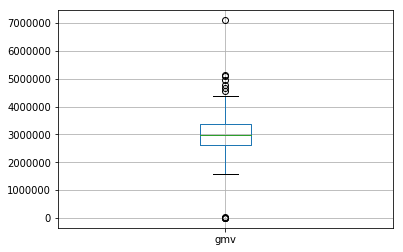

In [750]:
boxplot = gaming_final.boxplot(column=['gmv'])

In [751]:
gaming_final.gmv.describe(percentiles=[.25, .5, .75, .90, .95, .99])

count    5.300000e+01
mean     2.948668e+06
std      1.374389e+06
min      1.007000e+03
25%      2.606716e+06
50%      2.984098e+06
75%      3.380474e+06
90%      4.661544e+06
95%      5.011654e+06
99%      6.076436e+06
max      7.101817e+06
Name: gmv, dtype: float64

In [752]:
### Remove the botton 2 min values.
gaming_final=gaming_final.loc[~(gaming_final.gmv == 1.007000e+03)]
gaming_final=gaming_final.loc[~(gaming_final.gmv==2.602000e+03)]

#### <div id=18></div>Gaming Accessory - Data Analysis

In [753]:
gaming_final.head(4)

GamePad  GamingAccessoryKit  GamingHeadset  GamingMemoryCard  \
0  17.0     4                   4.0            0.0                
1  933.0    82                  174.0          37.0               
2  1045.0   96                  186.0          37.0               
3  1028.0   134                 277.0          34.0               

   MotionController  GamingMouse  TVOutCableAccessory           gmv  \
0  0                 5.0          0                    4.295500e+04   
1  29                947.0        56                   2.715683e+06   
2  17                365.0        78                   2.230720e+06   
3  20                475.0        59                   2.606716e+06   

   deliverybdays  deliverycdays       Week  Prepaid       sla  \
0  0.26087        0.26087       2015-07-05  32.0     4.306763   
1  0.00000        0.00000       2015-07-12  795.0    5.090368   
2  0.00000        0.00000       2015-07-19  538.0    5.610811   
3  0.00000        0.00000       2015-07-26  575.0    5.308417   

   product_procurement_sla  payday  saleday  discount_per  GamingGun  \
0  3.149758                 1       0        36.917259     0           
1  3.031442                 0       0        36.326403     0           
2  2.568749                 1       2        33.011885     0           
3  2.489240                 0       0        34.482207     0           

   JoystickGamingWheel  GamingAdapter  GamingMousePad  GamingKeyboard  \
0  0                    0              1.0             1.0              
1  13                   33             182.0           431.0            
2  13                   30             91.0            180.0            
3  16                   22             111.0           190.0            

   GamingSpeaker  GamingChargingStation  GameControlMount      listprice  \
0  0              0                      0                 14172.000000    
1  0              0                      0                 373349.285714   
2  0              0                      0                 312546.337028   
3  0              0                      0                 363326.500000   

   Holiday  Hot_WK  Snow_WK  Rain  Precipitation        NPS   Stock  \
0  2        1       0        0     0              54.599588  1177.0   
1  2        1       0        1     1              54.599588  1177.0   
2  2        1       0        1     1              54.599588  1177.0   
3  2        1       0        1     1              54.599588  1177.0   

   Total_Investment            TV        Digital   Sponsorship  \
0  3.369701e+06      42527.715283  500270.207418  1.464318e+06   
1  4.717581e+06      59538.801396  700378.290386  2.050046e+06   
2  4.717581e+06      59538.801396  700378.290386  2.050046e+06   
3  4.717581e+06      59538.801396  700378.290386  2.050046e+06   

   Content_Marketing  Online_marketing     Affiliates           SEM  Radio  \
0  184.247264         262137.325017     108082.637144  9.921802e+05  0.0     
1  257.946169         366992.255024     151315.692001  1.389052e+06  0.0     
2  257.946169         366992.255024     151315.692001  1.389052e+06  0.0     
3  257.946169         366992.255024     151315.692001  1.389052e+06  0.0     

   Other  
0  0.0    
1  0.0    
2  0.0    
3  0.0

In [754]:
gaming_final=gaming_final.set_index(gaming_final.Week)

In [755]:
gaming_final.drop('Week',axis=1,inplace=True)

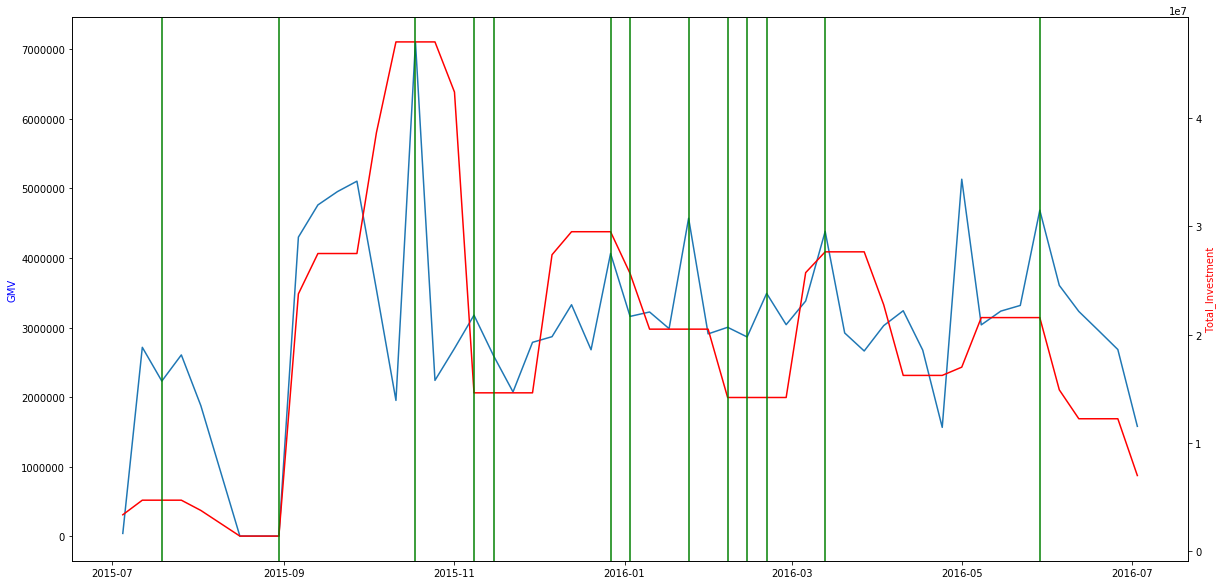

In [756]:
### Plot GMV, Investment, Sale day 
### Red line - Investment
### Blue line  GMV
### Green line - sale day 
sale_week=gaming_final.loc[(gaming_final.saleday > 0)].index
fig_gaming = plt.figure(figsize=(20, 10))
axis1 = fig_gaming.add_subplot(111)
axis1.plot(gaming_final.index, gaming_final.gmv)
axis1.set_ylabel('GMV',color='b')
axis2 = axis1.twinx()
axis2.plot(gaming_final.index,gaming_final.Total_Investment, 'r-')
axis2.set_ylabel('Total_Investment', color='r')

for wk in sale_week:
    plt.axvline(x=wk, color='g')

###Observation : Investment has correlation with jump in sales in most cases.
### Sale day sees a jump in GMV 


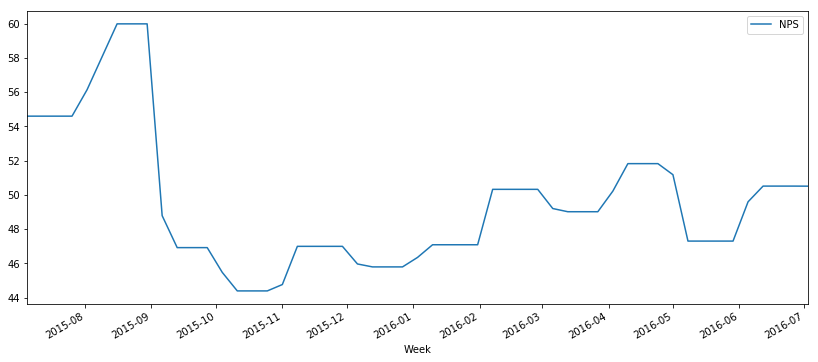

In [757]:
plt.figure(figsize=(14, 6))
gaming_final.NPS.plot(label="NPS")
plt.legend()

#### NPS dips after initial investment period and recovers slowly.

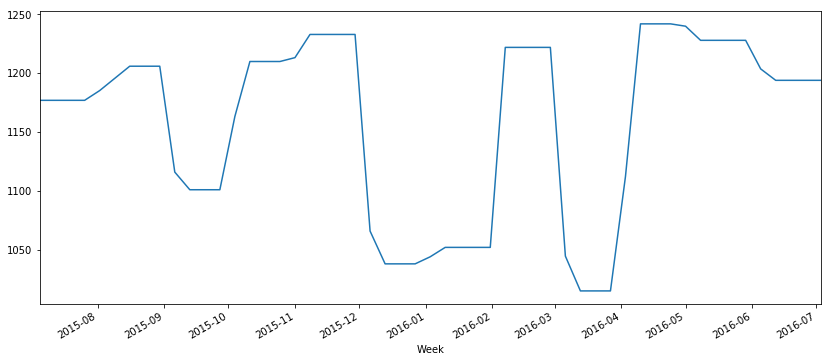

In [758]:
plt.figure(figsize=(14, 6))
gaming_final.Stock.plot()
### Stock Index seems to be cyclic but has not dipped to low from April 2016 onwards.

In [759]:
gaming_withoutGMV=gaming_final.copy()
gaming_withoutGMV=gaming_withoutGMV.drop('gmv',axis=1)

In [760]:
### Correlation Matrix
# plt.figure(figsize = (25, 15))
# sns.heatmap(gaming_withoutGMV.corr(), annot = True, cmap="YlGnBu")
# plt.show()

In [761]:
### Correlation Matrix
# corr = gaming_final.drop('gmv', axis=1).corr() # We already examined SalePrice correlations
# plt.figure(figsize=(12, 10))

# sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
#             cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
#             annot=True, annot_kws={"size": 8}, square=True);

In [762]:
# sns.distplot(gaming_final['gmv'])
# plt.show()

In [763]:
# gaming_final.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [764]:
# for i in range(1, len(gaming_final.columns), 5):
#     sns.pairplot(data=gaming_final,
#                 x_vars=gaming_final.columns[i:i+5],
#                 y_vars=['gmv'])

Most of the features are having linear relationship with `gmv`

In [765]:
df_num_corr = gaming_final.corr()['gmv'][1:] # 1 because the first row is gmv
features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with gmv:\n{}".format(len(features_list), features_list))

There is 14 strongly correlated values with gmv:
gmv                    1.000000
listprice              0.991044
GamingAccessoryKit     0.792080
GamingMousePad         0.786527
TVOutCableAccessory    0.738645
GamingMouse            0.736381
GamingHeadset          0.677048
MotionController       0.658590
GamingKeyboard         0.645227
Prepaid                0.584227
GamingAdapter          0.530603
Online_marketing       0.510017
Total_Investment       0.500403
NPS                   -0.572015
Name: gmv, dtype: float64


In [766]:
# Calculate the VIFs 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = gaming_withoutGMV.copy()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features           VIF
31  Total_Investment         6.411528e+08
34  Sponsorship              1.450886e+08
36  Online_marketing         2.473797e+07
38  SEM                      1.082159e+07
40  Other                    7.282681e+06
37  Affiliates               5.535210e+06
32  TV                       1.971200e+06
33  Digital                  1.319211e+06
35  Content_Marketing        1.701579e+05
39  Radio                    1.137892e+05
30  Stock                    5.121428e+04
29  NPS                      3.843488e+04
8   deliverycdays            9.689750e+03
7   deliverybdays            8.214930e+03
14  discount_per             4.228900e+03
11  product_procurement_sla  2.523170e+03
9   Prepaid                  2.395360e+03
0   GamePad                  2.104750e+03
23  listprice                2.096570e+03
10  sla                      2.036620e+03
2   GamingHeadset            4.684100e+02
24  Holiday                  3.475900e+02
1   GamingAccessoryKit       2.206100e+02
5   GamingMouse              1.741100e+02
6   TVOutCableAccessory      1.725400e+02
18  GamingMousePad           1.519700e+02
16  JoystickGamingWheel      1.372500e+02
17  GamingAdapter            1.320900e+02
25  Hot_WK                   1.175300e+02
27  Rain                     1.117400e+02
28  Precipitation            8.808000e+01
19  GamingKeyboard           7.681000e+01
21  GamingChargingStation    4.477000e+01
3   GamingMemoryCard         4.133000e+01
4   MotionController         2.695000e+01
20  GamingSpeaker            1.440000e+01
15  GamingGun                1.349000e+01
26  Snow_WK                  1.181000e+01
13  saleday                  7.810000e+00
12  payday                   6.060000e+00
22  GameControlMount         4.450000e+00

### <div id=19></div>Model Building - Linear

In [767]:
#creating the train and validation set from orignial data set
gaming_linear=gaming_final.copy()
train = gaming_linear[:int(0.7*(len(gaming_linear)))]
test = gaming_linear[int(0.7*(len(gaming_linear))):]

In [768]:
gaming_linear.columns

Index(['GamePad', 'GamingAccessoryKit', 'GamingHeadset', 'GamingMemoryCard',
       'MotionController', 'GamingMouse', 'TVOutCableAccessory', 'gmv',
       'deliverybdays', 'deliverycdays', 'Prepaid', 'sla',
       'product_procurement_sla', 'payday', 'saleday', 'discount_per',
       'GamingGun', 'JoystickGamingWheel', 'GamingAdapter', 'GamingMousePad',
       'GamingKeyboard', 'GamingSpeaker', 'GamingChargingStation',
       'GameControlMount', 'listprice', 'Holiday', 'Hot_WK', 'Snow_WK', 'Rain',
       'Precipitation', 'NPS', 'Stock', 'Total_Investment', 'TV', 'Digital',
       'Sponsorship', 'Content_Marketing', 'Online_marketing', 'Affiliates',
       'SEM', 'Radio', 'Other'],
      dtype='object')

In [769]:
### Feature Scaling

cols_orig=['GamePad', 'GamingAccessoryKit', 'GamingHeadset', 'GamingMemoryCard',
       'MotionController', 'GamingMouse', 'TVOutCableAccessory', 'deliverybdays', 'deliverycdays', 'Prepaid', 'sla',
       'product_procurement_sla', 'payday', 'saleday', 'discount_per',
       'GamingGun', 'JoystickGamingWheel', 'GamingAdapter', 'GamingMousePad',
       'GamingKeyboard', 'GamingSpeaker', 'GamingChargingStation',
       'GameControlMount', 'listprice', 'Holiday', 'Hot_WK', 'Snow_WK', 'Rain',
       'Precipitation', 'NPS', 'Stock', 'Total_Investment', 'TV', 'Digital',
       'Sponsorship', 'Content_Marketing', 'Online_marketing', 'Affiliates',
       'SEM', 'Radio', 'Other']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train[cols_orig]= scaler.fit_transform(train[cols_orig])
train.head(4)

GamePad  GamingAccessoryKit  GamingHeadset  GamingMemoryCard  \
Week                                                                        
2015-07-05 -2.110234 -2.401670           -1.541536      -1.052413           
2015-07-12 -0.287509 -0.685293           -1.238034      -0.792818           
2015-07-19 -0.064643 -0.377226           -1.216610      -0.792818           
2015-07-26 -0.098470  0.458958           -1.054147      -0.813866           

            MotionController  GamingMouse  TVOutCableAccessory           gmv  \
Week                                                                           
2015-07-05 -1.733015         -1.143151    -1.716436             4.295500e+04   
2015-07-12  1.099530          0.345913    -0.529764             2.715683e+06   
2015-07-19 -0.072558         -0.574082    -0.063572             2.230720e+06   
2015-07-26  0.220464         -0.400200    -0.466193             2.606716e+06   

            deliverybdays  deliverycdays   Prepaid       sla  \
Week                                                           
2015-07-05  0.428282       0.327491      -1.732242 -3.705587   
2015-07-12 -0.197484      -0.194555       0.277032 -1.503971   
2015-07-19 -0.197484      -0.194555      -0.399748 -0.041732   
2015-07-26 -0.197484      -0.194555      -0.302313 -0.891339   

            product_procurement_sla    payday   saleday  discount_per  \
Week                                                                    
2015-07-05  2.115832                 1.089725 -0.602124 -0.540202       
2015-07-12  1.649521                -0.917663 -0.602124 -0.685276       
2015-07-19 -0.174057                 1.089725  0.537029 -1.499094       
2015-07-26 -0.487418                -0.917663 -0.602124 -1.138084       

            GamingGun  JoystickGamingWheel  GamingAdapter  GamingMousePad  \
Week                                                                        
2015-07-05 -0.3371    -1.316250            -2.030758      -1.543701         
2015-07-12 -0.3371    -0.653757            -0.361345       1.125334         
2015-07-19 -0.3371    -0.653757            -0.513110      -0.216556         
2015-07-26 -0.3371    -0.500874            -0.917816       0.078365         

            GamingKeyboard  GamingSpeaker  GamingChargingStation  \
Week                                                               
2015-07-05 -1.338017       -0.770499      -0.712131                
2015-07-12  3.202493       -0.770499      -0.712131                
2015-07-19  0.552102       -0.770499      -0.712131                
2015-07-26  0.657695       -0.770499      -0.712131                

            GameControlMount  listprice   Holiday    Hot_WK   Snow_WK  \
Week                                                                    
2015-07-05 -0.171499         -2.143292  -0.142054  0.246183 -0.454859   
2015-07-12 -0.171499         -0.283379  -0.142054  0.246183 -0.454859   
2015-07-19 -0.171499         -0.598232  -0.142054  0.246183 -0.454859   
2015-07-26 -0.171499         -0.335279  -0.142054  0.246183 -0.454859   

                Rain  Precipitation       NPS     Stock  Total_Investment  \
Week                                                                        
2015-07-05 -1.699673 -1.837117       1.354991  0.430826 -1.391233           
2015-07-12  0.588348  0.544331       1.354991  0.430826 -1.286565           
2015-07-19  0.588348  0.544331       1.354991  0.430826 -1.286565           
2015-07-26  0.588348  0.544331       1.354991  0.430826 -1.286565           

                  TV   Digital  Sponsorship  Content_Marketing  \
Week                                                             
2015-07-05 -1.620224 -0.380430 -0.955369    -0.884017            
2015-07-12 -1.593529 -0.173231 -0.881947    -0.883748            
2015-07-19 -1.593529 -0.173231 -0.881947    -0.883748            
2015-07-26 -1.593529 -0.173231 -0.881947    -0.883748            

            Online_marketing  Affiliates       SEM     Radio     Other  
W

In [770]:
#Feature selection using rFE
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

X=train.copy()
X=X.drop('gmv',axis=1)
Y=train['gmv']
estimator_lr=LinearRegression()
rfe = RFE(estimator_lr, 15)             # running RFE
rfe = rfe.fit(X,Y)

In [771]:
ranking=pd.DataFrame(list(zip(X.columns,rfe.support_,rfe.ranking_)),columns=('Feature','FistList','Rank'))
ranking. head(3)

Feature  FistList  Rank
0  GamePad             True      1   
1  GamingAccessoryKit  False     18  
2  GamingHeadset       False     6

In [772]:
col_rfe = X.columns[rfe.support_]
col_rfe

Index(['GamePad', 'GamingMouse', 'TVOutCableAccessory', 'GamingGun',
       'GamingMousePad', 'GamingKeyboard', 'listprice', 'Stock',
       'Total_Investment', 'TV', 'Digital', 'Content_Marketing', 'Affiliates',
       'SEM', 'Other'],
      dtype='object')

In [773]:
ranking.loc[(ranking.Rank >= 2) & (ranking.Rank<=15)]

Feature  FistList  Rank
2   GamingHeadset            False     6   
3   GamingMemoryCard         False     14  
4   MotionController         False     13  
11  product_procurement_sla  False     3   
14  discount_per             False     4   
17  GamingAdapter            False     5   
21  GamingChargingStation    False     12  
22  GameControlMount         False     7   
26  Snow_WK                  False     11  
28  Precipitation            False     15  
29  NPS                      False     2   
34  Sponsorship              False     10  
36  Online_marketing         False     8   
39  Radio                    False     9

In [774]:
# Calculate the VIFs 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = gaming_withoutGMV.copy()
X=X[col_rfe]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
13  SEM                  343.45
11  Content_Marketing    307.01
8   Total_Investment     243.35
10  Digital              219.12
0   GamePad              205.41
6   listprice            183.81
9   TV                   96.75 
12  Affiliates           88.64 
7   Stock                61.80 
2   TVOutCableAccessory  35.99 
4   GamingMousePad       25.47 
1   GamingMouse          21.28 
5   GamingKeyboard       20.46 
14  Other                9.85  
3   GamingGun            1.91

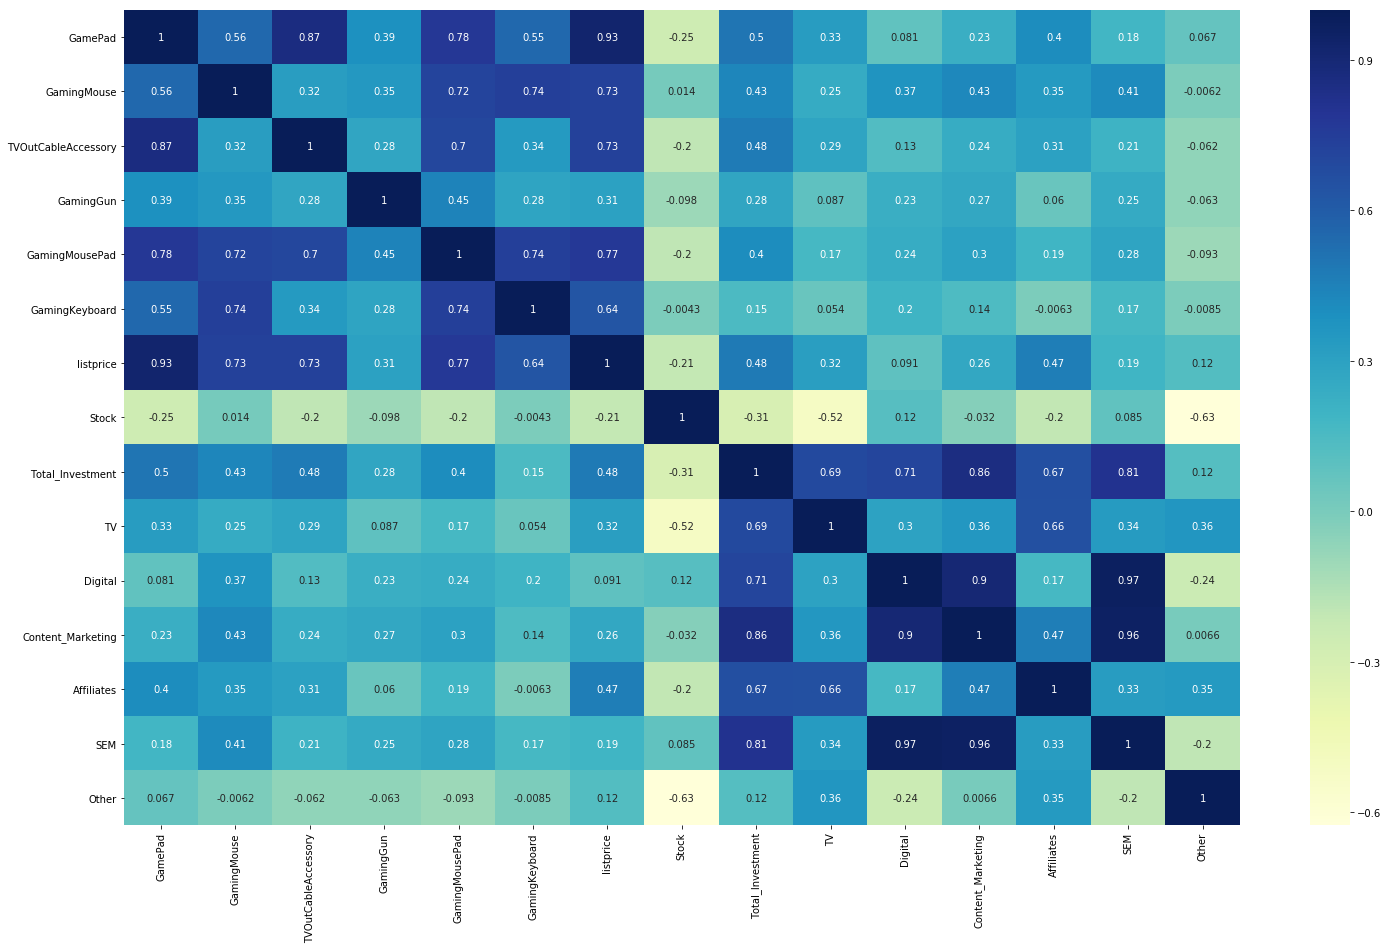

In [775]:
### Correlation Matrix
plt.figure(figsize = (25, 15))
sns.heatmap(X.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [776]:
## remove attributes with high multicolinearity 
col_rfe=['GamePad', 'GamingMouse', 'TVOutCableAccessory', 'GamingGun',
       'GamingMousePad', 'GamingKeyboard', 'listprice', 'NPS', 'Stock', 'TV',
       'Digital', 'Affiliates', 'SEM', 'Other']

vif = pd.DataFrame()
X = gaming_withoutGMV.copy()
X=X[col_rfe]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
8   Stock                952.52
7   NPS                  742.62
0   GamePad              165.27
6   listprice            153.96
12  SEM                  126.27
10  Digital              98.86 
11  Affiliates           59.09 
2   TVOutCableAccessory  37.50 
4   GamingMousePad       30.12 
1   GamingMouse          20.04 
5   GamingKeyboard       18.26 
9   TV                   16.36 
13  Other                3.47  
3   GamingGun            1.69

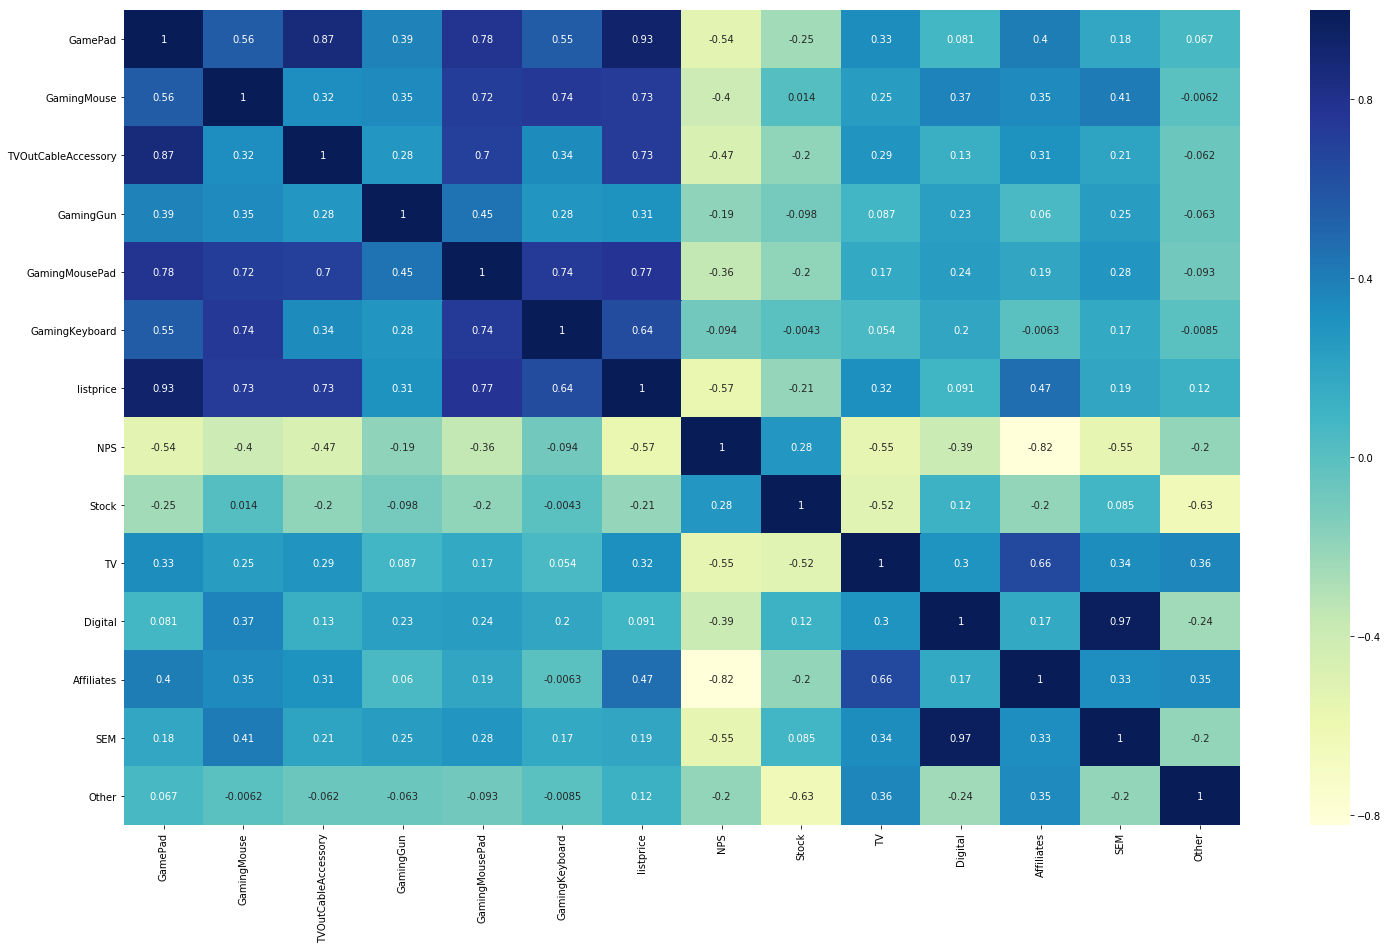

In [777]:
### Correlation Matrix
plt.figure(figsize = (25, 15))
sns.heatmap(X.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [778]:
## remove attributes with high multicolinearity 
col_rfe=['GamePad', 'GamingMouse', 'TVOutCableAccessory', 'GamingGun',
       'GamingMousePad', 'GamingKeyboard', 'listprice', 'NPS', 'Stock', 'TV',
        'Affiliates', 'SEM', 'Other']

vif = pd.DataFrame()
X = gaming_withoutGMV.copy()
X=X[col_rfe]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
8   Stock                952.02
7   NPS                  742.36
6   listprice            153.89
0   GamePad              150.85
10  Affiliates           46.23 
2   TVOutCableAccessory  35.31 
4   GamingMousePad       30.00 
1   GamingMouse          19.89 
5   GamingKeyboard       17.04 
9   TV                   13.46 
11  SEM                  4.96  
12  Other                3.46  
3   GamingGun            1.68

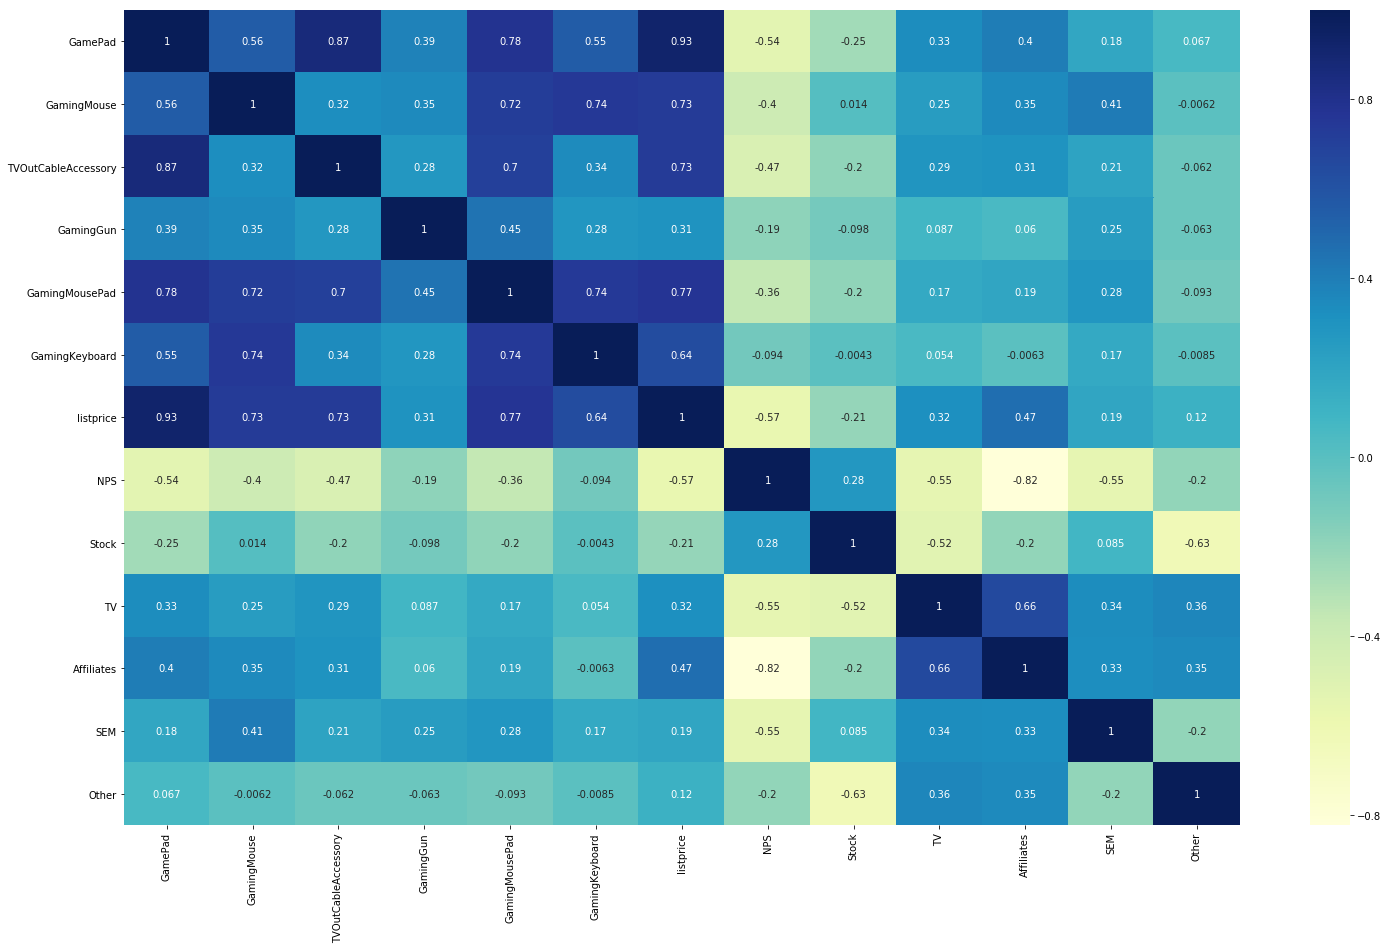

In [779]:
### Correlation Matrix
plt.figure(figsize = (25, 15))
sns.heatmap(X.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [780]:
## remove attributes with high multicolinearity 
col_rfe=['GamingMouse', 'TVOutCableAccessory', 'GamingGun', 'NPS', 'Stock', 'Affiliates', 'SEM', 'Other']
vif = pd.DataFrame()
X = gaming_withoutGMV.copy()
X=X[col_rfe]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
4  Stock                421.30
3  NPS                  340.98
5  Affiliates           15.51 
1  TVOutCableAccessory  5.53  
0  GamingMouse          3.83  
6  SEM                  3.30  
7  Other                2.68  
2  GamingGun            1.33

In [781]:
### Build model using the features identified using VIF & Correlation  - manual & RFE  approach.

import statsmodels.api as sm
X=train[col_rfe]
X = sm.add_constant(X)
y=train['gmv']
gaming_linear_m1 = sm.OLS(y,X).fit()
gaming_linear_m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     62.18
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           5.45e-15
Time:                        22:20:29   Log-Likelihood:                -492.26
No. Observations:                  35   AIC:                             1003.
Df Residuals:                      26   BIC:                             1017.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.049e+06   6.09e+04     50.085      0.000    2.92e+06    3.17e+06
GamingMouse          8.356e+05   7.33e+04     11.407      0.000    6.85e+05    9.86e+05
TVOutCableAccessory  7.094e+05    8.3e+04      8.544      0.000    5.39e+05     8.8e+05
GamingGun            8418.6075   6.73e+04      0.125      0.901    -1.3e+05    1.47e+05
NPS                  2.918e+04   2.15e+05      0.136      0.893   -4.12e+05     4.7e+05
Stock               -2.811e+05   9.07e+04     -3.101      0.005   -4.67e+05   -9.48e+04
Affiliates           2.258e+05   1.71e+05      1.321      0.198   -1.26e+05    5.77e+05
SEM                 -1.622e+05   9.81e+04     -1.653      0.110   -3.64e+05    3.95e+04
Other                2.733e+04   8.82e+04      0.310      0.759   -1.54e+05    2.09e+05
==============================================================================
Omnibus:                        2.147   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.342   Jarque-Bera (JB):                1.742
Skew:                           0.540   Prob(JB):                        0.419
Kurtosis:                       2.836   Cond. No.                         7.87
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [782]:
### Removing features with high VIF/ high p-value
col_rfe=['GamingMouse', 'TVOutCableAccessory', 'GamingGun', 'Stock', 'Affiliates', 'SEM', 'Other']

vif = pd.DataFrame()
X = gaming_withoutGMV.copy()
X=X[col_rfe]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
4  Affiliates           10.00
3  Stock                7.21 
1  TVOutCableAccessory  5.45 
0  GamingMouse          3.79 
5  SEM                  3.07 
6  Other                1.70 
2  GamingGun            1.32

In [783]:
X=train[col_rfe]
X = sm.add_constant(X)
y=train['gmv']
gaming_linear_m2 = sm.OLS(y,X).fit()
gaming_linear_m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     73.74
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           6.11e-16
Time:                        22:20:29   Log-Likelihood:                -492.27
No. Observations:                  35   AIC:                             1001.
Df Residuals:                      27   BIC:                             1013.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.049e+06   5.98e+04     51.020      0.000    2.93e+06    3.17e+06
GamingMouse          8.364e+05   7.17e+04     11.660      0.000    6.89e+05    9.84e+05
TVOutCableAccessory  7.038e+05   7.04e+04      9.994      0.000    5.59e+05    8.48e+05
GamingGun            8256.8749    6.6e+04      0.125      0.901   -1.27e+05    1.44e+05
Stock               -2.757e+05   7.99e+04     -3.452      0.002    -4.4e+05   -1.12e+05
Affiliates           2.051e+05   7.58e+04      2.705      0.012    4.95e+04    3.61e+05
SEM                 -1.709e+05   7.27e+04     -2.351      0.026    -3.2e+05   -2.17e+04
Other                2.943e+04   8.52e+04      0.345      0.733   -1.45e+05    2.04e+05
==============================================================================
Omnibus:                        2.065   Durbin-Watson:                   2.141
Prob(Omnibus):                  0.356   Jarque-Bera (JB):                1.710
Skew:                           0.532   Prob(JB):                        0.425
Kurtosis:                       2.801   Cond. No.                         2.76
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [784]:
### Removing features with high VIF/ high p-value
col_rfe=['GamingMouse', 'TVOutCableAccessory', 'Stock', 'Affiliates', 'SEM', 'Other']

vif = pd.DataFrame()
X = gaming_withoutGMV.copy()
X=X[col_rfe]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
3  Affiliates           9.82
2  Stock                7.09
1  TVOutCableAccessory  5.20
0  GamingMouse          3.56
4  SEM                  3.01
5  Other                1.70

In [785]:
X=train[col_rfe]
X = sm.add_constant(X)
y=train['gmv']
gaming_linear_m3 = sm.OLS(y,X).fit()
gaming_linear_m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     89.16
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           6.19e-17
Time:                        22:20:29   Log-Likelihood:                -492.28
No. Observations:                  35   AIC:                             998.6
Df Residuals:                      28   BIC:                             1009.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.049e+06   5.87e+04     51.942      0.000    2.93e+06    3.17e+06
GamingMouse          8.388e+05   6.79e+04     12.349      0.000       7e+05    9.78e+05
TVOutCableAccessory  7.053e+05   6.81e+04     10.362      0.000    5.66e+05    8.45e+05
Stock               -2.767e+05    7.8e+04     -3.546      0.001   -4.37e+05   -1.17e+05
Affiliates           2.038e+05   7.38e+04      2.762      0.010    5.26e+04    3.55e+05
SEM                 -1.699e+05   7.09e+04     -2.394      0.024   -3.15e+05   -2.45e+04
Other                2.909e+04   8.37e+04      0.348      0.731   -1.42e+05    2.01e+05
==============================================================================
Omnibus:                        1.968   Durbin-Watson:                   2.164
Prob(Omnibus):                  0.374   Jarque-Bera (JB):                1.646
Skew:                           0.520   Prob(JB):                        0.439
Kurtosis:                       2.782   Cond. No.                         2.65
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [786]:
## Adding next set of key features 
### Removing features with high VIF/ high p-value
col_rfe=['GamingHeadset','GamingMemoryCard','MotionController','product_procurement_sla',
         'discount_per','GamingAdapter','GamingChargingStation','GameControlMount',
         'Snow_WK','Precipitation','Total_Investment','Sponsorship','Online_marketing',
         'Radio','GamingMouse', 'TVOutCableAccessory', 'Stock', 'Affiliates', 'SEM', 'Other']

vif = pd.DataFrame()
X = gaming_withoutGMV.copy()
X=X[col_rfe]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features        VIF
10  Total_Investment         124267.36
11  Sponsorship              29565.54 
17  Affiliates               9027.52  
12  Online_marketing         6945.00  
18  SEM                      5204.84  
19  Other                    4155.10  
16  Stock                    844.05   
13  Radio                    528.64   
4   discount_per             385.89   
3   product_procurement_sla  160.70   
0   GamingHeadset            25.02    
5   GamingAdapter            21.62    
15  TVOutCableAccessory      19.30    
2   MotionController         10.70    
1   GamingMemoryCard         9.90     
14  GamingMouse              7.94     
9   Precipitation            7.54     
6   GamingChargingStation    6.62     
8   Snow_WK                  3.19     
7   GameControlMount         1.28

In [787]:
X=train[col_rfe]
X = sm.add_constant(X)
y=train['gmv']
gaming_linear_m4 = sm.OLS(y,X).fit()
gaming_linear_m4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     63.95
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.83e-10
Time:                        22:20:30   Log-Likelihood:                -465.60
No. Observations:                  35   AIC:                             973.2
Df Residuals:                      14   BIC:                             1006.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    3.049e+06   3.87e+04     78.718      0.000    2.97e+06    3.13e+06
GamingHeadset            4.168e+05   1.69e+05      2.470      0.027    5.49e+04    7.79e+05
GamingMemoryCard         2.908e+04   1.04e+05      0.278      0.785   -1.95e+05    2.53e+05
MotionController         1.886e+05   8.38e+04      2.250      0.041    8811.681    3.68e+05
product_procurement_sla -3.349e+04   7.38e+04     -0.454      0.657   -1.92e+05    1.25e+05
discount_per            -1.209e+04   1.49e+05     -0.081      0.936   -3.31e+05    3.07e+05
GamingAdapter           -7005.4473   1.04e+05     -0.067      0.947   -2.31e+05    2.17e+05
GamingChargingStation    1.453e+05   1.03e+05      1.406      0.182   -7.64e+04    3.67e+05
GameControlMount         2.347e+04   5.23e+04      0.449      0.660   -8.87e+04    1.36e+05
Snow_WK                 -1.634e+05    8.3e+04     -1.968      0.069   -3.41e+05    1.46e+04
Precipitation             4.83e+04   6.08e+04      0.794      0.440   -8.21e+04    1.79e+05
Total_Investment        -8.479e+07   6.62e+07     -1.281      0.221   -2.27e+08    5.72e+07
Sponsorship              5.416e+07   4.18e+07      1.294      0.217   -3.56e+07    1.44e+08
Online_marketing         8.346e+06   8.63e+06      0.967      0.350   -1.02e+07    2.69e+07
Radio                   -9.019e+06   7.81e+06     -1.155      0.267   -2.58e+07    7.73e+06
GamingMouse              6.043e+05   9.75e+04      6.200      0.000    3.95e+05    8.13e+05
TVOutCableAccessory      2.753e+05   1.84e+05      1.496      0.157   -1.19e+05     6.7e+05
Stock                    1.552e+04   2.01e+05      0.077      0.940   -4.16e+05    4.47e+05
Affiliates               1.302e+07   8.96e+06      1.452      0.168   -6.21e+06    3.22e+07
SEM                      2.477e+07   1.95e+07      1.273      0.224    -1.7e+07    6.65e+07
Other                    2.833e+07   2.27e+07      1.250      0.232   -2.03e+07    7.69e+07
==============================================================================
Omnibus:                        1.535   Durbin-Watson:                   2.125
Prob(Omnibus):                  0.464   Jarque-Bera (JB):                0.812
Skew:                           0.359   Prob(JB):                        0.666
Kurtosis:                       3.201   Cond. No.                     5.20e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [788]:
### Removing features with high VIF/ high p-value
col_rfe=['GamingHeadset','GamingMemoryCard','MotionController','product_procurement_sla',
         'GamingAdapter','GamingChargingStation','GameControlMount',
         'Snow_WK','Precipitation','Total_Investment','Sponsorship','Online_marketing',
         'Radio','GamingMouse', 'TVOutCableAccessory', 'Stock', 'Affiliates', 'SEM', 'Other']

vif = pd.DataFrame()
X = gaming_withoutGMV.copy()
X=X[col_rfe]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features        VIF
9   Total_Investment         118953.56
10  Sponsorship              28301.80 
16  Affiliates               6583.50  
11  Online_marketing         6246.96  
17  SEM                      4894.91  
18  Other                    4105.01  
12  Radio                    525.63   
15  Stock                    200.94   
3   product_procurement_sla  151.35   
4   GamingAdapter            18.85    
0   GamingHeadset            17.55    
14  TVOutCableAccessory      17.46    
2   MotionController         10.48    
1   GamingMemoryCard         9.19     
13  GamingMouse              7.85     
8   Precipitation            7.54     
5   GamingChargingStation    6.61     
7   Snow_WK                  2.98     
6   GameControlMount         1.28

In [789]:
X=train[col_rfe]
X = sm.add_constant(X)
y=train['gmv']
gaming_linear_m5 = sm.OLS(y,X).fit()
gaming_linear_m5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     72.09
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.10e-11
Time:                        22:20:30   Log-Likelihood:                -465.61
No. Observations:                  35   AIC:                             971.2
Df Residuals:                      15   BIC:                             1002.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    3.049e+06   3.74e+04     81.462      0.000    2.97e+06    3.13e+06
GamingHeadset            4.089e+05   1.33e+05      3.068      0.008    1.25e+05    6.93e+05
GamingMemoryCard         2.814e+04      1e+05      0.281      0.783   -1.86e+05    2.42e+05
MotionController         1.873e+05   7.97e+04      2.351      0.033    1.75e+04    3.57e+05
product_procurement_sla  -2.97e+04   5.51e+04     -0.539      0.598   -1.47e+05    8.78e+04
GamingAdapter           -5400.5812   9.91e+04     -0.054      0.957   -2.17e+05    2.06e+05
GamingChargingStation    1.454e+05   9.99e+04      1.455      0.166   -6.76e+04    3.58e+05
GameControlMount         2.412e+04   4.99e+04      0.483      0.636   -8.23e+04    1.31e+05
Snow_WK                 -1.635e+05   8.02e+04     -2.039      0.059   -3.34e+05    7385.691
Precipitation            4.916e+04   5.79e+04      0.849      0.409   -7.42e+04    1.73e+05
Total_Investment        -8.866e+07   4.43e+07     -2.002      0.064   -1.83e+08    5.74e+06
Sponsorship               5.66e+07   2.81e+07      2.016      0.062   -3.25e+06    1.16e+08
Online_marketing         8.765e+06   6.69e+06      1.310      0.210   -5.49e+06     2.3e+07
Radio                   -9.466e+06   5.35e+06     -1.771      0.097   -2.09e+07    1.93e+06
GamingMouse              6.016e+05   8.89e+04      6.771      0.000    4.12e+05    7.91e+05
TVOutCableAccessory      2.751e+05   1.78e+05      1.548      0.143   -1.04e+05    6.54e+05
Stock                    8412.8307   1.75e+05      0.048      0.962   -3.65e+05    3.82e+05
Affiliates               1.359e+07   5.38e+06      2.524      0.023    2.11e+06    2.51e+07
SEM                      2.592e+07   1.29e+07      2.015      0.062   -1.49e+06    5.33e+07
Other                    2.964e+07   1.53e+07      1.938      0.072   -2.97e+06    6.23e+07
==============================================================================
Omnibus:                        1.504   Durbin-Watson:                   2.127
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                0.808
Skew:                           0.361   Prob(JB):                        0.668
Kurtosis:                       3.180   Cond. No.                     3.60e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [790]:
### Removing features with high VIF/ high p-value
col_rfe=['GamingHeadset','GamingMemoryCard','MotionController','product_procurement_sla',
         'GamingAdapter','GamingChargingStation','GameControlMount',
         'Snow_WK','Precipitation','Sponsorship','Online_marketing',
         'Radio','GamingMouse', 'TVOutCableAccessory', 'Stock', 'Affiliates', 'SEM', 'Other']

vif = pd.DataFrame()
X = gaming_withoutGMV.copy()
X=X[col_rfe]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features      VIF
10  Online_marketing         3538.09
15  Affiliates               3151.20
14  Stock                    200.84 
3   product_procurement_sla  149.29 
11  Radio                    126.39 
17  Other                    109.20 
9   Sponsorship              43.72  
4   GamingAdapter            17.62  
0   GamingHeadset            17.05  
13  TVOutCableAccessory      14.86  
16  SEM                      13.67  
2   MotionController         10.21  
1   GamingMemoryCard         8.59   
12  GamingMouse              7.77   
8   Precipitation            7.17   
5   GamingChargingStation    6.58   
7   Snow_WK                  2.98   
6   GameControlMount         1.28

In [791]:
X=train[col_rfe]
X = sm.add_constant(X)
y=train['gmv']
gaming_linear_m6 = sm.OLS(y,X).fit()
gaming_linear_m6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     63.87
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.47e-11
Time:                        22:20:30   Log-Likelihood:                -469.75
No. Observations:                  35   AIC:                             977.5
Df Residuals:                      16   BIC:                             1007.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    3.049e+06   4.08e+04     74.740      0.000    2.96e+06    3.14e+06
GamingHeadset             3.56e+05   1.42e+05      2.500      0.024    5.42e+04    6.58e+05
GamingMemoryCard         4.838e+04   1.09e+05      0.445      0.662   -1.82e+05    2.79e+05
MotionController         2.478e+05   8.04e+04      3.084      0.007    7.75e+04    4.18e+05
product_procurement_sla -1.086e+04   5.92e+04     -0.183      0.857   -1.36e+05    1.15e+05
GamingAdapter            6.752e+04   1.01e+05      0.672      0.511   -1.46e+05    2.81e+05
GamingChargingStation    1.449e+05   1.09e+05      1.330      0.202    -8.6e+04    3.76e+05
GameControlMount         5.037e+04   5.25e+04      0.959      0.352    -6.1e+04    1.62e+05
Snow_WK                 -8.677e+04   7.68e+04     -1.130      0.275   -2.49e+05     7.6e+04
Precipitation            3.192e+04   6.24e+04      0.512      0.616      -1e+05    1.64e+05
Sponsorship              3.924e+05   4.22e+05      0.931      0.366   -5.01e+05    1.29e+06
Online_marketing          -3.9e+06   2.37e+06     -1.647      0.119   -8.92e+06    1.12e+06
Radio                    1.119e+06   8.61e+05      1.300      0.212   -7.06e+05    2.94e+06
GamingMouse              5.575e+05   9.38e+04      5.943      0.000    3.59e+05    7.56e+05
TVOutCableAccessory      5.527e+05   1.21e+05      4.555      0.000    2.95e+05     8.1e+05
Stock                   -1.176e+05   1.78e+05     -0.660      0.518   -4.95e+05     2.6e+05
Affiliates               3.553e+06   2.14e+06      1.660      0.116   -9.84e+05    8.09e+06
SEM                      1.784e+05   2.45e+05      0.728      0.477   -3.41e+05    6.98e+05
Other                   -9.471e+05   8.02e+05     -1.181      0.255   -2.65e+06    7.53e+05
==============================================================================
Omnibus:                        7.324   Durbin-Watson:                   2.191
Prob(Omnibus):                  0.026   Jarque-Bera (JB):                6.166
Skew:                           1.002   Prob(JB):                       0.0458
Kurtosis:                       3.460   Cond. No.                         184.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [792]:
### Removing features with high VIF/ high p-value
col_rfe=['GamingHeadset','GamingMemoryCard','MotionController',
         'GamingAdapter','GamingChargingStation','GameControlMount',
         'Snow_WK','Precipitation','Sponsorship','Online_marketing',
         'Radio','GamingMouse', 'TVOutCableAccessory', 'Stock', 'Affiliates', 'SEM', 'Other']

vif = pd.DataFrame()
X = gaming_withoutGMV.copy()
X=X[col_rfe]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features      VIF
9   Online_marketing       3227.78
14  Affiliates             2832.91
10  Radio                  107.54 
16  Other                  86.15  
8   Sponsorship            43.35  
13  Stock                  17.60  
0   GamingHeadset          16.46  
3   GamingAdapter          15.95  
12  TVOutCableAccessory    14.28  
15  SEM                    13.25  
2   MotionController       10.21  
1   GamingMemoryCard       8.10   
7   Precipitation          6.98   
4   GamingChargingStation  6.57   
11  GamingMouse            6.54   
6   Snow_WK                2.98   
5   GameControlMount       1.26

In [793]:
X=train[col_rfe]
X = sm.add_constant(X)
y=train['gmv']
gaming_linear_m7 = sm.OLS(y,X).fit()
gaming_linear_m7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     71.70
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.71e-12
Time:                        22:20:30   Log-Likelihood:                -469.79
No. Observations:                  35   AIC:                             975.6
Df Residuals:                      17   BIC:                             1004.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3.049e+06   3.96e+04     76.960      0.000    2.97e+06    3.13e+06
GamingHeadset          3.615e+05   1.35e+05      2.672      0.016    7.61e+04    6.47e+05
GamingMemoryCard       4.902e+04   1.06e+05      0.464      0.648   -1.74e+05    2.72e+05
MotionController       2.451e+05   7.67e+04      3.196      0.005    8.33e+04    4.07e+05
GamingAdapter          6.949e+04    9.7e+04      0.716      0.484   -1.35e+05    2.74e+05
GamingChargingStation  1.496e+05   1.03e+05      1.455      0.164   -6.73e+04    3.66e+05
GameControlMount       5.082e+04    5.1e+04      0.997      0.333   -5.67e+04    1.58e+05
Snow_WK               -8.997e+04   7.26e+04     -1.239      0.232   -2.43e+05    6.32e+04
Precipitation          3.665e+04   5.51e+04      0.665      0.515   -7.97e+04    1.53e+05
Sponsorship            4.015e+05   4.07e+05      0.987      0.337   -4.56e+05    1.26e+06
Online_marketing      -3.949e+06   2.29e+06     -1.728      0.102   -8.77e+06    8.72e+05
Radio                  1.128e+06   8.34e+05      1.351      0.194   -6.33e+05    2.89e+06
GamingMouse            5.488e+05   7.85e+04      6.991      0.000    3.83e+05    7.14e+05
TVOutCableAccessory    5.526e+05   1.18e+05      4.690      0.000    3.04e+05    8.01e+05
Stock                 -1.132e+05   1.71e+05     -0.660      0.518   -4.75e+05    2.48e+05
Affiliates             3.599e+06   2.06e+06      1.744      0.099   -7.56e+05    7.95e+06
SEM                    1.795e+05   2.38e+05      0.755      0.461   -3.22e+05    6.81e+05
Other                 -9.533e+05   7.78e+05     -1.225      0.237    -2.6e+06    6.89e+05
==============================================================================
Omnibus:                        7.635   Durbin-Watson:                   2.179
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                6.459
Skew:                           1.020   Prob(JB):                       0.0396
Kurtosis:                       3.513   Cond. No.                         183.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [794]:
### Removing features with high VIF/ high p-value
col_rfe=['GamingHeadset','GamingMemoryCard','MotionController',
         'GamingAdapter','GamingChargingStation','GameControlMount',
         'Snow_WK','Precipitation','Sponsorship','Radio','GamingMouse', 'TVOutCableAccessory', 'Stock', 'Affiliates', 'SEM', 'Other']

vif = pd.DataFrame()
X = gaming_withoutGMV.copy()
X=X[col_rfe]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
13  Affiliates             21.74
8   Sponsorship            21.27
9   Radio                  18.00
3   GamingAdapter          15.82
15  Other                  15.72
0   GamingHeadset          14.31
11  TVOutCableAccessory    13.36
12  Stock                  11.99
14  SEM                    11.20
2   MotionController       9.92 
1   GamingMemoryCard       8.01 
10  GamingMouse            6.35 
4   GamingChargingStation  6.24 
7   Precipitation          6.17 
6   Snow_WK                2.96 
5   GameControlMount       1.26

In [795]:
X=train[col_rfe]
X = sm.add_constant(X)
y=train['gmv']
gaming_linear_m8 = sm.OLS(y,X).fit()
gaming_linear_m8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     68.44
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           7.81e-13
Time:                        22:20:30   Log-Likelihood:                -472.62
No. Observations:                  35   AIC:                             979.2
Df Residuals:                      18   BIC:                             1006.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3.049e+06   4.17e+04     73.036      0.000    2.96e+06    3.14e+06
GamingHeadset          2.455e+05   1.24e+05      1.983      0.063   -1.45e+04    5.05e+05
GamingMemoryCard      -4172.5193   1.06e+05     -0.039      0.969   -2.28e+05    2.19e+05
MotionController       2.847e+05   7.71e+04      3.692      0.002    1.23e+05    4.47e+05
GamingAdapter          2.893e+04   9.92e+04      0.292      0.774    -1.8e+05    2.37e+05
GamingChargingStation   9.49e+04   1.03e+05      0.921      0.369   -1.22e+05    3.11e+05
GameControlMount       3.214e+04   5.25e+04      0.612      0.548   -7.81e+04    1.42e+05
Snow_WK               -7.173e+04   7.57e+04     -0.948      0.356   -2.31e+05    8.73e+04
Precipitation          3.784e+04   5.81e+04      0.651      0.523   -8.42e+04     1.6e+05
Sponsorship           -7.775e+04   3.13e+05     -0.248      0.807   -7.36e+05     5.8e+05
Radio                   -6.7e+04   4.92e+05     -0.136      0.893    -1.1e+06    9.67e+05
GamingMouse            6.076e+05   7.45e+04      8.154      0.000    4.51e+05    7.64e+05
TVOutCableAccessory    6.329e+05   1.14e+05      5.547      0.000    3.93e+05    8.73e+05
Stock                 -1.167e+05   1.81e+05     -0.646      0.526   -4.96e+05    2.63e+05
Affiliates              3.73e+04   1.18e+05      0.316      0.755    -2.1e+05    2.85e+05
SEM                    8788.0710   2.28e+05      0.039      0.970    -4.7e+05    4.88e+05
Other                  1.468e+05   4.72e+05      0.311      0.759   -8.45e+05    1.14e+06
==============================================================================
Omnibus:                       11.707   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               11.109
Skew:                           1.272   Prob(JB):                      0.00387
Kurtosis:                       4.072   Cond. No.                         34.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [796]:
### Removing features with high VIF/ high p-value
col_rfe=['GamingHeadset','MotionController',
         'GamingAdapter','GamingChargingStation','GameControlMount',
         'Snow_WK','Precipitation','Sponsorship','Radio','GamingMouse', 'TVOutCableAccessory', 'Stock', 'Affiliates', 'SEM', 'Other']


vif = pd.DataFrame()
X = gaming_withoutGMV.copy()
X=X[col_rfe]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
7   Sponsorship            21.23
12  Affiliates             20.35
8   Radio                  16.66
14  Other                  14.88
0   GamingHeadset          14.15
10  TVOutCableAccessory    13.03
2   GamingAdapter          12.92
11  Stock                  11.95
13  SEM                    11.14
1   MotionController       9.82 
9   GamingMouse            6.27 
6   Precipitation          5.94 
3   GamingChargingStation  3.43 
5   Snow_WK                2.70 
4   GameControlMount       1.26

In [797]:
X=train[col_rfe]
X = sm.add_constant(X)
y=train['gmv']
gaming_linear_m9 = sm.OLS(y,X).fit()
gaming_linear_m9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     77.05
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           8.63e-14
Time:                        22:20:31   Log-Likelihood:                -472.62
No. Observations:                  35   AIC:                             977.2
Df Residuals:                      19   BIC:                             1002.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3.049e+06   4.06e+04     75.034      0.000    2.96e+06    3.13e+06
GamingHeadset          2.442e+05   1.17e+05      2.095      0.050     199.802    4.88e+05
MotionController       2.842e+05   7.41e+04      3.833      0.001    1.29e+05    4.39e+05
GamingAdapter          2.995e+04   9.32e+04      0.321      0.752   -1.65e+05    2.25e+05
GamingChargingStation  9.328e+04   9.18e+04      1.016      0.323   -9.89e+04    2.85e+05
GameControlMount       3.244e+04   5.05e+04      0.642      0.528   -7.33e+04    1.38e+05
Snow_WK               -7.118e+04   7.24e+04     -0.983      0.338   -2.23e+05    8.04e+04
Precipitation          3.745e+04   5.57e+04      0.672      0.509   -7.91e+04    1.54e+05
Sponsorship           -7.658e+04   3.04e+05     -0.252      0.804   -7.12e+05    5.59e+05
Radio                 -7.667e+04   4.15e+05     -0.185      0.855   -9.45e+05    7.91e+05
GamingMouse            6.076e+05   7.25e+04      8.379      0.000    4.56e+05    7.59e+05
TVOutCableAccessory    6.329e+05   1.11e+05      5.699      0.000       4e+05    8.65e+05
Stock                 -1.144e+05   1.67e+05     -0.687      0.501   -4.63e+05    2.34e+05
Affiliates             3.598e+04    1.1e+05      0.327      0.747   -1.94e+05    2.66e+05
SEM                    8153.0087   2.21e+05      0.037      0.971   -4.55e+05    4.72e+05
Other                  1.573e+05   3.78e+05      0.416      0.682   -6.34e+05    9.49e+05
==============================================================================
Omnibus:                       11.790   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               11.217
Skew:                           1.276   Prob(JB):                      0.00367
Kurtosis:                       4.084   Cond. No.                         29.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [798]:
### Removing features with high VIF/ high p-value
col_rfe=['GamingHeadset','MotionController',
         'GamingAdapter','GamingChargingStation','GameControlMount',
         'Snow_WK','Precipitation','Radio','GamingMouse', 'TVOutCableAccessory', 'Stock', 'Affiliates', 'SEM', 'Other']




vif = pd.DataFrame()
X = gaming_withoutGMV.copy()
X=X[col_rfe]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
11  Affiliates             19.65
0   GamingHeadset          14.12
7   Radio                  13.65
13  Other                  13.49
2   GamingAdapter          12.41
10  Stock                  10.42
1   MotionController       9.47 
9   TVOutCableAccessory    8.48 
8   GamingMouse            6.03 
6   Precipitation          5.92 
12  SEM                    3.76 
3   GamingChargingStation  3.42 
5   Snow_WK                2.62 
4   GameControlMount       1.17

In [799]:
X=train[col_rfe]
X = sm.add_constant(X)
y=train['gmv']
gaming_linear_m10 = sm.OLS(y,X).fit()
gaming_linear_m10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     86.61
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           9.27e-15
Time:                        22:20:31   Log-Likelihood:                -472.68
No. Observations:                  35   AIC:                             975.4
Df Residuals:                      20   BIC:                             998.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3.049e+06   3.97e+04     76.854      0.000    2.97e+06    3.13e+06
GamingHeadset          2.501e+05   1.12e+05      2.242      0.036    1.74e+04    4.83e+05
MotionController       2.822e+05    7.2e+04      3.922      0.001    1.32e+05    4.32e+05
GamingAdapter          3.652e+04   8.74e+04      0.418      0.681   -1.46e+05    2.19e+05
GamingChargingStation  1.021e+05    8.3e+04      1.230      0.233    -7.1e+04    2.75e+05
GameControlMount       3.436e+04   4.88e+04      0.705      0.489   -6.73e+04    1.36e+05
Snow_WK                -7.51e+04    6.9e+04     -1.088      0.290   -2.19e+05    6.89e+04
Precipitation          4.114e+04   5.25e+04      0.784      0.442   -6.83e+04    1.51e+05
Radio                 -1.934e+04   3.39e+05     -0.057      0.955   -7.26e+05    6.87e+05
GamingMouse             6.06e+05   7.05e+04      8.591      0.000    4.59e+05    7.53e+05
TVOutCableAccessory    6.113e+05    6.9e+04      8.854      0.000    4.67e+05    7.55e+05
Stock                 -7.776e+04   7.97e+04     -0.976      0.341   -2.44e+05    8.85e+04
Affiliates              1.99e+04   8.76e+04      0.227      0.822   -1.63e+05    2.03e+05
SEM                   -4.533e+04   6.24e+04     -0.726      0.476   -1.76e+05    8.49e+04
Other                  1.321e+05   3.56e+05      0.371      0.714   -6.11e+05    8.75e+05
==============================================================================
Omnibus:                       11.999   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               11.490
Skew:                           1.287   Prob(JB):                      0.00320
Kurtosis:                       4.121   Cond. No.                         24.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [800]:
### Removing features with high VIF/ high p-value
col_rfe=['GamingHeadset','MotionController',
         'GamingAdapter','GamingChargingStation','GameControlMount',
         'Snow_WK','Precipitation','GamingMouse', 'TVOutCableAccessory', 'Stock', 'Affiliates', 'SEM', 'Other']


vif = pd.DataFrame()
X = gaming_withoutGMV.copy()
X=X[col_rfe]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
10  Affiliates             18.79
0   GamingHeadset          14.12
2   GamingAdapter          12.29
9   Stock                  10.37
1   MotionController       8.87 
8   TVOutCableAccessory    7.92 
7   GamingMouse            6.03 
6   Precipitation          5.78 
11  SEM                    3.76 
3   GamingChargingStation  3.35 
5   Snow_WK                2.61 
12  Other                  1.95 
4   GameControlMount       1.17

In [801]:
X=train[col_rfe]
X = sm.add_constant(X)
y=train['gmv']
gaming_linear_m11 = sm.OLS(y,X).fit()
gaming_linear_m11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     97.92
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           9.09e-16
Time:                        22:20:31   Log-Likelihood:                -472.69
No. Observations:                  35   AIC:                             973.4
Df Residuals:                      21   BIC:                             995.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3.049e+06   3.87e+04     78.746      0.000    2.97e+06    3.13e+06
GamingHeadset          2.532e+05   9.47e+04      2.673      0.014    5.62e+04     4.5e+05
MotionController       2.819e+05   7.01e+04      4.021      0.001    1.36e+05    4.28e+05
GamingAdapter          3.695e+04    8.5e+04      0.435      0.668    -1.4e+05    2.14e+05
GamingChargingStation  1.011e+05   7.93e+04      1.275      0.216   -6.37e+04    2.66e+05
GameControlMount       3.422e+04   4.75e+04      0.720      0.479   -6.46e+04    1.33e+05
Snow_WK               -7.507e+04   6.74e+04     -1.114      0.278   -2.15e+05    6.51e+04
Precipitation          4.135e+04   5.11e+04      0.809      0.427   -6.49e+04    1.48e+05
GamingMouse            6.047e+05   6.51e+04      9.288      0.000    4.69e+05     7.4e+05
TVOutCableAccessory    6.105e+05   6.61e+04      9.235      0.000    4.73e+05    7.48e+05
Stock                 -7.955e+04   7.15e+04     -1.113      0.278   -2.28e+05    6.91e+04
Affiliates             1.846e+04   8.18e+04      0.226      0.824   -1.52e+05    1.89e+05
SEM                   -4.486e+04   6.04e+04     -0.743      0.466    -1.7e+05    8.07e+04
Other                  1.121e+05    6.3e+04      1.781      0.089   -1.88e+04    2.43e+05
==============================================================================
Omnibus:                       11.980   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               11.462
Skew:                           1.284   Prob(JB):                      0.00324
Kurtosis:                       4.124   Cond. No.                         6.81
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [802]:
### Removing features with high VIF/ high p-value
col_rfe=['GamingHeadset','MotionController','GamingChargingStation','GameControlMount',
         'Snow_WK','Precipitation','GamingMouse', 'TVOutCableAccessory', 'Stock', 'Affiliates', 'SEM', 'Other']


vif = pd.DataFrame()
X = gaming_withoutGMV.copy()
X=X[col_rfe]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
9   Affiliates             14.96
0   GamingHeadset          13.35
8   Stock                  9.93 
1   MotionController       7.36 
7   TVOutCableAccessory    7.14 
6   GamingMouse            6.03 
5   Precipitation          5.76 
10  SEM                    3.76 
2   GamingChargingStation  2.73 
4   Snow_WK                2.54 
11  Other                  1.95 
3   GameControlMount       1.15

In [803]:
X=train[col_rfe]
X = sm.add_constant(X)
y=train['gmv']
gaming_linear_m12 = sm.OLS(y,X).fit()
gaming_linear_m12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     110.1
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           9.20e-17
Time:                        22:20:31   Log-Likelihood:                -472.84
No. Observations:                  35   AIC:                             971.7
Df Residuals:                      22   BIC:                             991.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3.049e+06    3.8e+04     80.239      0.000    2.97e+06    3.13e+06
GamingHeadset          2.719e+05   8.29e+04      3.280      0.003       1e+05    4.44e+05
MotionController       2.875e+05   6.76e+04      4.250      0.000    1.47e+05    4.28e+05
GamingChargingStation  9.098e+04   7.44e+04      1.224      0.234   -6.32e+04    2.45e+05
GameControlMount       3.017e+04   4.57e+04      0.660      0.516   -6.47e+04    1.25e+05
Snow_WK               -7.996e+04   6.52e+04     -1.226      0.233   -2.15e+05    5.52e+04
Precipitation          4.522e+04   4.94e+04      0.916      0.370   -5.72e+04    1.48e+05
GamingMouse            6.075e+05   6.36e+04      9.554      0.000    4.76e+05    7.39e+05
TVOutCableAccessory    6.048e+05   6.36e+04      9.515      0.000    4.73e+05    7.37e+05
Stock                 -8.272e+04   6.98e+04     -1.186      0.248   -2.27e+05     6.2e+04
Affiliates             3.153e+04   7.46e+04      0.422      0.677   -1.23e+05    1.86e+05
SEM                   -3.446e+04   5.44e+04     -0.633      0.533   -1.47e+05    7.84e+04
Other                  1.109e+05   6.17e+04      1.797      0.086   -1.71e+04    2.39e+05
==============================================================================
Omnibus:                        9.906   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                8.828
Skew:                           1.143   Prob(JB):                       0.0121
Kurtosis:                       3.911   Cond. No.                         6.28
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [804]:
### Removing features with high VIF/ high p-value
col_rfe=['GamingHeadset','MotionController','GamingChargingStation','GameControlMount',
         'Snow_WK','Precipitation','GamingMouse', 'TVOutCableAccessory', 'Stock', 'SEM', 'Other']


vif = pd.DataFrame()
X = gaming_withoutGMV.copy()
X=X[col_rfe]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0   GamingHeadset          11.10
8   Stock                  8.80 
1   MotionController       7.35 
7   TVOutCableAccessory    6.89 
6   GamingMouse            5.82 
5   Precipitation          5.76 
9   SEM                    3.08 
2   GamingChargingStation  2.57 
4   Snow_WK                2.53 
10  Other                  1.75 
3   GameControlMount       1.11

In [805]:
X=train[col_rfe]
X = sm.add_constant(X)
y=train['gmv']
gaming_linear_m13 = sm.OLS(y,X).fit()
gaming_linear_m13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     124.6
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           8.70e-18
Time:                        22:20:31   Log-Likelihood:                -472.98
No. Observations:                  35   AIC:                             970.0
Df Residuals:                      23   BIC:                             988.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3.049e+06   3.73e+04     81.711      0.000    2.97e+06    3.13e+06
GamingHeadset          2.914e+05   6.76e+04      4.309      0.000    1.51e+05    4.31e+05
MotionController       2.823e+05   6.53e+04      4.323      0.000    1.47e+05    4.17e+05
GamingChargingStation  1.079e+05   6.15e+04      1.754      0.093   -1.94e+04    2.35e+05
GameControlMount       3.519e+04   4.34e+04      0.811      0.426   -5.45e+04    1.25e+05
Snow_WK               -8.727e+04   6.17e+04     -1.414      0.171   -2.15e+05    4.04e+04
Precipitation          5.126e+04   4.64e+04      1.105      0.281   -4.47e+04    1.47e+05
GamingMouse            5.988e+05   5.91e+04     10.139      0.000    4.77e+05    7.21e+05
TVOutCableAccessory    6.166e+05   5.61e+04     10.995      0.000    5.01e+05    7.33e+05
Stock                 -7.538e+04   6.64e+04     -1.136      0.268   -2.13e+05    6.19e+04
SEM                   -2.202e+04   4.49e+04     -0.490      0.629   -1.15e+05    7.09e+04
Other                    1.2e+05   5.69e+04      2.110      0.046    2327.101    2.38e+05
==============================================================================
Omnibus:                       10.477   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.005   Jarque-Bera (JB):                9.503
Skew:                           1.173   Prob(JB):                      0.00864
Kurtosis:                       4.007   Cond. No.                         4.19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [806]:
### Removing features with high VIF/ high p-value
col_rfe=['MotionController','GamingChargingStation','GameControlMount',
         'Snow_WK','Precipitation','GamingMouse', 'TVOutCableAccessory', 'Stock', 'SEM', 'Other']


vif = pd.DataFrame()
X = gaming_withoutGMV.copy()
X=X[col_rfe]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
7  Stock                  8.76
0  MotionController       7.22
6  TVOutCableAccessory    6.50
4  Precipitation          5.71
5  GamingMouse            3.76
8  SEM                    3.08
1  GamingChargingStation  2.56
3  Snow_WK                1.80
9  Other                  1.65
2  GameControlMount       1.11

In [807]:
X=train[col_rfe]
X = sm.add_constant(X)
y=train['gmv']
gaming_linear_m14 = sm.OLS(y,X).fit()
gaming_linear_m14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     78.04
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           8.09e-16
Time:                        22:20:31   Log-Likelihood:                -483.34
No. Observations:                  35   AIC:                             988.7
Df Residuals:                      24   BIC:                             1006.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3.049e+06   4.91e+04     62.090      0.000    2.95e+06    3.15e+06
MotionController       2.778e+05   8.59e+04      3.233      0.004       1e+05    4.55e+05
GamingChargingStation  1.196e+05   8.09e+04      1.478      0.152   -4.74e+04    2.86e+05
GameControlMount       1.419e+04   5.67e+04      0.250      0.805   -1.03e+05    1.31e+05
Snow_WK                5.721e+04   6.82e+04      0.839      0.410   -8.36e+04    1.98e+05
Precipitation          6.647e+04   6.09e+04      1.092      0.286   -5.92e+04    1.92e+05
GamingMouse            7.603e+05   6.01e+04     12.661      0.000    6.36e+05    8.84e+05
TVOutCableAccessory    6.647e+05   7.23e+04      9.192      0.000    5.15e+05    8.14e+05
Stock                 -1.219e+05   8.62e+04     -1.415      0.170      -3e+05    5.59e+04
SEM                    -2.54e+04   5.91e+04     -0.430      0.671   -1.47e+05    9.66e+04
Other                  1.526e+05   7.42e+04      2.058      0.051    -467.381    3.06e+05
==============================================================================
Omnibus:                        2.717   Durbin-Watson:                   1.537
Prob(Omnibus):                  0.257   Jarque-Bera (JB):                2.255
Skew:                           0.616   Prob(JB):                        0.324
Kurtosis:                       2.834   Cond. No.                         3.97
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [808]:
### Removing features with high VIF/ high p-value
col_rfe=['MotionController','GamingChargingStation','Snow_WK','Precipitation','GamingMouse', 'TVOutCableAccessory', 'Stock', 'SEM', 'Other']

vif = pd.DataFrame()
X = gaming_withoutGMV.copy()
X=X[col_rfe]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
6  Stock                  8.76
0  MotionController       7.14
5  TVOutCableAccessory    6.50
3  Precipitation          5.51
4  GamingMouse            3.76
7  SEM                    3.08
1  GamingChargingStation  2.40
2  Snow_WK                1.74
8  Other                  1.62

In [809]:
X=train[col_rfe]
X = sm.add_constant(X)
y=train['gmv']
gaming_linear_m15 = sm.OLS(y,X).fit()
gaming_linear_m15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     90.09
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           8.46e-17
Time:                        22:20:32   Log-Likelihood:                -483.39
No. Observations:                  35   AIC:                             986.8
Df Residuals:                      25   BIC:                             1002.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3.049e+06   4.82e+04     63.288      0.000    2.95e+06    3.15e+06
MotionController       2.721e+05   8.12e+04      3.349      0.003    1.05e+05    4.39e+05
GamingChargingStation  1.222e+05   7.87e+04      1.554      0.133   -3.98e+04    2.84e+05
Snow_WK                5.574e+04   6.67e+04      0.836      0.411   -8.16e+04    1.93e+05
Precipitation            6.9e+04   5.89e+04      1.171      0.253   -5.23e+04     1.9e+05
GamingMouse            7.613e+05   5.88e+04     12.948      0.000     6.4e+05    8.82e+05
TVOutCableAccessory    6.643e+05   7.09e+04      9.366      0.000    5.18e+05     8.1e+05
Stock                 -1.308e+05   7.71e+04     -1.697      0.102    -2.9e+05     2.8e+04
SEM                   -2.501e+04    5.8e+04     -0.431      0.670   -1.44e+05    9.44e+04
Other                  1.462e+05   6.82e+04      2.143      0.042    5674.675    2.87e+05
==============================================================================
Omnibus:                        2.735   Durbin-Watson:                   1.540
Prob(Omnibus):                  0.255   Jarque-Bera (JB):                2.235
Skew:                           0.615   Prob(JB):                        0.327
Kurtosis:                       2.864   Cond. No.                         3.92
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [810]:
### Removing features with high VIF/ high p-value
col_rfe=['MotionController','GamingChargingStation','Snow_WK','Precipitation','GamingMouse', 'TVOutCableAccessory', 'SEM', 'Other']



vif = pd.DataFrame()
X = gaming_withoutGMV.copy()
X=X[col_rfe]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0  MotionController       6.74
5  TVOutCableAccessory    6.14
3  Precipitation          4.33
4  GamingMouse            3.76
6  SEM                    2.83
1  GamingChargingStation  2.34
2  Snow_WK                1.72
7  Other                  1.61

In [811]:
X=train[col_rfe]
X = sm.add_constant(X)
y=train['gmv']
gaming_linear_m16 = sm.OLS(y,X).fit()
gaming_linear_m16.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     94.18
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           3.23e-17
Time:                        22:20:32   Log-Likelihood:                -485.29
No. Observations:                  35   AIC:                             988.6
Df Residuals:                      26   BIC:                             1003.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3.049e+06   4.99e+04     61.118      0.000    2.95e+06    3.15e+06
MotionController       3.012e+05   8.22e+04      3.663      0.001    1.32e+05     4.7e+05
GamingChargingStation  1.658e+05    7.7e+04      2.153      0.041    7500.991    3.24e+05
Snow_WK                1.831e+04   6.51e+04      0.281      0.781   -1.16e+05    1.52e+05
Precipitation          8.334e+04   6.04e+04      1.381      0.179   -4.07e+04    2.07e+05
GamingMouse            7.405e+05   5.96e+04     12.435      0.000    6.18e+05    8.63e+05
TVOutCableAccessory    6.864e+05   7.22e+04      9.507      0.000    5.38e+05    8.35e+05
SEM                   -2.905e+04      6e+04     -0.484      0.632   -1.52e+05    9.43e+04
Other                  2.121e+05   5.81e+04      3.653      0.001    9.27e+04    3.31e+05
==============================================================================
Omnibus:                        3.127   Durbin-Watson:                   1.409
Prob(Omnibus):                  0.209   Jarque-Bera (JB):                2.300
Skew:                           0.467   Prob(JB):                        0.317
Kurtosis:                       2.159   Cond. No.                         3.74
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [812]:
### Removing features with high VIF/ high p-value
col_rfe=['GamingChargingStation','Snow_WK','Precipitation','GamingMouse', 'TVOutCableAccessory', 'SEM', 'Other']



vif = pd.DataFrame()
X = gaming_withoutGMV.copy()
X=X[col_rfe]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
4  TVOutCableAccessory    4.15
3  GamingMouse            3.54
2  Precipitation          3.40
5  SEM                    2.60
0  GamingChargingStation  2.13
6  Other                  1.61
1  Snow_WK                1.52

In [813]:
X=train[col_rfe]
X = sm.add_constant(X)
y=train['gmv']
gaming_linear_m17 = sm.OLS(y,X).fit()
gaming_linear_m17.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     72.41
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           7.69e-16
Time:                        22:20:32   Log-Likelihood:                -492.58
No. Observations:                  35   AIC:                             1001.
Df Residuals:                      27   BIC:                             1014.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3.049e+06   6.03e+04     50.582      0.000    2.93e+06    3.17e+06
GamingChargingStation  3.154e+05   7.89e+04      3.999      0.000    1.54e+05    4.77e+05
Snow_WK               -9.513e+04   6.92e+04     -1.374      0.181   -2.37e+05     4.7e+04
Precipitation          1.798e+05   6.56e+04      2.740      0.011    4.52e+04    3.14e+05
GamingMouse            7.893e+05   7.01e+04     11.254      0.000    6.45e+05    9.33e+05
TVOutCableAccessory    8.634e+05   6.48e+04     13.323      0.000     7.3e+05    9.96e+05
SEM                   -8.645e+04      7e+04     -1.235      0.227    -2.3e+05    5.71e+04
Other                  2.072e+05   7.01e+04      2.954      0.006    6.33e+04    3.51e+05
==============================================================================
Omnibus:                        1.005   Durbin-Watson:                   1.806
Prob(Omnibus):                  0.605   Jarque-Bera (JB):                0.704
Skew:                           0.344   Prob(JB):                        0.703
Kurtosis:                       2.906   Cond. No.                         2.34
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [814]:
### Removing features with high VIF/ high p-value
col_rfe=['GamingChargingStation','Snow_WK','Precipitation','GamingMouse', 'TVOutCableAccessory',  'SEM']

vif = pd.DataFrame()
X = gaming_withoutGMV.copy()
X=X[col_rfe]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
4  TVOutCableAccessory    4.12
3  GamingMouse            3.54
2  Precipitation          3.36
5  SEM                    2.54
0  GamingChargingStation  1.64
1  Snow_WK                1.49

In [815]:
X=train[col_rfe]
X = sm.add_constant(X)
y=train['gmv']
gaming_linear_m18 = sm.OLS(y,X).fit()
gaming_linear_m18.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     65.07
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           3.81e-15
Time:                        22:20:32   Log-Likelihood:                -497.48
No. Observations:                  35   AIC:                             1009.
Df Residuals:                      28   BIC:                             1020.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3.049e+06   6.81e+04     44.780      0.000    2.91e+06    3.19e+06
GamingChargingStation  4.032e+05   8.25e+04      4.886      0.000    2.34e+05    5.72e+05
Snow_WK               -1.138e+05   7.79e+04     -1.461      0.155   -2.73e+05    4.58e+04
Precipitation          1.574e+05   7.36e+04      2.138      0.041    6567.367    3.08e+05
GamingMouse            8.051e+05    7.9e+04     10.193      0.000    6.43e+05    9.67e+05
TVOutCableAccessory    8.581e+05   7.32e+04     11.727      0.000    7.08e+05    1.01e+06
SEM                   -1.268e+05   7.75e+04     -1.635      0.113   -2.86e+05     3.2e+04
==============================================================================
Omnibus:                        9.041   Durbin-Watson:                   1.441
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                7.996
Skew:                           0.915   Prob(JB):                       0.0184
Kurtosis:                       4.461   Cond. No.                         2.13
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

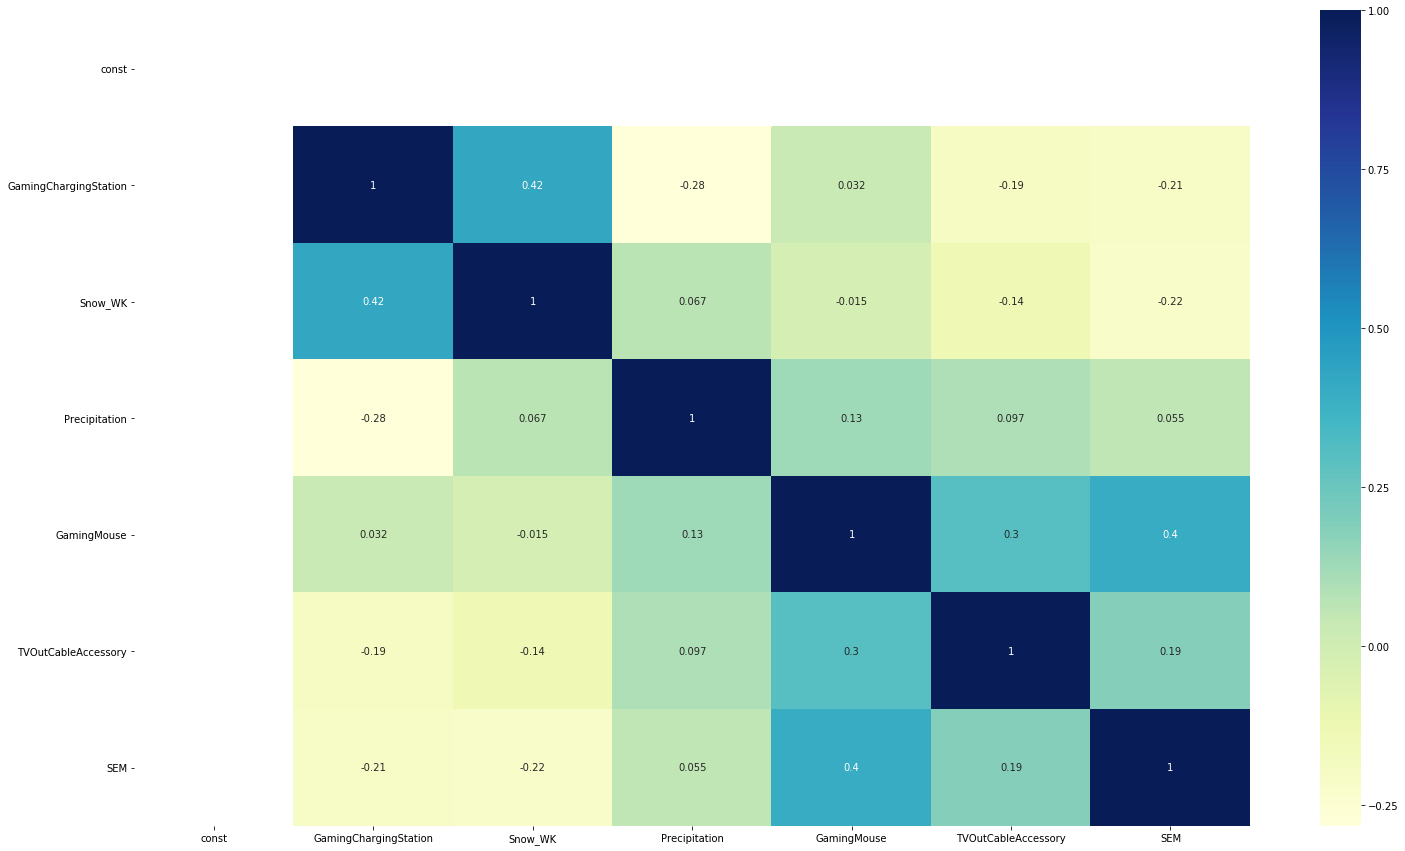

In [816]:
plt.figure(figsize = (25, 15))
sns.heatmap(X.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [817]:
### Validation using Kfold timeseries split - MEan RMSE 
#creating the train and validation set from orignial data set

X = gaming_linear.copy()
X=X[col_rfe]
y=gaming_linear['gmv']

[627233.3128198124]


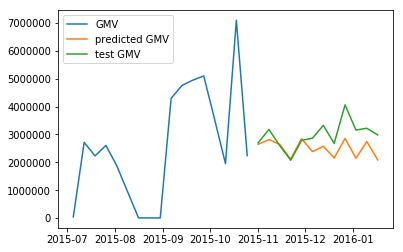

[627233.3128198124, 50383333090.88434]


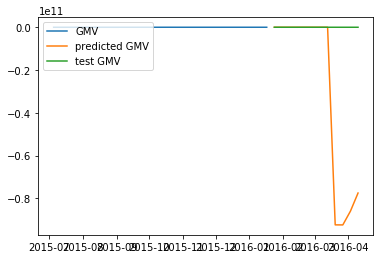

[627233.3128198124, 50383333090.88434, 1929611.2363499843]


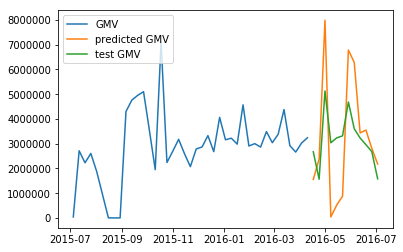

RMSE: 16795296645.144503


In [818]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from math import sqrt

tscv = TimeSeriesSplit(n_splits = 3)
rmse = []

for train_index, test_index in tscv.split(X):
    cv_train, cv_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    scaler_new=StandardScaler()
    cv_train[col_rfe]=scaler_new.fit_transform(cv_train[col_rfe])
    cv_test[col_rfe]=scaler_new.transform(cv_test[col_rfe])
    #print(cv_train)
    cv_train = sm.add_constant(cv_train)
    cv_test=sm.add_constant(cv_test, prepend=True, has_constant='add')
    
    model = sm.OLS(y_train,cv_train).fit()
    predictions = model.predict(cv_test)
    true_values = y_test.values
    rmse.append(sqrt(mean_squared_error(true_values, predictions)))
    print(rmse)
    plt.plot(y_train.index,y_train, '-', label="GMV")
    plt.plot(y_test.index,predictions,'-',label="predicted GMV")
    plt.plot(y_test.index, y_test,'-',label="test GMV")
    plt.legend(loc='upper left')
    plt.show()
print("RMSE: {}".format(np.mean(rmse)))

In [819]:
### TEst validation by fitting into model
test[cols_orig] = scaler.transform(test[cols_orig])
test_new=test[col_rfe]
test_new=sm.add_constant(test_new, prepend=True, has_constant='add')
test_new

const  GamingChargingStation   Snow_WK  Precipitation  \
Week                                                                
2016-03-20  1.0   -0.712131              -0.454859  0.544331        
2016-03-27  1.0   -0.132490              -0.454859  0.544331        
2016-04-03  1.0    0.447152              -0.454859  0.544331        
2016-04-10  1.0   -0.712131              -0.454859  0.544331        
2016-04-17  1.0   -0.712131              -0.454859 -1.837117        
2016-04-24  1.0   -0.712131              -0.454859 -1.837117        
2016-05-01  1.0   -0.712131              -0.454859  0.544331        
2016-05-08  1.0   -0.712131              -0.454859  0.544331        
2016-05-15  1.0   -0.712131              -0.454859  0.544331        
2016-05-22  1.0   -0.712131              -0.454859  0.544331        
2016-05-29  1.0   -0.712131              -0.454859  0.544331        
2016-06-05  1.0   -0.712131              -0.454859  0.544331        
2016-06-12  1.0   -0.132490              -0.454859 -1.837117        
2016-06-19  1.0   -0.712131              -0.454859  0.544331        
2016-06-26  1.0   -0.712131              -0.454859  0.544331        
2016-07-03  1.0   -0.712131              -0.454859  0.544331        

            GamingMouse  TVOutCableAccessory       SEM  
Week                                                    
2016-03-20 -0.302194     0.275477            -0.461921  
2016-03-27 -0.359101     0.148334            -0.461921  
2016-04-03 -0.268998    -0.317859            -0.503773  
2016-04-10 -0.311678    -0.127143            -0.559574  
2016-04-17 -0.411265    -0.466193            -0.559574  
2016-04-24 -0.202607    -0.995957            -0.559574  
2016-05-01  0.240003     1.229053            -0.516878  
2016-05-08 -0.283225    -0.466193            -0.260698  
2016-05-15 -0.212091    -0.466193            -0.260698  
2016-05-22 -0.231060    -0.021191            -0.260698  
2016-05-29  0.627286     0.105953            -0.260698  
2016-06-05  0.173611     0.084762            -0.516100  
2016-06-12 -0.213672    -0.784051            -0.618261  
2016-06-19 -0.324324    -0.296668            -0.618261  
2016-06-26 -0.427073    -0.339049            -0.618261  
2016-07-03 -0.722673    -0.890004            -0.812203

In [820]:
y_pred=gaming_linear_m18.predict(test_new)
test_lr_reg=test.copy()
test_lr_reg['predicted_gmv']=y_pred

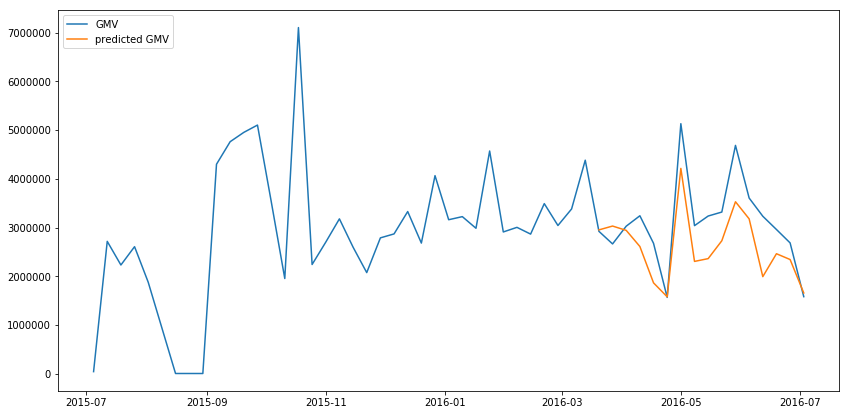

In [821]:
plt.figure(figsize=(14,7))
plt.plot(gaming_final.index,gaming_final.gmv, '-', label="GMV")
plt.plot(test.index,test_lr_reg.predicted_gmv,'-',label="predicted GMV")
plt.legend(loc='upper left')
plt.show()

In [822]:
from numpy import sqrt
from sklearn.metrics import mean_squared_error
camera_lr_reg_RMSE=sqrt(mean_squared_error(test.gmv,test_lr_reg.predicted_gmv))
camera_lr_reg_RMSE


666755.5729987689

#### <div id=20></div>Model Summary
Model Adj-R2:0.919<br>
K fold mean RMSE :651420<br>
Test RMSE : 666755<br>
Features : GamingChargingStation,Snow_WK,Precipitation	,GamingMouse,TVOutCableAccessory, SEM

### <div id=26></div>Model Building - Multiplicative Model

In [823]:
gaming_log=gaming_final.copy()
cols_orig=['GamePad','GamingAccessoryKit','GamingHeadset','GamingMemoryCard','MotionController','GamingMouse','TVOutCableAccessory','deliverybdays','deliverycdays','Prepaid','sla','product_procurement_sla','payday','saleday','discount_per','GamingGun','JoystickGamingWheel','GamingAdapter','GamingMousePad','GamingKeyboard','GamingSpeaker','GamingChargingStation','GameControlMount','listprice','Holiday','Hot_WK','Snow_WK','Rain','Precipitation','NPS','Stock','Total_Investment','TV','Digital','Sponsorship','Content_Marketing','Online_marketing','Affiliates','SEM','Radio','Other']

In [824]:
gaming_log=gaming_log.apply(lambda x : [abs(i)+0.0001 if i <= 0 else i for i in x])
gaming_log

GamePad  GamingAccessoryKit  GamingHeadset  GamingMemoryCard  \
Week                                                                       
2015-07-05  17.0     4.0000              4.0            0.0001             
2015-07-12  933.0    82.0000             174.0          37.0000            
2015-07-19  1045.0   96.0000             186.0          37.0000            
2015-07-26  1028.0   134.0000            277.0          34.0000            
2015-08-02  683.0    84.0000             400.0          9.0000             
2015-08-16  3.0      0.0001              1.0            0.0001             
2015-08-30  6.0      0.0001              2.0            0.0001             
2015-09-06  2020.0   116.0000            674.0          34.0000            
2015-09-13  1844.0   182.0000            744.0          266.0000           
2015-09-20  2025.0   156.0000            768.0          200.0000           
2015-09-27  2106.0   230.0000            1138.0         110.0000           
2015-10-04  1459.0   132.0000            666.0          46.0000            
2015-10-11  853.0    106.0000            234.0          39.0000            
2015-10-18  1996.0   170.0000            2109.0         90.0000            
2015-10-25  863.0    104.0000            496.0          61.0000            
2015-11-01  950.0    131.0000            1011.0         42.0000            
2015-11-08  1060.0   146.0000            794.0          43.0000            
2015-11-15  902.0    146.0000            959.0          58.0000            
2015-11-22  751.0    132.0000            692.0          85.0000            
2015-11-29  1018.0   124.0000            953.0          105.0000           
2015-12-06  946.0    134.0000            1050.0         214.0000           
2015-12-13  1159.0   153.0000            866.0          237.0000           
2015-12-20  1006.0   104.0000            509.0          243.0000           
2015-12-27  1272.0   141.0000            918.0          600.0000           
2016-01-03  1093.0   125.0000            740.0          272.0000           
2016-01-10  1059.0   103.0000            843.0          323.0000           
2016-01-17  843.0    103.0000            1051.0         366.0000           
2016-01-24  1485.0   115.0000            1490.0         463.0000           
2016-01-31  988.0    81.0000             746.0          274.0000           
2016-02-07  927.0    108.0000            1052.0         248.0000           
2016-02-14  887.0    103.0000            1425.0         180.0000           
2016-02-21  970.0    91.0000             1669.0         297.0000           
2016-02-28  975.0    116.0000            1942.0         141.0000           
2016-03-06  1040.0   93.0000             2043.0         64.0000            
2016-03-13  1500.0   115.0000            1735.0         32.0000            
2016-03-20  1145.0   139.0000            504.0          45.0000            
2016-03-27  1089.0   128.0000            478.0          47.0000            
2016-04-03  1073.0   123.0000            566.0          55.0000            
2016-04-10  1121.0   131.0000            553.0          43.0000            
2016-04-17  948.0    77.0000             409.0          21.0000            
2016-04-24  524.0    42.0000             236.0          25.0000            
2016-05-01  1893.0   227.0000            1317.0         48.0000            
2016-05-08  1103.0   145.0000            745.0          25.0000            
2016-05-15  1108.0   146.0000            1003.0         53.0000            
2016-05-22  1066.0   151.0000            1105.0         37.0000            
2016-05-29  1578.0   149.0000            1012.0         66.0000            
2016-06-05  1218.0   160.0000            801.0          73.0000            
2016-06-12  1111.0   146.0000            648.0          84.0000            
2016-06-19  986.0    142.0000            622.0          56.0000            
2016-06-26  903.0    120.0000            615.0          31.0000            
2016-07-03  462.0    79.0000             355.0          11.0

In [825]:
gaming_log=gaming_log.apply(lambda X: np.log(X) , axis=1)
gaming_log

GamePad  GamingAccessoryKit  GamingHeadset  GamingMemoryCard  \
Week                                                                        
2015-07-05  2.833213  1.386294            1.386294      -9.210340           
2015-07-12  6.838405  4.406719            5.159055       3.610918           
2015-07-19  6.951772  4.564348            5.225747       3.610918           
2015-07-26  6.935370  4.897840            5.624018       3.526361           
2015-08-02  6.526495  4.430817            5.991465       2.197225           
2015-08-16  1.098612 -9.210340            0.000000      -9.210340           
2015-08-30  1.791759 -9.210340            0.693147      -9.210340           
2015-09-06  7.610853  4.753590            6.513230       3.526361           
2015-09-13  7.519692  5.204007            6.612041       5.583496           
2015-09-20  7.613325  5.049856            6.643790       5.298317           
2015-09-27  7.652546  5.438079            7.037028       4.700480           
2015-10-04  7.285507  4.882802            6.501290       3.828641           
2015-10-11  6.748760  4.663439            5.455321       3.663562           
2015-10-18  7.598900  5.135798            7.653969       4.499810           
2015-10-25  6.760415  4.644391            6.206576       4.110874           
2015-11-01  6.856462  4.875197            6.918695       3.737670           
2015-11-08  6.966024  4.983607            6.677083       3.761200           
2015-11-15  6.804615  4.983607            6.865891       4.060443           
2015-11-22  6.621406  4.882802            6.539586       4.442651           
2015-11-29  6.925595  4.820282            6.859615       4.653960           
2015-12-06  6.852243  4.897840            6.956545       5.365976           
2015-12-13  7.055313  5.030438            6.763885       5.468060           
2015-12-20  6.913737  4.644391            6.232448       5.493061           
2015-12-27  7.148346  4.948760            6.822197       6.396930           
2016-01-03  6.996681  4.828314            6.606650       5.605802           
2016-01-10  6.965080  4.634729            6.736967       5.777652           
2016-01-17  6.736967  4.634729            6.957497       5.902633           
2016-01-24  7.303170  4.744932            7.306531       6.137727           
2016-01-31  6.895683  4.394449            6.614726       5.613128           
2016-02-07  6.831954  4.682131            6.958448       5.513429           
2016-02-14  6.787845  4.634729            7.261927       5.192957           
2016-02-21  6.877296  4.510860            7.419980       5.693732           
2016-02-28  6.882437  4.753590            7.571474       4.948760           
2016-03-06  6.946976  4.532599            7.622175       4.158883           
2016-03-13  7.313220  4.744932            7.458763       3.465736           
2016-03-20  7.043160  4.934474            6.222576       3.806662           
2016-03-27  6.993015  4.852030            6.169611       3.850148           
2016-04-03  6.978214  4.812184            6.338594       4.007333           
2016-04-10  7.021976  4.875197            6.315358       3.761200           
2016-04-17  6.854355  4.343805            6.013715       3.044522           
2016-04-24  6.261492  3.737670            5.463832       3.218876           
2016-05-01  7.545918  5.424950            7.183112       3.871201           
2016-05-08  7.005789  4.976734            6.613384       3.218876           
2016-05-15  7.010312  4.983607            6.910751       3.970292           
2016-05-22  6.971669  5.017280            7.007601       3.610918           
2016-05-29  7.363914  5.003946            6.919684       4.189655           
2016-06-05  7.104965  5.075174            6.685861       4.290459           
2016-06-12  7.013016  4.983607            6.473891       4.430817           
2016-06-19  6.893656  4.955827            6.432940       4.025352           
2016-06-26  6.805723  4.787492            6.421622       3.433987           
2016-07-0

In [826]:
#creating the train and validation set from orignial data set
train = gaming_log[:int(0.7*(len(gaming_log)))]
test = gaming_log[int(0.7*(len(gaming_log))):]

In [827]:
#Feature selection using rFE
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

X=train.copy()
X=X.drop('gmv',axis=1)
Y=train['gmv']
estimator_lr=LinearRegression()
rfe = RFE(estimator_lr, 15)             # running RFE
rfe = rfe.fit(X,Y)

In [828]:
col_rfe = X.columns[rfe.support_]
col_rfe

Index(['GamePad', 'GamingAccessoryKit', 'GamingMouse', 'discount_per',
       'listprice', 'NPS', 'Stock', 'TV', 'Digital', 'Sponsorship',
       'Online_marketing', 'Affiliates', 'SEM', 'Radio', 'Other'],
      dtype='object')

In [829]:
import statsmodels.api as sm
X=train[col_rfe]

X = sm.add_constant(X)
y=train['gmv']
gaming_mul = sm.OLS(y,X).fit()

# Check p-values to drop insignificant variable
p_values = gaming_mul.summary2().tables[1]['P>|t|']
p_values = p_values[p_values > 0.05]
print(round(p_values,5).sort_values(ascending=False))

# Check summary
gaming_mul.summary()

discount_per    0.33421
Stock           0.14936
const           0.13378
NPS             0.11224
Name: P>|t|, dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                     8903.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.80e-33
Time:                        22:20:36   Log-Likelihood:                 87.418
No. Observations:                  35   AIC:                            -142.8
Df Residuals:                      19   BIC:                            -118.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -12.8265      8.189     -1.566      0.134     -29.966       4.313
GamePad                0.4010      0.034     11.944      0.000       0.331       0.471
GamingAccessoryKit     0.0568      0.020      2.850      0.010       0.015       0.098
GamingMouse            0.0971      0.019      5.008      0.000       0.057       0.138
discount_per           0.1047      0.106      0.991      0.334      -0.116       0.326
listprice              0.4922      0.040     12.386      0.000       0.409       0.575
NPS                    2.3328      1.401      1.665      0.112      -0.599       5.265
Stock                 -0.2273      0.151     -1.503      0.149      -0.544       0.089
TV                    -0.5757      0.137     -4.214      0.000      -0.862      -0.290
Digital               -0.5443      0.163     -3.341      0.003      -0.885      -0.203
Sponsorship            0.1219      0.051      2.383      0.028       0.015       0.229
Online_marketing      -1.8741      0.602     -3.111      0.006      -3.135      -0.613
Affiliates             2.6482      0.688      3.847      0.001       1.207       4.089
SEM                    0.9151      0.257      3.558      0.002       0.377       1.453
Radio                 -1.0317      0.295     -3.503      0.002      -1.648      -0.415
Other                  0.9319      0.266      3.505      0.002       0.376       1.488
==============================================================================
Omnibus:                        0.913   Durbin-Watson:                   2.945
Prob(Omnibus):                  0.634   Jarque-Bera (JB):                0.919
Skew:                          -0.342   Prob(JB):                        0.632
Kurtosis:                       2.598   Cond. No.                     7.29e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [830]:
# Drop columns with high VIF-value/p-value
X.drop('discount_per', axis = 1, inplace = True)

# Again build the model
X = sm.add_constant(X)
y=train['gmv']
gaming_mul = sm.OLS(y,X).fit()

# Check p-values to drop insignificant variable
p_values = gaming_mul.summary2().tables[1]['P>|t|']
p_values = p_values[p_values > 0.05]
print(round(p_values,5).sort_values(ascending=False))

# Check summary
gaming_mul.summary()

const    0.16100
NPS      0.12958
Stock    0.10571
Name: P>|t|, dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                     9548.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           4.49e-35
Time:                        22:20:36   Log-Likelihood:                 86.536
No. Observations:                  35   AIC:                            -143.1
Df Residuals:                      20   BIC:                            -119.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -11.8235      8.122     -1.456      0.161     -28.767       5.119
GamePad                0.3875      0.031     12.626      0.000       0.324       0.452
GamingAccessoryKit     0.0500      0.019      2.673      0.015       0.011       0.089
GamingMouse            0.0989      0.019      5.129      0.000       0.059       0.139
listprice              0.5137      0.033     15.416      0.000       0.444       0.583
NPS                    2.2040      1.394      1.581      0.130      -0.704       5.112
Stock                 -0.2525      0.149     -1.694      0.106      -0.563       0.058
TV                    -0.5846      0.136     -4.291      0.000      -0.869      -0.300
Digital               -0.5293      0.162     -3.265      0.004      -0.868      -0.191
Sponsorship            0.1159      0.051      2.283      0.033       0.010       0.222
Online_marketing      -1.8696      0.602     -3.105      0.006      -3.126      -0.614
Affiliates             2.6563      0.688      3.861      0.001       1.221       4.092
SEM                    0.8946      0.256      3.491      0.002       0.360       1.429
Radio                 -1.0572      0.293     -3.605      0.002      -1.669      -0.445
Other                  0.9547      0.265      3.606      0.002       0.403       1.507
==============================================================================
Omnibus:                        1.014   Durbin-Watson:                   2.945
Prob(Omnibus):                  0.602   Jarque-Bera (JB):                0.590
Skew:                          -0.318   Prob(JB):                        0.744
Kurtosis:                       3.013   Cond. No.                     7.21e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.21e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [831]:
# Drop columns with high VIF-value/p-value
X.drop('NPS', axis = 1, inplace = True)

# Again build the model
X = sm.add_constant(X)
y=train['gmv']
gaming_mul = sm.OLS(y,X).fit()

# Check p-values to drop insignificant variable
p_values = gaming_mul.summary2().tables[1]['P>|t|']
p_values = p_values[p_values > 0.05]
print(round(p_values,5).sort_values(ascending=False))

# Check summary
gaming_mul.summary()

const          0.65444
Sponsorship    0.11976
Name: P>|t|, dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                     9597.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.44e-36
Time:                        22:20:36   Log-Likelihood:                 84.475
No. Observations:                  35   AIC:                            -141.0
Df Residuals:                      21   BIC:                            -119.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.7603      1.674      0.454      0.654      -2.722       4.242
GamePad                0.4182      0.025     16.995      0.000       0.367       0.469
GamingAccessoryKit     0.0443      0.019      2.332      0.030       0.005       0.084
GamingMouse            0.0879      0.019      4.723      0.000       0.049       0.127
listprice              0.5272      0.033     15.821      0.000       0.458       0.597
Stock                 -0.3231      0.147     -2.195      0.040      -0.629      -0.017
TV                    -0.6031      0.141     -4.292      0.000      -0.895      -0.311
Digital               -0.3320      0.107     -3.099      0.005      -0.555      -0.109
Sponsorship            0.0532      0.033      1.622      0.120      -0.015       0.121
Online_marketing      -1.0153      0.275     -3.694      0.001      -1.587      -0.444
Affiliates             1.7064      0.347      4.918      0.000       0.985       2.428
SEM                    0.5581      0.148      3.781      0.001       0.251       0.865
Radio                 -1.1065      0.302     -3.666      0.001      -1.734      -0.479
Other                  0.9994      0.272      3.668      0.001       0.433       1.566
==============================================================================
Omnibus:                        0.400   Durbin-Watson:                   2.743
Prob(Omnibus):                  0.819   Jarque-Bera (JB):                0.045
Skew:                          -0.078   Prob(JB):                        0.978
Kurtosis:                       3.079   Cond. No.                     1.44e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [832]:
# Drop columns with high VIF-value/p-value
X.drop('Sponsorship', axis = 1, inplace = True)

# Again build the model
X = sm.add_constant(X)
y=train['gmv']
gaming_mul = sm.OLS(y,X).fit()

# Check p-values to drop insignificant variable
p_values = gaming_mul.summary2().tables[1]['P>|t|']
p_values = p_values[p_values > 0.05]
print(round(p_values,5).sort_values(ascending=False))

# Check summary
gaming_mul.summary()

GamingAccessoryKit    0.09262
Name: P>|t|, dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                     9679.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           4.90e-38
Time:                        22:20:37   Log-Likelihood:                 82.410
No. Observations:                  35   AIC:                            -138.8
Df Residuals:                      22   BIC:                            -118.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.8602      1.100      2.600      0.016       0.579       5.142
GamePad                0.4389      0.022     20.102      0.000       0.394       0.484
GamingAccessoryKit     0.0315      0.018      1.758      0.093      -0.006       0.069
GamingMouse            0.0701      0.016      4.503      0.000       0.038       0.102
listprice              0.5481      0.032     17.197      0.000       0.482       0.614
Stock                 -0.4316      0.136     -3.177      0.004      -0.713      -0.150
TV                    -0.4257      0.091     -4.655      0.000      -0.615      -0.236
Digital               -0.2053      0.076     -2.702      0.013      -0.363      -0.048
Online_marketing      -0.7567      0.232     -3.261      0.004      -1.238      -0.275
Affiliates             1.2738      0.230      5.537      0.000       0.797       1.751
SEM                    0.3907      0.109      3.573      0.002       0.164       0.617
Radio                 -0.8226      0.255     -3.228      0.004      -1.351      -0.294
Other                  0.7418      0.229      3.234      0.004       0.266       1.218
==============================================================================
Omnibus:                        0.232   Durbin-Watson:                   2.729
Prob(Omnibus):                  0.891   Jarque-Bera (JB):                0.349
Skew:                          -0.171   Prob(JB):                        0.840
Kurtosis:                       2.649   Cond. No.                     8.41e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.41e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [833]:
# Drop columns with high VIF-value/p-value
X.drop('GamingAccessoryKit', axis = 1, inplace = True)

# Again build the model
X = sm.add_constant(X)
y=train['gmv']
gaming_mul = sm.OLS(y,X).fit()

# Check p-values to drop insignificant variable
p_values = gaming_mul.summary2().tables[1]['P>|t|']
p_values = p_values[p_values > 0.05]
print(round(p_values,5).sort_values(ascending=False))

# Check summary
gaming_mul.summary()

Digital    0.05753
Name: P>|t|, dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                     9679.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.05e-39
Time:                        22:20:37   Log-Likelihood:                 80.110
No. Observations:                  35   AIC:                            -136.2
Df Residuals:                      23   BIC:                            -117.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                3.5947      1.063      3.381      0.003       1.396       5.794
GamePad              0.4463      0.022     19.957      0.000       0.400       0.493
GamingMouse          0.0871      0.013      6.857      0.000       0.061       0.113
listprice            0.5480      0.033     16.462      0.000       0.479       0.617
Stock               -0.4132      0.141     -2.921      0.008      -0.706      -0.121
TV                  -0.3256      0.075     -4.357      0.000      -0.480      -0.171
Digital             -0.1346      0.067     -1.999      0.058      -0.274       0.005
Online_marketing    -0.7897      0.242     -3.269      0.003      -1.289      -0.290
Affiliates           1.2145      0.238      5.109      0.000       0.723       1.706
SEM                  0.2801      0.093      2.998      0.006       0.087       0.473
Radio               -0.5634      0.217     -2.595      0.016      -1.012      -0.114
Other                0.5082      0.195      2.602      0.016       0.104       0.912
==============================================================================
Omnibus:                        0.321   Durbin-Watson:                   2.762
Prob(Omnibus):                  0.852   Jarque-Bera (JB):                0.492
Skew:                           0.157   Prob(JB):                        0.782
Kurtosis:                       2.512   Cond. No.                     7.69e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [834]:
# Drop columns with high VIF-value/p-value
X.drop('Digital', axis = 1, inplace = True)

# Again build the model
X = sm.add_constant(X)
y=train['gmv']
gaming_mul = sm.OLS(y,X).fit()

# Check p-values to drop insignificant variable
p_values = gaming_mul.summary2().tables[1]['P>|t|']
p_values = p_values[p_values > 0.05]
print(round(p_values,5).sort_values(ascending=False))

# Check summary
gaming_mul.summary()

Series([], Name: P>|t|, dtype: float64)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                     9464.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.28e-40
Time:                        22:20:37   Log-Likelihood:                 77.305
No. Observations:                  35   AIC:                            -132.6
Df Residuals:                      24   BIC:                            -115.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                4.6070      0.991      4.647      0.000       2.561       6.653
GamePad              0.4538      0.023     19.400      0.000       0.405       0.502
GamingMouse          0.0664      0.008      8.504      0.000       0.050       0.083
listprice            0.5692      0.033     17.014      0.000       0.500       0.638
Stock               -0.4336      0.150     -2.897      0.008      -0.743      -0.125
TV                  -0.1955      0.039     -5.015      0.000      -0.276      -0.115
Online_marketing    -0.9672      0.238     -4.059      0.000      -1.459      -0.475
Affiliates           1.2943      0.249      5.208      0.000       0.781       1.807
SEM                  0.0966      0.019      5.198      0.000       0.058       0.135
Radio               -0.1496      0.070     -2.150      0.042      -0.293      -0.006
Other                0.1361      0.063      2.163      0.041       0.006       0.266
==============================================================================
Omnibus:                        0.373   Durbin-Watson:                   2.812
Prob(Omnibus):                  0.830   Jarque-Bera (JB):                0.465
Skew:                           0.217   Prob(JB):                        0.793
Kurtosis:                       2.640   Cond. No.                     6.25e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.25e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [835]:
# Check VIF
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features       VIF
0   const             33389.39
10  Other             13185.53
9   Radio             13056.98
6   Online_marketing  4224.60 
7   Affiliates        3662.34 
5   TV                170.98  
3   listprice         77.35   
1   GamePad           40.45   
2   GamingMouse       28.98   
8   SEM               5.33    
4   Stock             3.49

In [836]:
# Drop columns with high VIF-value/p-value
X.drop('Other', axis = 1, inplace = True)

# Again build the model
X = sm.add_constant(X)
y=train['gmv']
gaming_mul = sm.OLS(y,X).fit()

# Check p-values to drop insignificant variable
p_values = gaming_mul.summary2().tables[1]['P>|t|']
p_values = p_values[p_values > 0.05]
print(round(p_values,5).sort_values(ascending=False))

# Check summary
gaming_mul.summary()

Radio    0.40881
Name: P>|t|, dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                     9166.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.09e-41
Time:                        22:20:37   Log-Likelihood:                 74.189
No. Observations:                  35   AIC:                            -128.4
Df Residuals:                      25   BIC:                            -112.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                4.4736      1.060      4.222      0.000       2.291       6.656
GamePad              0.4468      0.025     18.006      0.000       0.396       0.498
GamingMouse          0.0608      0.008      7.708      0.000       0.045       0.077
listprice            0.5850      0.035     16.729      0.000       0.513       0.657
Stock               -0.3996      0.159     -2.507      0.019      -0.728      -0.071
TV                  -0.1315      0.027     -4.835      0.000      -0.188      -0.076
Online_marketing    -1.2205      0.222     -5.491      0.000      -1.678      -0.763
Affiliates           1.4974      0.246      6.075      0.000       0.990       2.005
SEM                  0.0986      0.020      4.960      0.000       0.058       0.140
Radio                0.0009      0.001      0.840      0.409      -0.001       0.003
==============================================================================
Omnibus:                        0.309   Durbin-Watson:                   2.639
Prob(Omnibus):                  0.857   Jarque-Bera (JB):                0.490
Skew:                           0.097   Prob(JB):                        0.783
Kurtosis:                       2.454   Cond. No.                     6.18e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [837]:
# Drop columns with high VIF-value/p-value
X.drop('Radio', axis = 1, inplace = True)

# Again build the model
X = sm.add_constant(X)
y=train['gmv']
gaming_mul = sm.OLS(y,X).fit()

# Check p-values to drop insignificant variable
p_values = gaming_mul.summary2().tables[1]['P>|t|']
p_values = p_values[p_values > 0.05]
print(round(p_values,5).sort_values(ascending=False))

# Check summary
gaming_mul.summary()

Series([], Name: P>|t|, dtype: float64)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.043e+04
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.45e-43
Time:                        22:20:37   Log-Likelihood:                 73.701
No. Observations:                  35   AIC:                            -129.4
Df Residuals:                      26   BIC:                            -115.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                4.9749      0.871      5.713      0.000       3.185       6.765
GamePad              0.4445      0.025     18.128      0.000       0.394       0.495
GamingMouse          0.0615      0.008      7.891      0.000       0.045       0.078
listprice            0.5859      0.035     16.857      0.000       0.514       0.657
Stock               -0.4788      0.128     -3.745      0.001      -0.742      -0.216
TV                  -0.1309      0.027     -4.841      0.000      -0.186      -0.075
Online_marketing    -1.2929      0.204     -6.345      0.000      -1.712      -0.874
Affiliates           1.5772      0.226      6.975      0.000       1.112       2.042
SEM                  0.0999      0.020      5.068      0.000       0.059       0.140
==============================================================================
Omnibus:                        0.407   Durbin-Watson:                   2.535
Prob(Omnibus):                  0.816   Jarque-Bera (JB):                0.407
Skew:                           0.230   Prob(JB):                        0.816
Kurtosis:                       2.739   Cond. No.                     5.03e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [838]:
# Check VIF
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features       VIF
0  const             22718.24
6  Online_marketing  2723.57 
7  Affiliates        2673.03 
3  listprice         73.60   
5  TV                72.54   
1  GamePad           39.19   
2  GamingMouse       25.46   
8  SEM               5.29    
4  Stock             2.24

In [839]:
# Drop columns with high VIF-value/p-value
X.drop('Online_marketing', axis = 1, inplace = True)

# Again build the model
X = sm.add_constant(X)
y=train['gmv']
gaming_mul = sm.OLS(y,X).fit()

# Check p-values to drop insignificant variable
p_values = gaming_mul.summary2().tables[1]['P>|t|']
p_values = p_values[p_values > 0.05]
print(round(p_values,5).sort_values(ascending=False))

# Check summary
gaming_mul.summary()

SEM      0.95127
Stock    0.37018
Name: P>|t|, dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4855.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           3.82e-40
Time:                        22:20:37   Log-Likelihood:                 57.329
No. Observations:                  35   AIC:                            -98.66
Df Residuals:                      27   BIC:                            -86.22
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.2958      1.354      3.173      0.004       1.518       7.074
GamePad         0.4436      0.038     11.549      0.000       0.365       0.522
GamingMouse     0.0476      0.012      4.059      0.000       0.024       0.072
listprice       0.5953      0.054     10.943      0.000       0.484       0.707
Stock          -0.1687      0.185     -0.911      0.370      -0.548       0.211
TV             -0.1114      0.042     -2.646      0.013      -0.198      -0.025
Affiliates      0.1558      0.048      3.232      0.003       0.057       0.255
SEM             0.0012      0.019      0.062      0.951      -0.038       0.040
==============================================================================
Omnibus:                        1.707   Durbin-Watson:                   1.726
Prob(Omnibus):                  0.426   Jarque-Bera (JB):                0.785
Skew:                          -0.304   Prob(JB):                        0.675
Kurtosis:                       3.411   Cond. No.                     4.44e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [840]:
# Drop columns with high VIF-value/p-value
X.drop('SEM', axis = 1, inplace = True)

# Again build the model
X = sm.add_constant(X)
y=train['gmv']
gaming_mul = sm.OLS(y,X).fit()

# Check p-values to drop insignificant variable
p_values = gaming_mul.summary2().tables[1]['P>|t|']
p_values = p_values[p_values > 0.05]
print(round(p_values,5).sort_values(ascending=False))

# Check summary
gaming_mul.summary()

Stock    0.31891
Name: P>|t|, dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     5873.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           4.74e-42
Time:                        22:20:37   Log-Likelihood:                 57.327
No. Observations:                  35   AIC:                            -100.7
Df Residuals:                      28   BIC:                            -89.77
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.2766      1.294      3.305      0.003       1.626       6.927
GamePad         0.4439      0.037     11.847      0.000       0.367       0.521
GamingMouse     0.0474      0.011      4.183      0.000       0.024       0.071
listprice       0.5951      0.053     11.155      0.000       0.486       0.704
Stock          -0.1634      0.161     -1.015      0.319      -0.493       0.166
TV             -0.1100      0.035     -3.158      0.004      -0.181      -0.039
Affiliates      0.1544      0.042      3.663      0.001       0.068       0.241
==============================================================================
Omnibus:                        1.796   Durbin-Watson:                   1.732
Prob(Omnibus):                  0.407   Jarque-Bera (JB):                0.857
Skew:                          -0.324   Prob(JB):                        0.652
Kurtosis:                       3.409   Cond. No.                     3.77e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [841]:
# Drop columns with high VIF-value/p-value
X.drop('Stock', axis = 1, inplace = True)

# Again build the model
X = sm.add_constant(X)
y=train['gmv']
gaming_mul = sm.OLS(y,X).fit()

# Check p-values to drop insignificant variable
p_values = gaming_mul.summary2().tables[1]['P>|t|']
p_values = p_values[p_values > 0.05]
print(round(p_values,5).sort_values(ascending=False))

# Check summary
gaming_mul.summary()

Series([], Name: P>|t|, dtype: float64)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     7040.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           8.84e-44
Time:                        22:20:37   Log-Likelihood:                 56.695
No. Observations:                  35   AIC:                            -101.4
Df Residuals:                      29   BIC:                            -92.06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           3.0301      0.407      7.449      0.000       2.198       3.862
GamePad         0.4388      0.037     11.811      0.000       0.363       0.515
GamingMouse     0.0429      0.010      4.117      0.000       0.022       0.064
listprice       0.6098      0.051     11.868      0.000       0.505       0.715
TV             -0.0935      0.031     -3.033      0.005      -0.157      -0.030
Affiliates      0.1365      0.038      3.564      0.001       0.058       0.215
==============================================================================
Omnibus:                        1.228   Durbin-Watson:                   1.748
Prob(Omnibus):                  0.541   Jarque-Bera (JB):                0.464
Skew:                          -0.230   Prob(JB):                        0.793
Kurtosis:                       3.326   Cond. No.                     1.14e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [842]:
# Check VIF
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features      VIF
0  const        2092.17
3  listprice    67.90  
4  TV           39.83  
1  GamePad      37.98  
5  Affiliates   32.34  
2  GamingMouse  19.16

In [843]:
# Drop columns with high VIF-value/p-value
X.drop('listprice', axis = 1, inplace = True)

# Again build the model
X = sm.add_constant(X)
y=train['gmv']
gaming_mul = sm.OLS(y,X).fit()

# Check p-values to drop insignificant variable
p_values = gaming_mul.summary2().tables[1]['P>|t|']
p_values = p_values[p_values > 0.05]
print(round(p_values,5).sort_values(ascending=False))

# Check summary
gaming_mul.summary()

TV    0.09094
Name: P>|t|, dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     1548.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.81e-34
Time:                        22:20:38   Log-Likelihood:                 25.762
No. Observations:                  35   AIC:                            -41.52
Df Residuals:                      30   BIC:                            -33.75
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           7.3337      0.439     16.723      0.000       6.438       8.229
GamePad         0.8165      0.046     17.901      0.000       0.723       0.910
GamingMouse     0.1229      0.019      6.515      0.000       0.084       0.161
TV             -0.1276      0.073     -1.747      0.091      -0.277       0.022
Affiliates      0.2017      0.090      2.237      0.033       0.018       0.386
==============================================================================
Omnibus:                        3.776   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.151   Jarque-Bera (JB):                2.734
Skew:                           0.301   Prob(JB):                        0.255
Kurtosis:                       4.229   Cond. No.                         448.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [844]:
# Drop columns with high VIF-value/p-value
X.drop('TV', axis = 1, inplace = True)

# Again build the model
X = sm.add_constant(X)
y=train['gmv']
gaming_mul = sm.OLS(y,X).fit()

# Check p-values to drop insignificant variable
p_values = gaming_mul.summary2().tables[1]['P>|t|']
p_values = p_values[p_values > 0.05]
print(round(p_values,5).sort_values(ascending=False))

# Check summary
gaming_mul.summary()

Affiliates    0.07268
Name: P>|t|, dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     1935.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.50e-35
Time:                        22:20:38   Log-Likelihood:                 24.068
No. Observations:                  35   AIC:                            -40.14
Df Residuals:                      31   BIC:                            -33.91
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           7.7848      0.366     21.272      0.000       7.038       8.531
GamePad         0.8139      0.047     17.291      0.000       0.718       0.910
GamingMouse     0.1140      0.019      6.079      0.000       0.076       0.152
Affiliates      0.0513      0.028      1.858      0.073      -0.005       0.108
==============================================================================
Omnibus:                        2.015   Durbin-Watson:                   1.789
Prob(Omnibus):                  0.365   Jarque-Bera (JB):                0.978
Skew:                           0.074   Prob(JB):                        0.613
Kurtosis:                       3.805   Cond. No.                         278.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [845]:
# Drop columns with high VIF-value/p-value
X.drop('Affiliates', axis = 1, inplace = True)

# Again build the model
X = sm.add_constant(X)
y=train['gmv']
gaming_mul = sm.OLS(y,X).fit()

# Check p-values to drop insignificant variable
p_values = gaming_mul.summary2().tables[1]['P>|t|']
p_values = p_values[p_values > 0.05]
print(round(p_values,5).sort_values(ascending=False))

# Check summary
gaming_mul.summary()

Series([], Name: P>|t|, dtype: float64)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     2695.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.17e-36
Time:                        22:20:38   Log-Likelihood:                 22.220
No. Observations:                  35   AIC:                            -38.44
Df Residuals:                      32   BIC:                            -33.77
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           8.3380      0.221     37.754      0.000       7.888       8.788
GamePad         0.8305      0.048     17.320      0.000       0.733       0.928
GamingMouse     0.1222      0.019      6.457      0.000       0.084       0.161
==============================================================================
Omnibus:                        1.524   Durbin-Watson:                   1.611
Prob(Omnibus):                  0.467   Jarque-Bera (JB):                0.577
Skew:                           0.105   Prob(JB):                        0.750
Kurtosis:                       3.593   Cond. No.                         93.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [846]:
# Check VIF
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0  const        94.90
1  GamePad      9.74 
2  GamingMouse  9.74

In [847]:
# Drop columns with high VIF-value/p-value
X.drop('GamePad', axis = 1, inplace = True)

# Again build the model
X = sm.add_constant(X)
y=train['gmv']
gaming_mul = sm.OLS(y,X).fit()

# Check p-values to drop insignificant variable
p_values = gaming_mul.summary2().tables[1]['P>|t|']
p_values = p_values[p_values > 0.05]
print(round(p_values,5).sort_values(ascending=False))

# Check summary
gaming_mul.summary()

Series([], Name: P>|t|, dtype: float64)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     505.9
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.38e-21
Time:                        22:20:38   Log-Likelihood:                -18.719
No. Observations:                  35   AIC:                             41.44
Df Residuals:                      33   BIC:                             44.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.0989      0.128     94.581      0.000      11.839      12.359
GamingMouse     0.4325      0.019     22.491      0.000       0.393       0.472
==============================================================================
Omnibus:                       60.026   Durbin-Watson:                   0.780
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              517.131
Skew:                          -3.754   Prob(JB):                    5.09e-113
Kurtosis:                      20.269   Cond. No.                         12.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [848]:
# Check VIF
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0  const        3.16
1  GamingMouse  1.00

[321725.7379766463]


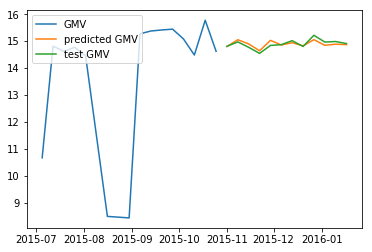

[321725.7379766463, 528836.0407549622]


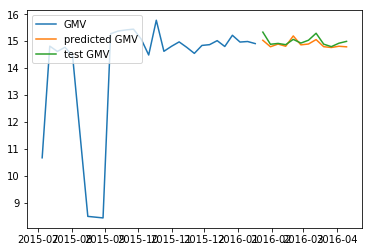

[321725.7379766463, 528836.0407549622, 732674.2330870641]


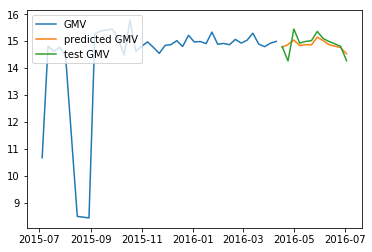

RMSE: 527745.3372728908


In [849]:
### Validation using K-fold timeseries using split.
X = gaming_log.copy()
cols=['GamingMouse']
X=X[cols]
y=gaming_log['gmv']

tscv = TimeSeriesSplit(n_splits = 3)
rmse = []

for train_index, test_index in tscv.split(X):
    cv_train, cv_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    cv_train = sm.add_constant(cv_train)
    cv_test=sm.add_constant(cv_test, prepend=True, has_constant='add')
    model = sm.OLS(y_train,cv_train).fit()
    predictions = model.predict(cv_test)
    true_values = y_test.values
    rmse.append(sqrt(mean_squared_error(np.exp(true_values), np.exp(predictions))))
    print(rmse)
    plt.plot(y_train.index,y_train, '-', label="GMV")
    plt.plot(y_test.index,predictions,'-',label="predicted GMV")
    plt.plot(y_test.index, y_test,'-',label="test GMV")
    plt.legend(loc='upper left')
    plt.show()
print("RMSE: {}".format(np.mean(rmse)))

In [850]:
### Test validation by fitting into the model
test_new=test[cols]
test_new=sm.add_constant(test_new, prepend=True, has_constant='add')
test_new

const  GamingMouse
Week                          
2016-03-20  1.0    6.285998   
2016-03-27  1.0    6.216606   
2016-04-03  1.0    6.324359   
2016-04-10  1.0    6.274762   
2016-04-17  1.0    6.148468   
2016-04-24  1.0    6.396930   
2016-05-01  1.0    6.779922   
2016-05-08  1.0    6.308098   
2016-05-15  1.0    6.386879   
2016-05-22  1.0    6.366470   
2016-05-29  1.0    7.025538   
2016-06-05  1.0    6.731018   
2016-06-12  1.0    6.385194   
2016-06-19  1.0    6.259581   
2016-06-26  1.0    6.126869   
2016-07-03  1.0    5.602119

In [851]:
y_pred=gaming_mul.predict(test_new)
test_lr_reg=test.copy()
test_lr_reg['predicted_gmv']=np.exp(y_pred)

In [852]:
test['ActualGMV']=np.exp(test.gmv)

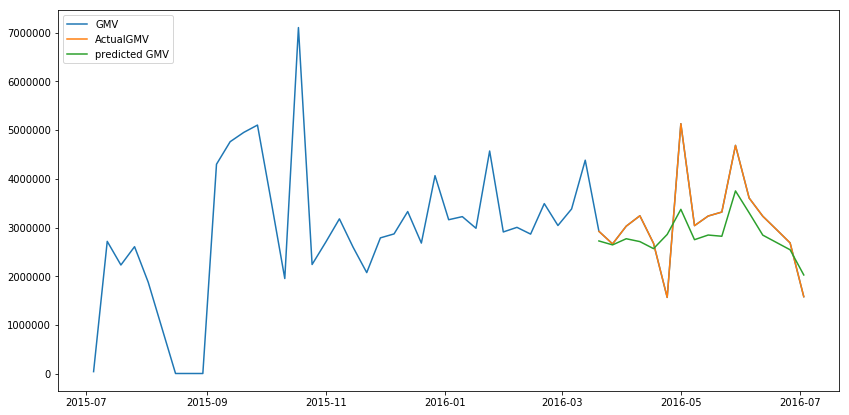

In [853]:
plt.figure(figsize=(14,7))
plt.plot(gaming_final.index,gaming_final.gmv, '-', label="GMV")

plt.plot(test.index, test.ActualGMV,'-',label="ActualGMV")
plt.plot(test.index,test_lr_reg.predicted_gmv,'-',label="predicted GMV")

plt.legend(loc='upper left')
plt.show()

In [854]:
from numpy import sqrt
from sklearn.metrics import mean_squared_error
camera_lr_reg_RMSE=sqrt(mean_squared_error(test.ActualGMV,test_lr_reg.predicted_gmv))
camera_lr_reg_RMSE

663348.335137197

#### <div id=27></div>Model Summary
Model Adj -R2 :0.985<br>
Kfold mean RMSE: 676737<br>
Test RMSE :719145<br>
Features: GamingKeyboard, Sponshorship

### <div id=28></div>Model Building-Distribution Model

In [855]:
gaming_lag=gaming_final.copy()
cols_orig=['GamePad','GamingAccessoryKit','GamingHeadset','GamingMemoryCard','MotionController','GamingMouse','TVOutCableAccessory','deliverybdays','deliverycdays','Prepaid','sla','product_procurement_sla','payday','saleday','discount_per','GamingGun','JoystickGamingWheel','GamingAdapter','GamingMousePad','GamingKeyboard','GamingSpeaker','GamingChargingStation','GameControlMount','listprice','Holiday','Hot_WK','Snow_WK','Rain','Precipitation','NPS','Stock','Total_Investment','TV','Digital','Sponsorship','Content_Marketing','Online_marketing','Affiliates','SEM','Radio','Other']

In [856]:
# Function to create lags
def lag_attributes (df,lag=2):
    new_dict={}
    for col_name in df:
        new_dict[col_name]=df[col_name]
        for l in range(1,lag+1):
            new_dict['%s_lag%d' %(col_name,l)]=df[col_name].shift(l)
    result=pd.DataFrame(new_dict,index=df.index)
    return result.dropna()

In [857]:
gaming_dlag=lag_attributes(gaming_lag)
gaming_dlag.head()

GamePad  GamePad_lag1  GamePad_lag2  GamingAccessoryKit  \
Week                                                                  
2015-07-19  1045.0   933.0         17.0          96                   
2015-07-26  1028.0   1045.0        933.0         134                  
2015-08-02  683.0    1028.0        1045.0        84                   
2015-08-16  3.0      683.0         1028.0        0                    
2015-08-30  6.0      3.0           683.0         0                    

            GamingAccessoryKit_lag1  GamingAccessoryKit_lag2  GamingHeadset  \
Week                                                                          
2015-07-19  82.0                     4.0                      186.0           
2015-07-26  96.0                     82.0                     277.0           
2015-08-02  134.0                    96.0                     400.0           
2015-08-16  84.0                     134.0                    1.0             
2015-08-30  0.0                      84.0                     2.0             

            GamingHeadset_lag1  GamingHeadset_lag2  GamingMemoryCard  \
Week                                                                   
2015-07-19  174.0               4.0                 37.0               
2015-07-26  186.0               174.0               34.0               
2015-08-02  277.0               186.0               9.0                
2015-08-16  400.0               277.0               0.0                
2015-08-30  1.0                 400.0               0.0                

            GamingMemoryCard_lag1  GamingMemoryCard_lag2  MotionController  \
Week                                                                         
2015-07-19  37.0                   0.0                    17                 
2015-07-26  37.0                   37.0                   20                 
2015-08-02  34.0                   37.0                   13                 
2015-08-16  9.0                    34.0                   0                  
2015-08-30  0.0                    9.0                    0                  

            MotionController_lag1  MotionController_lag2  GamingMouse  \
Week                                                                    
2015-07-19  29.0                   0.0                    365.0         
2015-07-26  17.0                   29.0                   475.0         
2015-08-02  20.0                   17.0                   249.0         
2015-08-16  13.0                   20.0                   0.0           
2015-08-30  0.0                    13.0                   0.0           

            GamingMouse_lag1  GamingMouse_lag2  TVOutCableAccessory  \
Week                                                                  
2015-07-19  947.0             5.0               78                    
2015-07-26  365.0             947.0             59                    
2015-08-02  475.0             365.0             63                    
2015-08-16  249.0             475.0             0                     
2015-08-30  0.0               249.0             0                     

            TVOutCableAccessory_lag1  TVOutCableAccessory_lag2           gmv  \
Week                                                                           
2015-07-19  56.0                      0.0                       2.230720e+06   
2015-07-26  78.0                      56.0                      2.606716e+06   
2015-08-02  59.0                      78.0                      1.877540e+06   
2015-08-16  63.0                      59.0                      4.875000e+03   
2015-08-30  0.0                       63.0                      4.606000e+03   

                gmv_lag1      gmv_lag2  deliverybdays  deliverybdays_lag1  \
Week                                                                        
2015-07-19  2.715683e+06  4.295500e+04  0.00000        0.00000              
2015-07-26  2.230720e+06  2.715683e+06  0.00000        0.00000              
2015-08-02  2.606716e+06  2.2

In [858]:
#creating the train and validation set from orignial data set
train = gaming_dlag[:int(0.7*(len(gaming_dlag)))]
test = gaming_dlag[int(0.7*(len(gaming_dlag))):]

In [859]:
#Feature selection using rFE
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

X=train.copy()
X=X.drop('gmv',axis=1)
Y=train['gmv']
estimator_lr=LinearRegression()
rfe = RFE(estimator_lr, 15)             # running RFE
rfe = rfe.fit(X,Y)

In [860]:
col_rfe = X.columns[rfe.support_]
col_rfe

Index(['GamePad', 'GamingAccessoryKit', 'MotionController_lag2',
       'TVOutCableAccessory_lag2', 'payday', 'saleday_lag1', 'saleday_lag2',
       'discount_per_lag2', 'JoystickGamingWheel', 'GamingAdapter_lag2',
       'GamingMousePad_lag2', 'GamingKeyboard', 'GamingKeyboard_lag1',
       'GamingKeyboard_lag2', 'GamingChargingStation_lag2'],
      dtype='object')

In [861]:
### Build model using the features identified using VIF & Correlation  - manual & RFE  approach.

import statsmodels.api as sm
X=train[col_rfe]
X = sm.add_constant(X)
y=train['gmv']
gaming_dm = sm.OLS(y,X).fit()
gaming_dm.summary()

# Check p-values to drop insignificant variable
p_values = gaming_dm.summary2().tables[1]['P>|t|']
p_values = p_values[p_values > 0.05]
print(round(p_values,5).sort_values(ascending=False))

# Check summary
gaming_dm.summary()

MotionController_lag2       0.81798
saleday_lag2                0.65441
JoystickGamingWheel         0.57033
GamingMousePad_lag2         0.30746
payday                      0.30017
TVOutCableAccessory_lag2    0.23606
GamingAccessoryKit          0.22883
saleday_lag1                0.15763
const                       0.10665
discount_per_lag2           0.08127
GamingKeyboard_lag2         0.07674
Name: P>|t|, dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     47.58
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.18e-11
Time:                        22:20:41   Log-Likelihood:                -464.20
No. Observations:                  34   AIC:                             960.4
Df Residuals:                      18   BIC:                             984.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       1.341e+06    7.9e+05      1.698      0.107   -3.18e+05       3e+06
GamePad                     1944.2462    316.311      6.147      0.000    1279.702    2608.791
GamingAccessoryKit          3070.3016   2464.607      1.246      0.229   -2107.645    8248.248
MotionController_lag2       2064.6832   8840.955      0.234      0.818   -1.65e+04    2.06e+04
TVOutCableAccessory_lag2   -2963.6998   2417.709     -1.226      0.236   -8043.118    2115.718
payday                     -1.224e+05   1.15e+05     -1.067      0.300   -3.63e+05    1.19e+05
saleday_lag1               -4.724e+04    3.2e+04     -1.474      0.158   -1.15e+05    2.01e+04
saleday_lag2                1.528e+04   3.36e+04      0.455      0.654   -5.52e+04    8.58e+04
discount_per_lag2          -3.357e+04   1.82e+04     -1.847      0.081   -7.18e+04    4617.560
JoystickGamingWheel        -3911.8697   6766.339     -0.578      0.570   -1.81e+04    1.03e+04
GamingAdapter_lag2          8444.8130   3611.079      2.339      0.031     858.217     1.6e+04
GamingMousePad_lag2         2932.4894   2791.964      1.050      0.307   -2933.210    8798.189
GamingKeyboard              5907.1478   1037.529      5.693      0.000    3727.380    8086.915
GamingKeyboard_lag1        -1382.6714    634.242     -2.180      0.043   -2715.164     -50.179
GamingKeyboard_lag2        -2695.4256   1435.594     -1.878      0.077   -5711.498     320.646
GamingChargingStation_lag2  1.168e+05   3.85e+04      3.032      0.007    3.59e+04    1.98e+05
==============================================================================
Omnibus:                        1.231   Durbin-Watson:                   2.337
Prob(Omnibus):                  0.540   Jarque-Bera (JB):                1.001
Skew:                          -0.171   Prob(JB):                        0.606
Kurtosis:                       2.232   Cond. No.                     2.03e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [862]:
# Drop columns with high VIF-value/p-value
X.drop('MotionController_lag2', axis = 1, inplace = True)

# Again build the model
X = sm.add_constant(X)
y=train['gmv']
gaming_dm = sm.OLS(y,X).fit()
gaming_dm.summary()

# Check p-values to drop insignificant variable
p_values = gaming_dm.summary2().tables[1]['P>|t|']
p_values = p_values[p_values > 0.05]
print(round(p_values,5).sort_values(ascending=False))

# Check summary
gaming_dm.summary()

saleday_lag2                0.65820
JoystickGamingWheel         0.58839
payday                      0.26531
GamingMousePad_lag2         0.25945
TVOutCableAccessory_lag2    0.22657
GamingAccessoryKit          0.22310
saleday_lag1                0.15167
GamingKeyboard_lag2         0.07073
const                       0.05615
Name: P>|t|, dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     53.64
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.96e-12
Time:                        22:20:41   Log-Likelihood:                -464.25
No. Observations:                  34   AIC:                             958.5
Df Residuals:                      19   BIC:                             981.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       1.419e+06   6.98e+05      2.034      0.056   -4.11e+04    2.88e+06
GamePad                     1950.9609    307.064      6.354      0.000    1308.268    2593.653
GamingAccessoryKit          2917.7546   2316.588      1.260      0.223   -1930.919    7766.428
TVOutCableAccessory_lag2   -2943.4539   2355.272     -1.250      0.227   -7873.094    1986.186
payday                     -1.267e+05    1.1e+05     -1.148      0.265   -3.58e+05    1.04e+05
saleday_lag1               -4.593e+04   3.07e+04     -1.494      0.152    -1.1e+05    1.84e+04
saleday_lag2                1.466e+04   3.26e+04      0.449      0.658   -5.36e+04    8.29e+04
discount_per_lag2           -3.51e+04   1.65e+04     -2.124      0.047   -6.97e+04    -512.801
JoystickGamingWheel        -3514.1640   6383.519     -0.551      0.588   -1.69e+04    9846.695
GamingAdapter_lag2          8519.9909   3506.072      2.430      0.025    1181.697    1.59e+04
GamingMousePad_lag2         3080.7950   2650.276      1.162      0.259   -2466.296    8627.886
GamingKeyboard              5869.4338    999.059      5.875      0.000    3778.380    7960.488
GamingKeyboard_lag1        -1416.1516    602.259     -2.351      0.030   -2676.694    -155.609
GamingKeyboard_lag2        -2673.6332   1396.461     -1.915      0.071   -5596.459     249.193
GamingChargingStation_lag2  1.206e+05   3.39e+04      3.558      0.002    4.97e+04    1.92e+05
==============================================================================
Omnibus:                        1.558   Durbin-Watson:                   2.404
Prob(Omnibus):                  0.459   Jarque-Bera (JB):                1.114
Skew:                          -0.162   Prob(JB):                        0.573
Kurtosis:                       2.175   Cond. No.                     1.84e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.84e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [863]:
# Drop columns with high VIF-value/p-value
X.drop('saleday_lag2', axis = 1, inplace = True)

# Again build the model
X = sm.add_constant(X)
y=train['gmv']
gaming_dm = sm.OLS(y,X).fit()
gaming_dm.summary()

# Check p-values to drop insignificant variable
p_values = gaming_dm.summary2().tables[1]['P>|t|']
p_values = p_values[p_values > 0.05]
print(round(p_values,5).sort_values(ascending=False))

# Check summary
gaming_dm.summary()

JoystickGamingWheel         0.63830
payday                      0.25002
GamingMousePad_lag2         0.23378
TVOutCableAccessory_lag2    0.18110
GamingAccessoryKit          0.16192
saleday_lag1                0.11451
GamingKeyboard_lag2         0.06329
const                       0.05344
Name: P>|t|, dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     60.16
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           4.07e-13
Time:                        22:20:41   Log-Likelihood:                -464.43
No. Observations:                  34   AIC:                             956.9
Df Residuals:                      20   BIC:                             978.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       1.401e+06   6.83e+05      2.052      0.053   -2.29e+04    2.82e+06
GamePad                     1911.6079    288.384      6.629      0.000    1310.050    2513.166
GamingAccessoryKit          3185.6500   2193.474      1.452      0.162   -1389.857    7761.157
TVOutCableAccessory_lag2   -3141.4388   2267.080     -1.386      0.181   -7870.486    1587.608
payday                     -1.281e+05   1.08e+05     -1.185      0.250   -3.54e+05    9.74e+04
saleday_lag1               -4.871e+04   2.95e+04     -1.650      0.115    -1.1e+05    1.29e+04
discount_per_lag2          -3.418e+04   1.61e+04     -2.127      0.046   -6.77e+04    -662.006
JoystickGamingWheel        -2921.2376   6119.837     -0.477      0.638   -1.57e+04    9844.518
GamingAdapter_lag2          8536.4650   3435.226      2.485      0.022    1370.709    1.57e+04
GamingMousePad_lag2         3177.8320   2588.233      1.228      0.234   -2221.126    8576.791
GamingKeyboard              5848.8921    977.900      5.981      0.000    3809.029    7888.755
GamingKeyboard_lag1        -1424.5083    589.840     -2.415      0.025   -2654.893    -194.124
GamingKeyboard_lag2        -2689.6868   1367.870     -1.966      0.063   -5543.014     163.640
GamingChargingStation_lag2  1.268e+05   3.04e+04      4.170      0.000    6.34e+04     1.9e+05
==============================================================================
Omnibus:                        1.352   Durbin-Watson:                   2.380
Prob(Omnibus):                  0.509   Jarque-Bera (JB):                1.009
Skew:                          -0.126   Prob(JB):                        0.604
Kurtosis:                       2.194   Cond. No.                     1.83e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.83e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [864]:
# Drop columns with high VIF-value/p-value
X.drop('JoystickGamingWheel', axis = 1, inplace = True)

# Again build the model
X = sm.add_constant(X)
y=train['gmv']
gaming_dm = sm.OLS(y,X).fit()
gaming_dm.summary()

# Check p-values to drop insignificant variable
p_values = gaming_dm.summary2().tables[1]['P>|t|']
p_values = p_values[p_values > 0.05]
print(round(p_values,5).sort_values(ascending=False))

# Check summary
gaming_dm.summary()

GamingMousePad_lag2         0.26162
GamingAccessoryKit          0.16514
TVOutCableAccessory_lag2    0.16427
payday                      0.16195
saleday_lag1                0.08476
GamingKeyboard_lag2         0.06310
const                       0.05399
Name: P>|t|, dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     67.64
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           5.35e-14
Time:                        22:20:42   Log-Likelihood:                -464.62
No. Observations:                  34   AIC:                             955.2
Df Residuals:                      21   BIC:                             975.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       1.352e+06   6.62e+05      2.041      0.054   -2.54e+04    2.73e+06
GamePad                     1850.5626    253.680      7.295      0.000    1323.005    2378.120
GamingAccessoryKit          3080.1166   2141.808      1.438      0.165   -1374.016    7534.249
TVOutCableAccessory_lag2   -3201.7314   2221.555     -1.441      0.164   -7821.708    1418.245
payday                     -1.451e+05      1e+05     -1.450      0.162   -3.53e+05    6.31e+04
saleday_lag1               -5.142e+04   2.84e+04     -1.809      0.085   -1.11e+05    7687.028
discount_per_lag2          -3.288e+04   1.55e+04     -2.116      0.046   -6.52e+04    -559.554
GamingAdapter_lag2          9311.1292   2971.528      3.133      0.005    3131.499    1.55e+04
GamingMousePad_lag2         2741.9218   2376.836      1.154      0.262   -2200.979    7684.822
GamingKeyboard              5735.6646    931.090      6.160      0.000    3799.357    7671.972
GamingKeyboard_lag1        -1341.9622    553.456     -2.425      0.024   -2492.938    -190.987
GamingKeyboard_lag2        -2449.0433   1247.984     -1.962      0.063   -5044.368     146.281
GamingChargingStation_lag2  1.294e+05   2.93e+04      4.412      0.000    6.84e+04     1.9e+05
==============================================================================
Omnibus:                        2.617   Durbin-Watson:                   2.435
Prob(Omnibus):                  0.270   Jarque-Bera (JB):                1.342
Skew:                          -0.055   Prob(JB):                        0.511
Kurtosis:                       2.033   Cond. No.                     1.81e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.81e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [865]:
# Drop columns with high VIF-value/p-value
X.drop('GamingMousePad_lag2', axis = 1, inplace = True)

# Again build the model
X = sm.add_constant(X)
y=train['gmv']
gaming_dm = sm.OLS(y,X).fit()
gaming_dm.summary()

# Check p-values to drop insignificant variable
p_values = gaming_dm.summary2().tables[1]['P>|t|']
p_values = p_values[p_values > 0.05]
print(round(p_values,5).sort_values(ascending=False))

# Check summary
gaming_dm.summary()

TVOutCableAccessory_lag2    0.40006
GamingAccessoryKit          0.27491
payday                      0.25209
saleday_lag1                0.08090
const                       0.07135
GamingKeyboard_lag2         0.05263
discount_per_lag2           0.05045
Name: P>|t|, dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     72.57
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.15e-14
Time:                        22:20:42   Log-Likelihood:                -465.67
No. Observations:                  34   AIC:                             955.3
Df Residuals:                      22   BIC:                             973.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       1.254e+06   6.62e+05      1.895      0.071   -1.19e+05    2.63e+06
GamePad                     1979.8798    229.273      8.635      0.000    1504.396    2455.364
GamingAccessoryKit          2289.0078   2044.251      1.120      0.275   -1950.509    6528.524
TVOutCableAccessory_lag2   -1188.5325   1384.991     -0.858      0.400   -4060.829    1683.764
payday                     -1.144e+05   9.72e+04     -1.176      0.252   -3.16e+05    8.73e+04
saleday_lag1               -5.237e+04   2.86e+04     -1.830      0.081   -1.12e+05    6992.230
discount_per_lag2          -3.239e+04   1.57e+04     -2.069      0.050   -6.49e+04      69.024
GamingAdapter_lag2          9720.4961   2972.360      3.270      0.003    3556.198    1.59e+04
GamingKeyboard              5308.3761    860.644      6.168      0.000    3523.509    7093.243
GamingKeyboard_lag1        -1311.5480    556.969     -2.355      0.028   -2466.630    -156.466
GamingKeyboard_lag2        -1165.0822    568.755     -2.048      0.053   -2344.607      14.443
GamingChargingStation_lag2  1.375e+05   2.87e+04      4.789      0.000     7.8e+04    1.97e+05
==============================================================================
Omnibus:                        8.023   Durbin-Watson:                   2.482
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                2.314
Skew:                          -0.129   Prob(JB):                        0.314
Kurtosis:                       1.748   Cond. No.                     1.79e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.79e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [866]:
# Drop columns with high VIF-value/p-value
X.drop('TVOutCableAccessory_lag2', axis = 1, inplace = True)

# Again build the model
X = sm.add_constant(X)
y=train['gmv']
gaming_dm = sm.OLS(y,X).fit()
gaming_dm.summary()

# Check p-values to drop insignificant variable
p_values = gaming_dm.summary2().tables[1]['P>|t|']
p_values = p_values[p_values > 0.05]
print(round(p_values,5).sort_values(ascending=False))

# Check summary
gaming_dm.summary()

GamingAccessoryKit    0.27367
payday                0.25690
const                 0.10000
saleday_lag1          0.08859
discount_per_lag2     0.06719
Name: P>|t|, dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     80.68
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.76e-15
Time:                        22:20:42   Log-Likelihood:                -466.23
No. Observations:                  34   AIC:                             954.5
Df Residuals:                      23   BIC:                             971.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       9.405e+05   5.49e+05      1.714      0.100   -1.95e+05    2.08e+06
GamePad                     1915.3186    215.334      8.895      0.000    1469.866    2360.771
GamingAccessoryKit          2279.3258   2032.473      1.121      0.274   -1925.164    6483.816
payday                     -1.124e+05   9.66e+04     -1.163      0.257   -3.12e+05    8.76e+04
saleday_lag1               -5.046e+04   2.84e+04     -1.778      0.089   -1.09e+05    8240.372
discount_per_lag2          -2.508e+04   1.31e+04     -1.921      0.067   -5.21e+04    1925.588
GamingAdapter_lag2          9107.1696   2868.576      3.175      0.004    3173.068     1.5e+04
GamingKeyboard              5511.4889    822.704      6.699      0.000    3809.597    7213.381
GamingKeyboard_lag1        -1181.6735    532.933     -2.217      0.037   -2284.129     -79.218
GamingKeyboard_lag2        -1289.9956    546.653     -2.360      0.027   -2420.834    -159.157
GamingChargingStation_lag2  1.367e+05   2.85e+04      4.791      0.000    7.77e+04    1.96e+05
==============================================================================
Omnibus:                        4.009   Durbin-Watson:                   2.468
Prob(Omnibus):                  0.135   Jarque-Bera (JB):                1.754
Skew:                          -0.170   Prob(JB):                        0.416
Kurtosis:                       1.941   Cond. No.                     1.49e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [867]:
# Drop columns with high VIF-value/p-value
X.drop('GamingAccessoryKit', axis = 1, inplace = True)

# Again build the model
X = sm.add_constant(X)
y=train['gmv']
gaming_dm = sm.OLS(y,X).fit()
gaming_dm.summary()

# Check p-values to drop insignificant variable
p_values = gaming_dm.summary2().tables[1]['P>|t|']
p_values = p_values[p_values > 0.05]
print(round(p_values,5).sort_values(ascending=False))

# Check summary
gaming_dm.summary()

payday          0.22549
saleday_lag1    0.12026
const           0.05274
Name: P>|t|, dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     88.56
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           3.30e-16
Time:                        22:20:42   Log-Likelihood:                -467.13
No. Observations:                  34   AIC:                             954.3
Df Residuals:                      24   BIC:                             969.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                        1.09e+06   5.35e+05      2.038      0.053    -1.4e+04    2.19e+06
GamePad                     2101.0957    138.310     15.191      0.000    1815.638    2386.554
payday                     -1.205e+05   9.69e+04     -1.244      0.225    -3.2e+05    7.94e+04
saleday_lag1               -4.536e+04   2.82e+04     -1.611      0.120   -1.03e+05    1.28e+04
discount_per_lag2          -2.816e+04   1.28e+04     -2.194      0.038   -5.46e+04   -1671.263
GamingAdapter_lag2          1.014e+04   2730.707      3.714      0.001    4505.908    1.58e+04
GamingKeyboard              5377.9852    818.403      6.571      0.000    3688.884    7067.087
GamingKeyboard_lag1        -1152.2199    535.135     -2.153      0.042   -2256.684     -47.756
GamingKeyboard_lag2        -1258.8832    548.872     -2.294      0.031   -2391.698    -126.068
GamingChargingStation_lag2  1.354e+05   2.87e+04      4.724      0.000    7.62e+04    1.95e+05
==============================================================================
Omnibus:                        3.717   Durbin-Watson:                   2.510
Prob(Omnibus):                  0.156   Jarque-Bera (JB):                1.622
Skew:                          -0.106   Prob(JB):                        0.444
Kurtosis:                       1.951   Cond. No.                     1.44e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [868]:
# Drop columns with high VIF-value/p-value
X.drop('payday', axis = 1, inplace = True)

# Again build the model
X = sm.add_constant(X)
y=train['gmv']
gaming_dm = sm.OLS(y,X).fit()
gaming_dm.summary()

# Check p-values to drop insignificant variable
p_values = gaming_dm.summary2().tables[1]['P>|t|']
p_values = p_values[p_values > 0.05]
print(round(p_values,5).sort_values(ascending=False))

# Check summary
gaming_dm.summary()

saleday_lag1    0.1845
Name: P>|t|, dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     97.30
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           6.74e-17
Time:                        22:20:42   Log-Likelihood:                -468.20
No. Observations:                  34   AIC:                             954.4
Df Residuals:                      25   BIC:                             968.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       1.125e+06    5.4e+05      2.083      0.048    1.29e+04    2.24e+06
GamePad                     2099.5411    139.811     15.017      0.000    1811.595    2387.487
saleday_lag1               -3.797e+04   2.78e+04     -1.365      0.185   -9.53e+04    1.93e+04
discount_per_lag2          -2.963e+04   1.29e+04     -2.294      0.030   -5.62e+04   -3026.735
GamingAdapter_lag2          9927.9504   2754.980      3.604      0.001    4253.962    1.56e+04
GamingKeyboard              5230.0321    818.537      6.389      0.000    3544.223    6915.841
GamingKeyboard_lag1        -1199.5264    539.597     -2.223      0.035   -2310.847     -88.206
GamingKeyboard_lag2        -1276.0673    554.675     -2.301      0.030   -2418.442    -133.692
GamingChargingStation_lag2  1.309e+05   2.87e+04      4.555      0.000    7.17e+04     1.9e+05
==============================================================================
Omnibus:                        0.251   Durbin-Watson:                   2.531
Prob(Omnibus):                  0.882   Jarque-Bera (JB):                0.446
Skew:                           0.025   Prob(JB):                        0.800
Kurtosis:                       2.441   Cond. No.                     1.44e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [869]:
# Drop columns with high VIF-value/p-value
X.drop('saleday_lag1', axis = 1, inplace = True)

# Again build the model
X = sm.add_constant(X)
y=train['gmv']
gaming_dm = sm.OLS(y,X).fit()
gaming_dm.summary()

# Check p-values to drop insignificant variable
p_values = gaming_dm.summary2().tables[1]['P>|t|']
p_values = p_values[p_values > 0.05]
print(round(p_values,5).sort_values(ascending=False))

# Check summary
gaming_dm.summary()

Series([], Name: P>|t|, dtype: float64)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     107.4
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.51e-17
Time:                        22:20:42   Log-Likelihood:                -469.42
No. Observations:                  34   AIC:                             954.8
Df Residuals:                      26   BIC:                             967.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                        1.21e+06   5.45e+05      2.219      0.035    8.89e+04    2.33e+06
GamePad                     2109.4014    141.921     14.863      0.000    1817.678    2401.124
discount_per_lag2          -3.279e+04   1.29e+04     -2.538      0.017   -5.93e+04   -6237.081
GamingAdapter_lag2          9888.3101   2800.144      3.531      0.002    4132.532    1.56e+04
GamingKeyboard              5267.5005    831.534      6.335      0.000    3558.258    6976.743
GamingKeyboard_lag1        -1281.7103    545.047     -2.352      0.027   -2402.070    -161.351
GamingKeyboard_lag2        -1237.8643    563.081     -2.198      0.037   -2395.294     -80.435
GamingChargingStation_lag2  1.223e+05   2.85e+04      4.291      0.000    6.37e+04    1.81e+05
==============================================================================
Omnibus:                        0.176   Durbin-Watson:                   2.631
Prob(Omnibus):                  0.916   Jarque-Bera (JB):                0.333
Skew:                           0.142   Prob(JB):                        0.847
Kurtosis:                       2.607   Cond. No.                     1.43e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [870]:
# Check VIF
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0  const                       134.53
1  GamePad                     2.05  
4  GamingKeyboard              1.89  
3  GamingAdapter_lag2          1.33  
6  GamingKeyboard_lag2         1.31  
2  discount_per_lag2           1.28  
5  GamingKeyboard_lag1         1.18  
7  GamingChargingStation_lag2  1.12

All VIF and p-values are now within range

In [871]:
# Validation using K-fold timeseries using split.
X = gaming_dlag.copy()
cols=['GamePad','GamingKeyboard','GamingAdapter_lag2','GamingKeyboard_lag2','discount_per_lag2','GamingKeyboard_lag1','GamingChargingStation_lag2']
X=X[cols]
y=gaming_dlag['gmv']

[469441.53698111314]


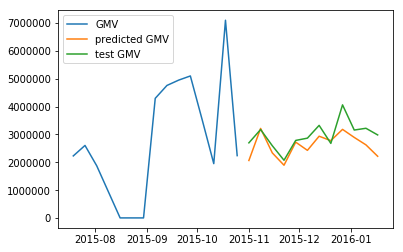

[469441.53698111314, 328435.57247091015]


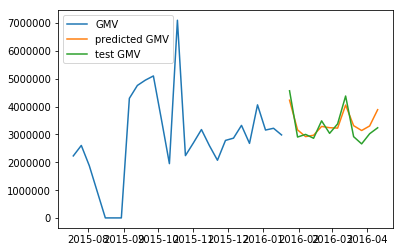

[469441.53698111314, 328435.57247091015, 278721.03326943354]


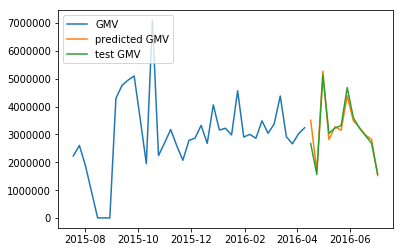

RMSE: 358866.047573819


In [872]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

tscv = TimeSeriesSplit(n_splits = 3)
rmse = []

for train_index, test_index in tscv.split(X):
    cv_train, cv_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    cv_train = sm.add_constant(cv_train)
    cv_test=sm.add_constant(cv_test, prepend=True, has_constant='add')
    model = sm.OLS(y_train,cv_train).fit()
    predictions = model.predict(cv_test)
    true_values = y_test.values
    rmse.append(sqrt(mean_squared_error(true_values, predictions)))
    print(rmse)
    plt.plot(y_train.index,y_train, '-', label="GMV")
    plt.plot(y_test.index,predictions,'-',label="predicted GMV")
    plt.plot(y_test.index, y_test,'-',label="test GMV")
    plt.legend(loc='upper left')
    plt.show()
print("RMSE: {}".format(np.mean(rmse)))

In [873]:
### Validation of Test data on model 
test_new=test[cols]
test_new=sm.add_constant(test_new, prepend=True, has_constant='add')
test_new

const  GamePad  GamingKeyboard  GamingAdapter_lag2  \
Week                                                             
2016-03-27  1.0    1089.0   109.0           70.0                 
2016-04-03  1.0    1073.0   104.0           75.0                 
2016-04-10  1.0    1121.0   157.0           83.0                 
2016-04-17  1.0    948.0    180.0           82.0                 
2016-04-24  1.0    524.0    79.0            69.0                 
2016-05-01  1.0    1893.0   174.0           86.0                 
2016-05-08  1.0    1103.0   100.0           28.0                 
2016-05-15  1.0    1108.0   106.0           112.0                
2016-05-22  1.0    1066.0   117.0           85.0                 
2016-05-29  1.0    1578.0   158.0           89.0                 
2016-06-05  1.0    1218.0   140.0           100.0                
2016-06-12  1.0    1111.0   155.0           84.0                 
2016-06-19  1.0    986.0    154.0           73.0                 
2016-06-26  1.0    903.0    133.0           67.0                 
2016-07-03  1.0    462.0    76.0            66.0                 

            GamingKeyboard_lag2  discount_per_lag2  GamingKeyboard_lag1  \
Week                                                                      
2016-03-27  178.0                41.355507          142.0                 
2016-04-03  142.0                34.342000          109.0                 
2016-04-10  109.0                35.971434          104.0                 
2016-04-17  104.0                35.814675          157.0                 
2016-04-24  157.0                35.544531          180.0                 
2016-05-01  180.0                36.484543          79.0                  
2016-05-08  79.0                 36.521895          174.0                 
2016-05-15  174.0                40.243112          100.0                 
2016-05-22  100.0                39.724821          106.0                 
2016-05-29  106.0                41.680743          117.0                 
2016-06-05  117.0                42.981234          158.0                 
2016-06-12  158.0                42.163858          140.0                 
2016-06-19  140.0                40.044931          155.0                 
2016-06-26  155.0                38.362604          154.0                 
2016-07-03  154.0                37.370186          133.0                 

            GamingChargingStation_lag2  
Week                                    
2016-03-27  1.0                         
2016-04-03  0.0                         
2016-04-10  1.0                         
2016-04-17  2.0                         
2016-04-24  0.0                         
2016-05-01  0.0                         
2016-05-08  0.0                         
2016-05-15  0.0                         
2016-05-22  0.0                         
2016-05-29  0.0                         
2016-06-05  0.0                         
2016-06-12  0.0                         
2016-06-19  0.0                         
2016-06-26  1.0                         
2016-07-03  0.0

In [874]:
y_pred=gaming_dm.predict(test_new)
test_lr_reg=test.copy()
test_lr_reg['predicted_gmv']=y_pred

In [875]:
test['ActualGMV']=test.gmv

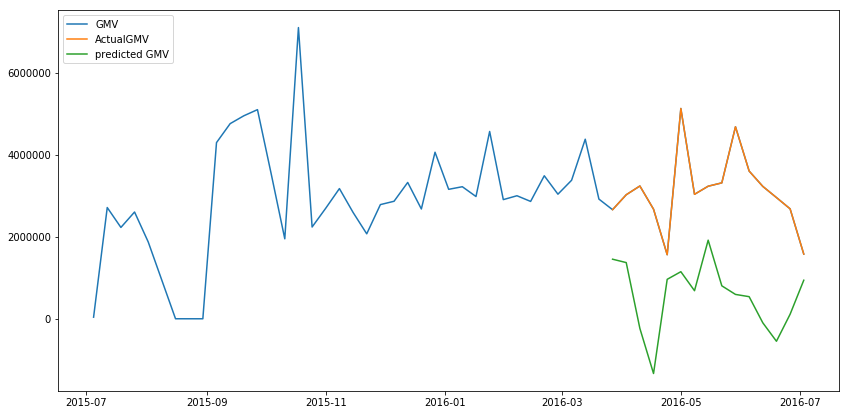

In [876]:
plt.figure(figsize=(14,7))
plt.plot(gaming_final.index,gaming_final.gmv, '-', label="GMV")
#plt.plot(test_new.index,test_lr_reg.predicted_gmv, '-',label="gmv predicted")
plt.plot(test.index, test.ActualGMV,'-',label="ActualGMV")
plt.plot(test.index,test_lr_reg.predicted_gmv,'-',label="predicted GMV")
#plt.plot(train.index, y_train_pred,'-',label="gmv_train_predicted")
plt.legend(loc='upper left')
plt.show()

In [877]:
from numpy import sqrt
from sklearn.metrics import mean_squared_error
camera_lr_reg_RMSE=sqrt(mean_squared_error(test.ActualGMV,test_lr_reg.predicted_gmv))
camera_lr_reg_RMSE

2809575.335797584

#### <div id=29></div>Model Summary
Model Adj-R2 : 0.958<br>
K-fold mean RMSE : 358866<br>
Test data RMSE : 2809575<br>
Features : GamePad,GamingKeyboard,GamingAdapter_lag2,GamingKeyboard_lag2,discount_per_lag2,GamingKeyboard_lag1,GamingChargingStation_lag2 are the significant features

### <div id=21></div>Model Building - Koyck Model

In [891]:
### Add 3 lags of the dependent variable
gaming_koyck=gaming_final.copy()
gaming_koyck['gmv_lag1']=gaming_koyck.gmv.shift(1)
gaming_koyck['gmv_lag2']=gaming_koyck.gmv.shift(2)
gaming_koyck['gmv_lag3']=gaming_koyck.gmv.shift(3)

In [892]:
gaming_koyck=gaming_koyck.dropna()

In [893]:
gaming_withoutGMV=gaming_koyck.copy()
gaming_withoutGMV=gaming_withoutGMV.drop('gmv',axis=1)

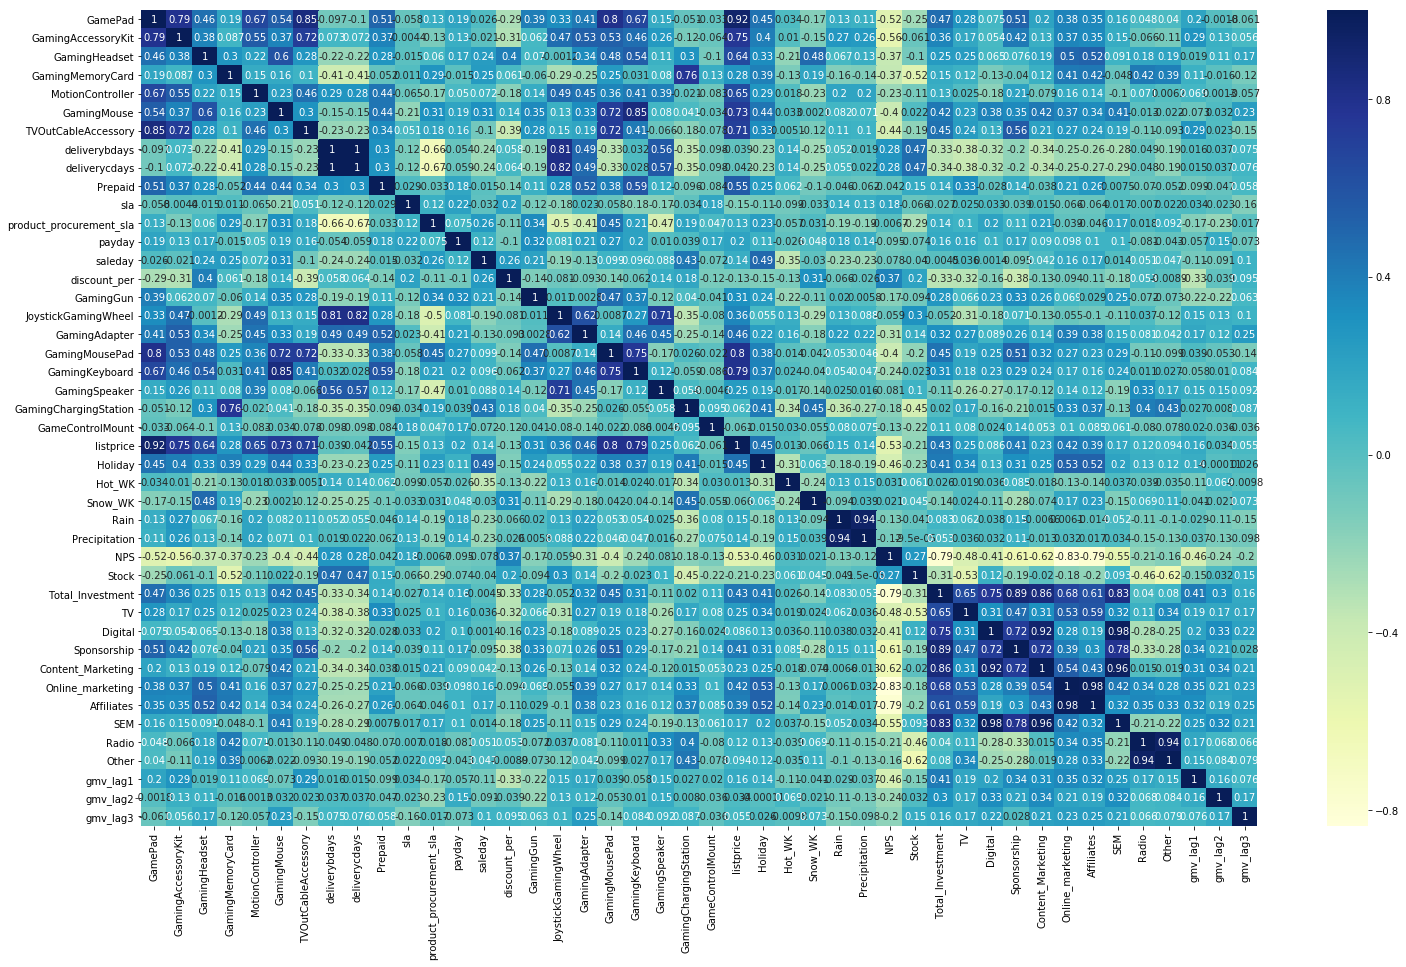

In [894]:
### Correlation Matrix
plt.figure(figsize = (25, 15))
sns.heatmap(gaming_withoutGMV.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [895]:
# Calculate the VIFs 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = gaming_withoutGMV.copy()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features           VIF
31  Total_Investment         3.302136e+09
34  Sponsorship              7.475354e+08
36  Online_marketing         1.406771e+08
38  SEM                      6.380417e+07
40  Other                    4.454814e+07
37  Affiliates               2.392927e+07
32  TV                       8.511424e+06
33  Digital                  4.917037e+06
35  Content_Marketing        6.681982e+05
39  Radio                    1.771240e+05
30  Stock                    7.484928e+04
29  NPS                      5.576730e+04
8   deliverycdays            4.080805e+04
7   deliverybdays            2.557826e+04
10  sla                      1.858702e+04
23  listprice                1.822315e+04
14  discount_per             1.606194e+04
11  product_procurement_sla  1.357640e+04
0   GamePad                  9.823660e+03
9   Prepaid                  3.940450e+03
2   GamingHeadset            2.675470e+03
19  GamingKeyboard           1.713480e+03
1   GamingAccessoryKit       1.592810e+03
6   TVOutCableAccessory      7.266300e+02
16  JoystickGamingWheel      6.286700e+02
18  GamingMousePad           5.152400e+02
17  GamingAdapter            4.817900e+02
24  Holiday                  3.819300e+02
5   GamingMouse              3.725700e+02
21  GamingChargingStation    1.827000e+02
27  Rain                     1.753900e+02
25  Hot_WK                   1.400300e+02
15  GamingGun                1.099000e+02
28  Precipitation            9.225000e+01
4   MotionController         7.877000e+01
41  gmv_lag1                 7.614000e+01
3   GamingMemoryCard         5.424000e+01
42  gmv_lag2                 4.745000e+01
26  Snow_WK                  4.464000e+01
43  gmv_lag3                 3.701000e+01
20  GamingSpeaker            2.712000e+01
12  payday                   1.746000e+01
13  saleday                  1.277000e+01
22  GameControlMount         5.910000e+00

In [896]:
#creating the train and validation set from orignial data set
gaming_koyck_final=gaming_koyck.copy()
train = gaming_koyck[:int(0.7*(len(gaming_koyck)))]
test = gaming_koyck[int(0.7*(len(gaming_koyck))):]

In [897]:
gaming_koyck.columns

Index(['GamePad', 'GamingAccessoryKit', 'GamingHeadset', 'GamingMemoryCard',
       'MotionController', 'GamingMouse', 'TVOutCableAccessory', 'gmv',
       'deliverybdays', 'deliverycdays', 'Prepaid', 'sla',
       'product_procurement_sla', 'payday', 'saleday', 'discount_per',
       'GamingGun', 'JoystickGamingWheel', 'GamingAdapter', 'GamingMousePad',
       'GamingKeyboard', 'GamingSpeaker', 'GamingChargingStation',
       'GameControlMount', 'listprice', 'Holiday', 'Hot_WK', 'Snow_WK', 'Rain',
       'Precipitation', 'NPS', 'Stock', 'Total_Investment', 'TV', 'Digital',
       'Sponsorship', 'Content_Marketing', 'Online_marketing', 'Affiliates',
       'SEM', 'Radio', 'Other', 'gmv_lag1', 'gmv_lag2', 'gmv_lag3'],
      dtype='object')

In [898]:
### Feature Scaling

cols_orig=['GamePad', 'GamingAccessoryKit', 'GamingHeadset', 'GamingMemoryCard',
       'MotionController', 'GamingMouse', 'TVOutCableAccessory', 'deliverybdays', 'deliverycdays', 'Prepaid', 'sla',
       'product_procurement_sla', 'payday', 'saleday', 'discount_per',
       'GamingGun', 'JoystickGamingWheel', 'GamingAdapter', 'GamingMousePad',
       'GamingKeyboard', 'GamingSpeaker', 'GamingChargingStation',
       'GameControlMount', 'listprice', 'Holiday', 'Hot_WK', 'Snow_WK', 'Rain',
       'Precipitation', 'NPS', 'Stock', 'Total_Investment', 'TV', 'Digital',
       'Sponsorship', 'Content_Marketing', 'Online_marketing', 'Affiliates',
       'SEM', 'Radio', 'Other', 'gmv_lag1', 'gmv_lag2', 'gmv_lag3']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train[cols_orig]= scaler.fit_transform(train[cols_orig])
train.head(4)

GamePad  GamingAccessoryKit  GamingHeadset  GamingMemoryCard  \
Week                                                                        
2015-07-26 -0.184964  0.362664           -1.218246      -0.870580           
2015-08-02 -0.901715 -0.822278           -0.986745      -1.045801           
2015-08-16 -2.314443 -2.812982           -1.737712      -1.108880           
2015-08-30 -2.308210 -2.812982           -1.735830      -1.108880           

            MotionController  GamingMouse  TVOutCableAccessory        gmv  \
Week                                                                        
2015-07-26  0.192647         -0.430641    -0.556091             2606716.5   
2015-08-02 -0.513725         -0.786273    -0.469530             1877540.0   
2015-08-16 -1.825560         -1.178098    -1.832872             4875.0      
2015-08-30 -1.825560         -1.178098    -1.832872             4606.0      

            deliverybdays  deliverycdays   Prepaid       sla  \
Week                                                           
2015-07-26 -0.193571      -0.193182      -0.358806 -1.409247   
2015-08-02 -0.178469      -0.178080      -0.922771  1.464509   
2015-08-16  5.650947       5.651263      -1.900310  2.466431   
2015-08-30 -0.193571      -0.193182      -1.902996  1.205945   

            product_procurement_sla    payday   saleday  discount_per  \
Week                                                                    
2015-07-26 -0.392918                -0.912871 -0.592116 -1.179888       
2015-08-02  1.849744                 1.095445 -0.592116  0.085229       
2015-08-16 -2.500250                -0.912871 -0.592116  3.297427       
2015-08-30  2.883946                -0.912871  1.082726  1.395005       

            GamingGun  JoystickGamingWheel  GamingAdapter  GamingMousePad  \
Week                                                                        
2015-07-26 -0.348367  -0.603969            -1.060395       0.079353         
2015-08-02 -0.348367  -0.141652            -1.161677      -0.552736         
2015-08-16 -0.348367  -1.425864            -2.174500      -1.591169         
2015-08-30 -0.348367  -1.425864            -2.174500      -1.591169         

            GamingKeyboard  GamingSpeaker  GamingChargingStation  \
Week                                                               
2015-07-26  0.879343       -0.850559      -0.744931                
2015-08-02 -0.462914       -0.705126      -0.744931                
2015-08-16 -1.549503       -0.850559      -0.744931                
2015-08-30 -1.549503       -0.850559      -0.744931                

            GameControlMount  listprice   Holiday  Hot_WK   Snow_WK      Rain  \
Week                                                                            
2015-07-26 -0.176777         -0.446785  -0.146385  0.254  -0.471405  0.565685   
2015-08-02 -0.176777         -0.768568  -1.756620  0.254  -0.471405  0.565685   
2015-08-16 -0.176777         -2.416053  -3.366855  0.254  -0.471405  0.565685   
2015-08-30 -0.176777         -2.423070  -0.146385  0.254  -0.471405 -1.767767   

            Precipitation       NPS     Stock  Total_Investment        TV  \
Week                                                                        
2015-07-26  0.518875       1.576369  0.492015 -1.506316         -1.860095   
2015-08-02  0.518875       1.970039  0.594342 -1.584297         -1.886703   
2015-08-16  0.518875       2.954216  0.850160 -1.779251         -1.953223   
2015-08-30 -1.927248       2.954216  0.850160 -1.779251         -1.953223   

             Digital  Sponsorship  Content_Marketing  Online_marketing  \
Week                                                                     
2015-07-26 -0.181168 -0.983303    -0.951757          -2.442527           
2015-08-02 -0.281020 -1.046827    -0.952024          -2.491123           
2015-08-16 -0.530647 -1.205637    -0.952693          -2.612615           
2015-08-30 -0.530647 -1.205637    -0.952693          -2.612615         

In [899]:
ranking=pd.DataFrame(list(zip(X.columns,rfe.support_,rfe.ranking_)),columns=('Feature','FistList','Rank'))
ranking. head(3)

Feature  FistList  Rank
0  GamePad             True      1   
1  GamingAccessoryKit  False     18  
2  GamingHeadset       False     8

In [900]:
ranking.loc[(ranking.Rank >= 2) & (ranking.Rank<=15)]

Feature  FistList  Rank
2   GamingHeadset            False     8   
4   MotionController         False     15  
6   TVOutCableAccessory      False     12  
7   deliverybdays            False     7   
9   Prepaid                  False     4   
11  product_procurement_sla  False     13  
15  GamingGun                False     11  
16  JoystickGamingWheel      False     14  
18  GamingMousePad           False     9   
19  GamingKeyboard           False     10  
30  Stock                    False     2   
31  Total_Investment         False     5

In [901]:
col_rfe

Index(['GamePad', 'GamingAccessoryKit', 'MotionController_lag2',
       'TVOutCableAccessory_lag2', 'payday', 'saleday_lag1', 'saleday_lag2',
       'discount_per_lag2', 'JoystickGamingWheel', 'GamingAdapter_lag2',
       'GamingMousePad_lag2', 'GamingKeyboard', 'GamingKeyboard_lag1',
       'GamingKeyboard_lag2', 'GamingChargingStation_lag2'],
      dtype='object')

In [904]:
# Calculate the VIFs 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = gaming_withoutGMV.copy()
X=X[cols_orig]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features           VIF
31  Total_Investment         3.302136e+09
34  Sponsorship              7.475354e+08
36  Online_marketing         1.406771e+08
38  SEM                      6.380417e+07
40  Other                    4.454814e+07
37  Affiliates               2.392927e+07
32  TV                       8.511424e+06
33  Digital                  4.917037e+06
35  Content_Marketing        6.681982e+05
39  Radio                    1.771240e+05
30  Stock                    7.484928e+04
29  NPS                      5.576730e+04
8   deliverycdays            4.080805e+04
7   deliverybdays            2.557826e+04
10  sla                      1.858702e+04
23  listprice                1.822315e+04
14  discount_per             1.606194e+04
11  product_procurement_sla  1.357640e+04
0   GamePad                  9.823660e+03
9   Prepaid                  3.940450e+03
2   GamingHeadset            2.675470e+03
19  GamingKeyboard           1.713480e+03
1   GamingAccessoryKit       1.592810e+03
6   TVOutCableAccessory      7.266300e+02
16  JoystickGamingWheel      6.286700e+02
18  GamingMousePad           5.152400e+02
17  GamingAdapter            4.817900e+02
24  Holiday                  3.819300e+02
5   GamingMouse              3.725700e+02
21  GamingChargingStation    1.827000e+02
27  Rain                     1.753900e+02
25  Hot_WK                   1.400300e+02
15  GamingGun                1.099000e+02
28  Precipitation            9.225000e+01
4   MotionController         7.877000e+01
41  gmv_lag1                 7.614000e+01
3   GamingMemoryCard         5.424000e+01
42  gmv_lag2                 4.745000e+01
26  Snow_WK                  4.464000e+01
43  gmv_lag3                 3.701000e+01
20  GamingSpeaker            2.712000e+01
12  payday                   1.746000e+01
13  saleday                  1.277000e+01
22  GameControlMount         5.910000e+00

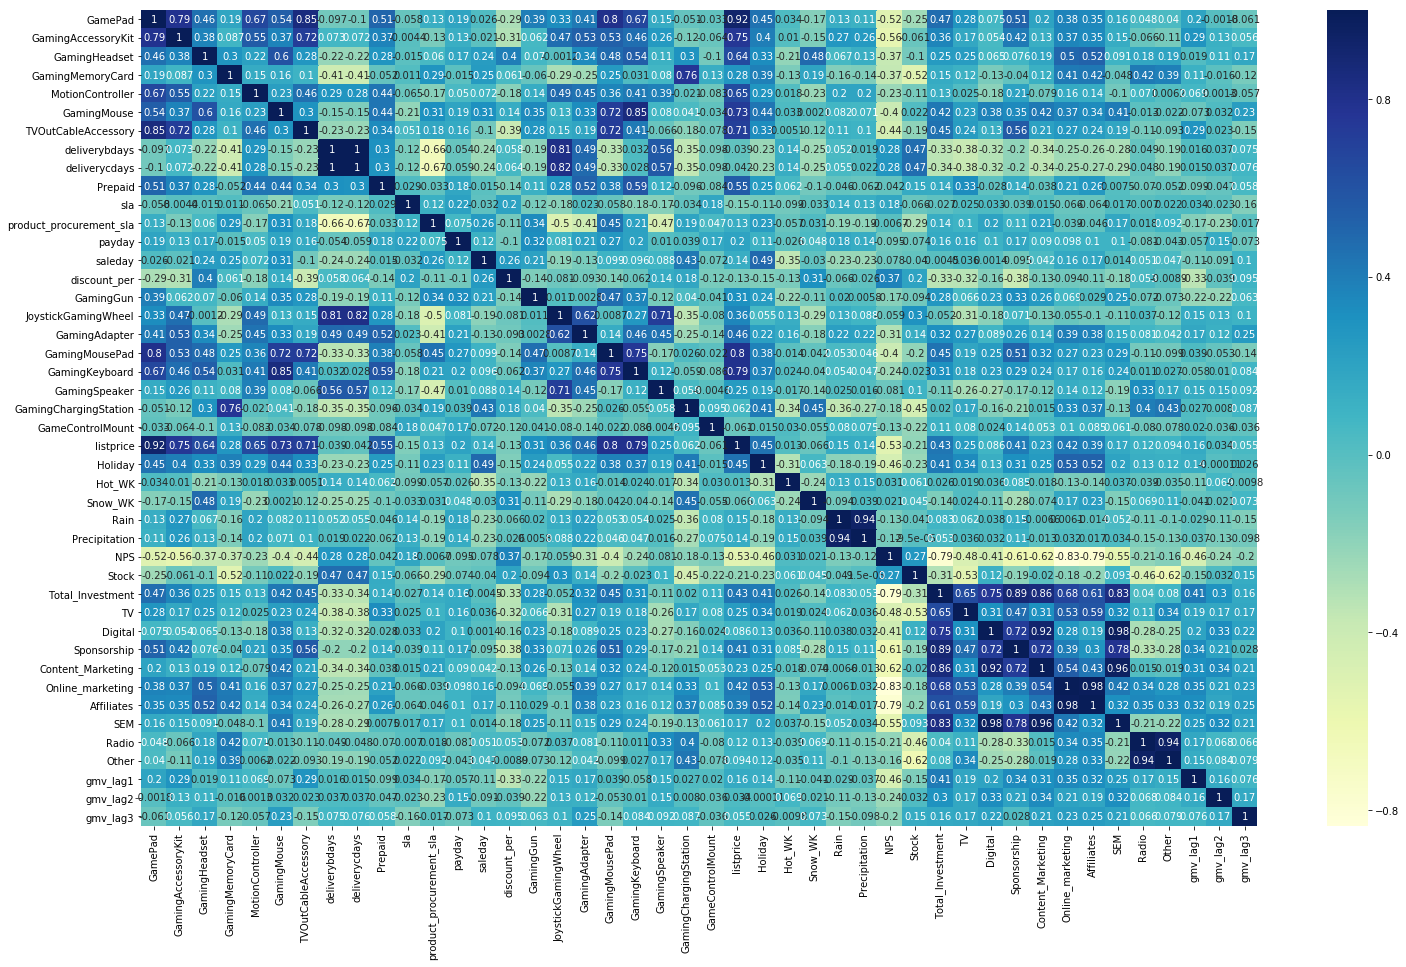

In [905]:
### Correlation Matrix
plt.figure(figsize = (25, 15))
sns.heatmap(X.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [906]:
## remove attributes with high multicolinearity 
col_rfe=['GamePad', 'GamingMemoryCard', 'deliverybdays', 
       'GamingKeyboard', 'GamingSpeaker', 'GamingChargingStation', 'listprice',
       'Holiday', 'NPS', 'TV', 'Digital', 'Online_marketing', 'Affiliates',
       'SEM']

vif = pd.DataFrame()
X = gaming_withoutGMV.copy()
X=X[col_rfe]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features      VIF
11  Online_marketing       1655.60
12  Affiliates             1483.12
13  SEM                    327.29 
10  Digital                202.42 
6   listprice              161.10 
0   GamePad                91.23  
7   Holiday                26.44  
3   GamingKeyboard         21.78  
8   NPS                    19.06  
9   TV                     12.12  
1   GamingMemoryCard       7.75   
5   GamingChargingStation  5.13   
2   deliverybdays          4.83   
4   GamingSpeaker          4.02

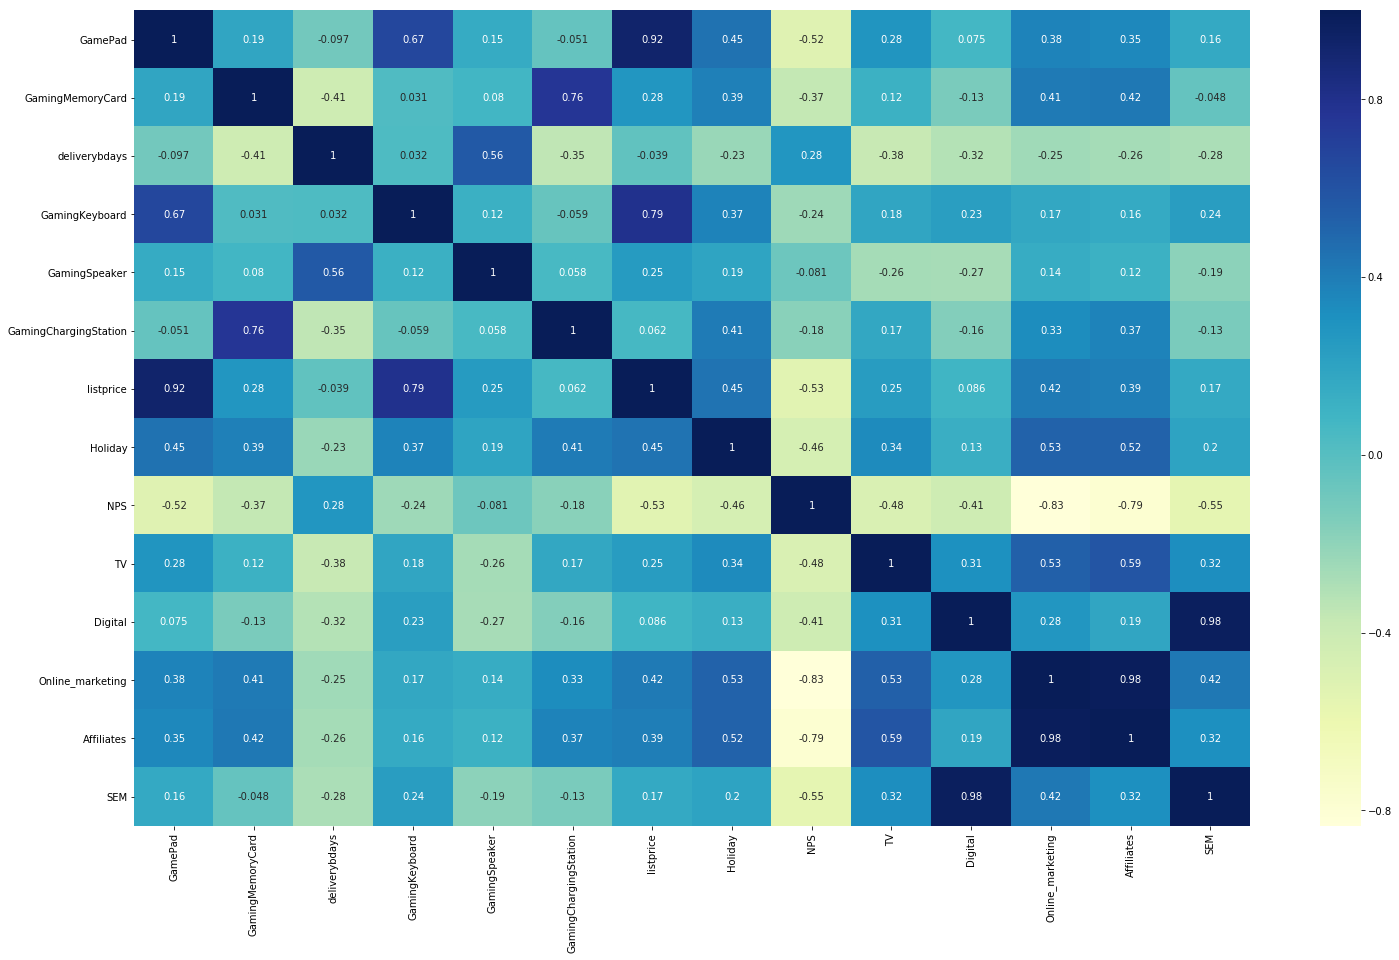

In [907]:
### Correlation Matrix
plt.figure(figsize = (25, 15))
sns.heatmap(X.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [908]:
## remove attributes with high multicolinearity 
col_rfe=['GamePad', 'GamingMemoryCard', 'deliverybdays', 
       'GamingKeyboard', 'GamingSpeaker', 'GamingChargingStation', 'listprice',
       'Holiday', 'NPS', 'TV', 'Digital',  'Affiliates',
       'SEM']

vif = pd.DataFrame()
X = gaming_withoutGMV.copy()
X=X[col_rfe]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
12  SEM                    164.43
6   listprice              160.14
10  Digital                129.10
0   GamePad                91.22 
11  Affiliates             35.42 
7   Holiday                26.42 
3   GamingKeyboard         21.58 
8   NPS                    18.70 
9   TV                     9.75  
1   GamingMemoryCard       7.51  
5   GamingChargingStation  5.01  
2   deliverybdays          4.56  
4   GamingSpeaker          3.71

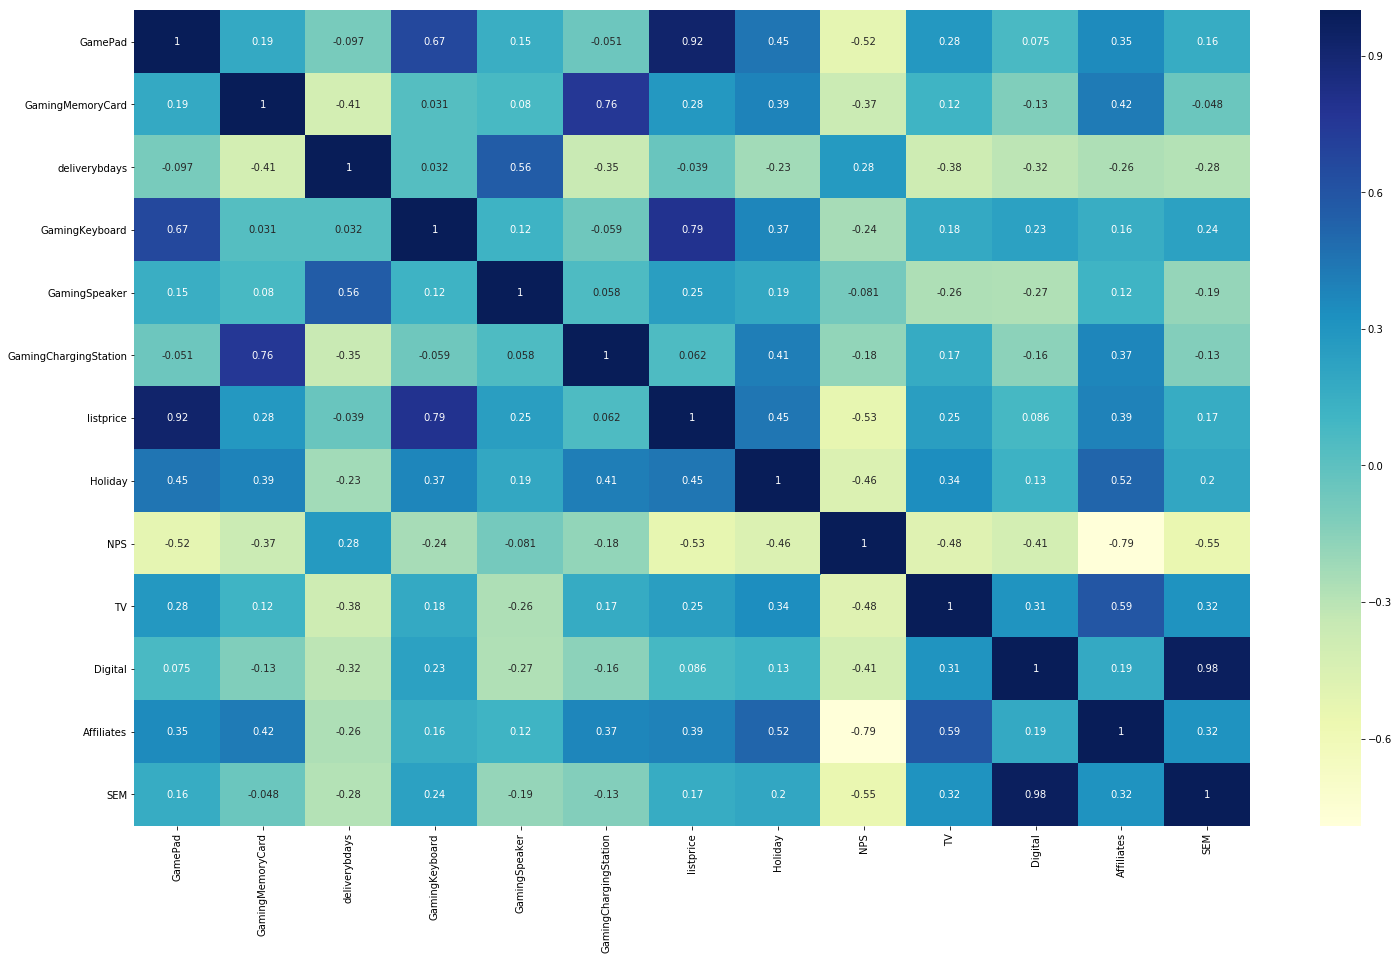

In [909]:
### Correlation Matrix
plt.figure(figsize = (25, 15))
sns.heatmap(X.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [910]:
## remove attributes with high multicolinearity 
col_rfe=['GamePad', 'GamingMemoryCard', 'deliverybdays', 
       'GamingKeyboard', 'GamingSpeaker', 'GamingChargingStation', 
       'Holiday', 'NPS', 'TV', 'Digital',  'Affiliates']

vif = pd.DataFrame()
X = gaming_withoutGMV.copy()
X=X[col_rfe]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
6   Holiday                23.20
0   GamePad                19.30
10  Affiliates             19.29
7   NPS                    13.70
3   GamingKeyboard         9.41 
8   TV                     8.12 
1   GamingMemoryCard       6.17 
5   GamingChargingStation  4.57 
2   deliverybdays          3.81 
4   GamingSpeaker          3.50 
9   Digital                2.48

In [911]:
### Build model using the features identified using VIF & Correlation  - manual & RFE  approach.

import statsmodels.api as sm
X=train[col_rfe]
X = sm.add_constant(X)
y=train['gmv']
gaming_koyck_m1 = sm.OLS(y,X).fit()
gaming_koyck_m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     83.50
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           8.91e-15
Time:                        22:31:31   Log-Likelihood:                -449.21
No. Observations:                  33   AIC:                             922.4
Df Residuals:                      21   BIC:                             940.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3.171e+06   4.31e+04     73.571      0.000    3.08e+06    3.26e+06
GamePad                8.136e+05   9.85e+04      8.260      0.000    6.09e+05    1.02e+06
GamingMemoryCard       2.349e+05    8.4e+04      2.796      0.011    6.02e+04     4.1e+05
deliverybdays          1.062e+04   5.93e+04      0.179      0.860   -1.13e+05    1.34e+05
GamingKeyboard         5.031e+05   7.59e+04      6.632      0.000    3.45e+05    6.61e+05
GamingSpeaker         -6.447e+04   6.31e+04     -1.021      0.319   -1.96e+05    6.68e+04
GamingChargingStation -3.183e+04   8.35e+04     -0.381      0.707   -2.06e+05    1.42e+05
Holiday                2.262e+04   7.15e+04      0.316      0.755   -1.26e+05    1.71e+05
NPS                    1.563e+05   1.62e+05      0.967      0.344    -1.8e+05    4.92e+05
TV                     5.203e+04   6.79e+04      0.766      0.452   -8.92e+04    1.93e+05
Digital               -1.078e+04   7.21e+04     -0.150      0.883   -1.61e+05    1.39e+05
Affiliates             2.586e+05   1.29e+05      2.011      0.057   -8872.423    5.26e+05
==============================================================================
Omnibus:                        7.060   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.029   Jarque-Bera (JB):                5.444
Skew:                          -0.875   Prob(JB):                       0.0657
Kurtosis:                       3.946   Cond. No.                         10.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [912]:
## removing features with high VIF & p-values
col_rfe=['GamePad', 'GamingMemoryCard', 'deliverybdays', 
       'GamingKeyboard', 'GamingSpeaker', 'GamingChargingStation', 
        'NPS', 'TV', 'Digital',  'Affiliates']


vif = pd.DataFrame()
X = gaming_withoutGMV.copy()
X=X[col_rfe]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
9  Affiliates             18.11
0  GamePad                18.07
6  NPS                    10.69
3  GamingKeyboard         9.28 
7  TV                     8.11 
1  GamingMemoryCard       6.14 
5  GamingChargingStation  4.20 
2  deliverybdays          3.75 
4  GamingSpeaker          3.36 
8  Digital                2.45

In [913]:
X=train[col_rfe]
X = sm.add_constant(X)
y=train['gmv']
gaming_koyck_m2 = sm.OLS(y,X).fit()
gaming_koyck_m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     95.76
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           9.21e-16
Time:                        22:31:32   Log-Likelihood:                -449.29
No. Observations:                  33   AIC:                             920.6
Df Residuals:                      22   BIC:                             937.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3.171e+06   4.22e+04     75.124      0.000    3.08e+06    3.26e+06
GamePad                8.158e+05   9.62e+04      8.477      0.000    6.16e+05    1.02e+06
GamingMemoryCard       2.348e+05   8.23e+04      2.854      0.009    6.42e+04    4.05e+05
deliverybdays          1913.3410   5.15e+04      0.037      0.971   -1.05e+05    1.09e+05
GamingKeyboard         5.073e+05   7.32e+04      6.935      0.000    3.56e+05    6.59e+05
GamingSpeaker         -6.438e+04   6.18e+04     -1.041      0.309   -1.93e+05    6.39e+04
GamingChargingStation -2.019e+04   7.34e+04     -0.275      0.786   -1.72e+05    1.32e+05
NPS                    1.502e+05   1.57e+05      0.956      0.349   -1.76e+05    4.76e+05
TV                     5.226e+04   6.65e+04      0.786      0.440   -8.56e+04     1.9e+05
Digital               -8444.3288   7.02e+04     -0.120      0.905   -1.54e+05    1.37e+05
Affiliates             2.537e+05   1.25e+05      2.029      0.055   -5621.932    5.13e+05
==============================================================================
Omnibus:                        7.437   Durbin-Watson:                   2.079
Prob(Omnibus):                  0.024   Jarque-Bera (JB):                5.845
Skew:                          -0.921   Prob(JB):                       0.0538
Kurtosis:                       3.925   Cond. No.                         9.75
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [914]:
col_rfe=['GamePad', 'GamingMemoryCard', 
       'GamingKeyboard', 'GamingSpeaker', 'GamingChargingStation', 
        'NPS', 'TV', 'Digital',  'Affiliates']


vif = pd.DataFrame()
X = gaming_withoutGMV.copy()
X=X[col_rfe]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
8  Affiliates             18.03
0  GamePad                17.50
2  GamingKeyboard         8.98 
5  NPS                    8.26 
6  TV                     8.03 
1  GamingMemoryCard       5.67 
4  GamingChargingStation  4.08 
7  Digital                2.24 
3  GamingSpeaker          2.21

In [915]:
X=train[col_rfe]
X = sm.add_constant(X)
y=train['gmv']
gaming_koyck_m3 = sm.OLS(y,X).fit()
gaming_koyck_m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     111.2
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           8.40e-17
Time:                        22:31:32   Log-Likelihood:                -449.29
No. Observations:                  33   AIC:                             918.6
Df Residuals:                      23   BIC:                             933.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3.171e+06   4.13e+04     76.810      0.000    3.09e+06    3.26e+06
GamePad                8.156e+05    9.4e+04      8.674      0.000    6.21e+05    1.01e+06
GamingMemoryCard       2.352e+05   7.98e+04      2.948      0.007    7.02e+04       4e+05
GamingKeyboard         5.071e+05   7.13e+04      7.109      0.000     3.6e+05    6.55e+05
GamingSpeaker         -6.446e+04   6.04e+04     -1.067      0.297   -1.89e+05    6.05e+04
GamingChargingStation -2.045e+04   7.15e+04     -0.286      0.777   -1.68e+05    1.27e+05
NPS                    1.514e+05    1.5e+05      1.008      0.324   -1.59e+05    4.62e+05
TV                     5.253e+04   6.46e+04      0.813      0.425   -8.11e+04    1.86e+05
Digital               -8130.5338   6.82e+04     -0.119      0.906   -1.49e+05    1.33e+05
Affiliates             2.537e+05   1.22e+05      2.074      0.049     695.711    5.07e+05
==============================================================================
Omnibus:                        7.441   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.024   Jarque-Bera (JB):                5.851
Skew:                          -0.923   Prob(JB):                       0.0536
Kurtosis:                       3.919   Cond. No.                         9.26
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [916]:
col_rfe=['GamePad', 'GamingMemoryCard',  
       'GamingKeyboard', 'GamingSpeaker', 'GamingChargingStation', 
         'TV', 'Digital',  'Affiliates']

vif = pd.DataFrame()
X = gaming_withoutGMV.copy()
X=X[col_rfe]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0  GamePad                16.44
7  Affiliates             15.90
2  GamingKeyboard         8.87 
5  TV                     8.03 
1  GamingMemoryCard       5.60 
4  GamingChargingStation  4.05 
6  Digital                2.24 
3  GamingSpeaker          2.20

In [917]:
X=train[col_rfe]
X = sm.add_constant(X)
y=train['gmv']
gaming_koyck_m4 = sm.OLS(y,X).fit()
gaming_koyck_m4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     124.9
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.18e-17
Time:                        22:31:32   Log-Likelihood:                -450.01
No. Observations:                  33   AIC:                             918.0
Df Residuals:                      24   BIC:                             931.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3.171e+06   4.13e+04     76.784      0.000    3.09e+06    3.26e+06
GamePad                 7.54e+05   7.15e+04     10.549      0.000    6.06e+05    9.01e+05
GamingMemoryCard       2.128e+05   7.66e+04      2.776      0.010    5.46e+04    3.71e+05
GamingKeyboard         5.401e+05   6.34e+04      8.522      0.000    4.09e+05    6.71e+05
GamingSpeaker         -5.793e+04   6.01e+04     -0.964      0.345   -1.82e+05    6.61e+04
GamingChargingStation -5717.4526      7e+04     -0.082      0.936    -1.5e+05    1.39e+05
TV                     4.284e+04   6.39e+04      0.670      0.509   -8.91e+04    1.75e+05
Digital               -5.255e+04   5.21e+04     -1.009      0.323    -1.6e+05    5.49e+04
Affiliates             1.533e+05   7.11e+04      2.158      0.041    6653.130       3e+05
==============================================================================
Omnibus:                        6.340   Durbin-Watson:                   2.116
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                4.932
Skew:                          -0.910   Prob(JB):                       0.0849
Kurtosis:                       3.526   Cond. No.                         4.58
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [918]:
col_rfe=['GamePad', 'GamingMemoryCard',  
       'GamingKeyboard', 'GamingSpeaker', 'GamingChargingStation', 
         'Digital',  'Affiliates']

vif = pd.DataFrame()
X = gaming_withoutGMV.copy()
X=X[col_rfe]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0  GamePad                15.99
6  Affiliates             10.09
2  GamingKeyboard         8.87 
1  GamingMemoryCard       5.26 
4  GamingChargingStation  3.91 
5  Digital                2.21 
3  GamingSpeaker          1.85

In [919]:
X=train[col_rfe]
X = sm.add_constant(X)
y=train['gmv']
gaming_koyck_m5 = sm.OLS(y,X).fit()
gaming_koyck_m5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     145.9
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.16e-18
Time:                        22:31:32   Log-Likelihood:                -450.31
No. Observations:                  33   AIC:                             916.6
Df Residuals:                      25   BIC:                             928.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3.171e+06   4.08e+04     77.644      0.000    3.09e+06    3.26e+06
GamePad                7.661e+05   6.84e+04     11.206      0.000    6.25e+05    9.07e+05
GamingMemoryCard       1.967e+05    7.2e+04      2.732      0.011    4.84e+04    3.45e+05
GamingKeyboard         5.365e+05   6.24e+04      8.592      0.000    4.08e+05    6.65e+05
GamingSpeaker           -5.2e+04   5.88e+04     -0.885      0.385   -1.73e+05    6.91e+04
GamingChargingStation -3746.0584   6.91e+04     -0.054      0.957   -1.46e+05    1.39e+05
Digital               -4.673e+04   5.08e+04     -0.920      0.366   -1.51e+05    5.78e+04
Affiliates             1.819e+05   5.62e+04      3.235      0.003    6.61e+04    2.98e+05
==============================================================================
Omnibus:                        5.871   Durbin-Watson:                   2.153
Prob(Omnibus):                  0.053   Jarque-Bera (JB):                4.301
Skew:                          -0.810   Prob(JB):                        0.116
Kurtosis:                       3.712   Cond. No.                         4.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [920]:
col_rfe=['GamePad', 'GamingMemoryCard',  
       'GamingKeyboard', 'GamingSpeaker', 'Digital',  'Affiliates']

vif = pd.DataFrame()
X = gaming_withoutGMV.copy()
X=X[col_rfe]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0  GamePad           13.95
5  Affiliates        9.12 
2  GamingKeyboard    8.62 
1  GamingMemoryCard  2.44 
4  Digital           2.16 
3  GamingSpeaker     1.85

In [921]:
X=train[col_rfe]
X = sm.add_constant(X)
y=train['gmv']
gaming_koyck_m6 = sm.OLS(y,X).fit()
gaming_koyck_m6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     177.0
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           8.31e-20
Time:                        22:31:32   Log-Likelihood:                -450.32
No. Observations:                  33   AIC:                             914.6
Df Residuals:                      26   BIC:                             925.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3.171e+06   4.01e+04     79.177      0.000    3.09e+06    3.25e+06
GamePad           7.675e+05   6.25e+04     12.281      0.000    6.39e+05    8.96e+05
GamingMemoryCard  1.944e+05    5.7e+04      3.413      0.002    7.73e+04    3.12e+05
GamingKeyboard    5.358e+05      6e+04      8.923      0.000    4.12e+05    6.59e+05
GamingSpeaker    -5.236e+04   5.73e+04     -0.914      0.369    -1.7e+05    6.54e+04
Digital          -4.618e+04   4.88e+04     -0.947      0.353   -1.46e+05    5.41e+04
Affiliates        1.812e+05   5.37e+04      3.373      0.002    7.08e+04    2.92e+05
==============================================================================
Omnibus:                        5.983   Durbin-Watson:                   2.159
Prob(Omnibus):                  0.050   Jarque-Bera (JB):                4.406
Skew:                          -0.818   Prob(JB):                        0.110
Kurtosis:                       3.725   Cond. No.                         3.37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [922]:
col_rfe=['GamePad', 'GamingMemoryCard',  
       'GamingKeyboard', 'Digital',  'Affiliates']

vif = pd.DataFrame()
X = gaming_withoutGMV.copy()
X=X[col_rfe]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0  GamePad           13.93
4  Affiliates        8.62 
2  GamingKeyboard    8.46 
1  GamingMemoryCard  2.44 
3  Digital           1.94

In [923]:
X=train[col_rfe]
X = sm.add_constant(X)
y=train['gmv']
gaming_koyck_m7 = sm.OLS(y,X).fit()
gaming_koyck_m7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     213.6
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           8.06e-21
Time:                        22:31:32   Log-Likelihood:                -450.84
No. Observations:                  33   AIC:                             913.7
Df Residuals:                      27   BIC:                             922.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3.171e+06   3.99e+04     79.420      0.000    3.09e+06    3.25e+06
GamePad            7.88e+05   5.81e+04     13.560      0.000    6.69e+05    9.07e+05
GamingMemoryCard  1.694e+05   4.98e+04      3.402      0.002    6.72e+04    2.72e+05
GamingKeyboard    5.213e+05   5.77e+04      9.031      0.000    4.03e+05     6.4e+05
Digital          -3.524e+04   4.72e+04     -0.747      0.461   -1.32e+05    6.15e+04
Affiliates        1.642e+05   5.03e+04      3.267      0.003    6.11e+04    2.67e+05
==============================================================================
Omnibus:                        6.210   Durbin-Watson:                   2.144
Prob(Omnibus):                  0.045   Jarque-Bera (JB):                4.688
Skew:                          -0.865   Prob(JB):                       0.0959
Kurtosis:                       3.646   Cond. No.                         2.82
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [924]:
col_rfe=['GamePad', 'GamingMemoryCard',  
       'GamingKeyboard', 'Affiliates']

vif = pd.DataFrame()
X = gaming_withoutGMV.copy()
X=X[col_rfe]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0  GamePad           13.61
2  GamingKeyboard    7.89 
3  Affiliates        7.57 
1  GamingMemoryCard  2.32

In [925]:
X=train[col_rfe]
X = sm.add_constant(X)
y=train['gmv']
gaming_koyck_m8 = sm.OLS(y,X).fit()
gaming_koyck_m8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     271.1
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           6.01e-22
Time:                        22:31:33   Log-Likelihood:                -451.17
No. Observations:                  33   AIC:                             912.3
Df Residuals:                      28   BIC:                             919.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3.171e+06   3.96e+04     80.054      0.000    3.09e+06    3.25e+06
GamePad            7.96e+05   5.67e+04     14.043      0.000     6.8e+05    9.12e+05
GamingMemoryCard   1.85e+05   4.48e+04      4.129      0.000    9.32e+04    2.77e+05
GamingKeyboard    5.082e+05   5.46e+04      9.312      0.000    3.96e+05     6.2e+05
Affiliates        1.506e+05   4.65e+04      3.241      0.003    5.54e+04    2.46e+05
==============================================================================
Omnibus:                        4.594   Durbin-Watson:                   2.107
Prob(Omnibus):                  0.101   Jarque-Bera (JB):                3.262
Skew:                          -0.740   Prob(JB):                        0.196
Kurtosis:                       3.429   Cond. No.                         2.57
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

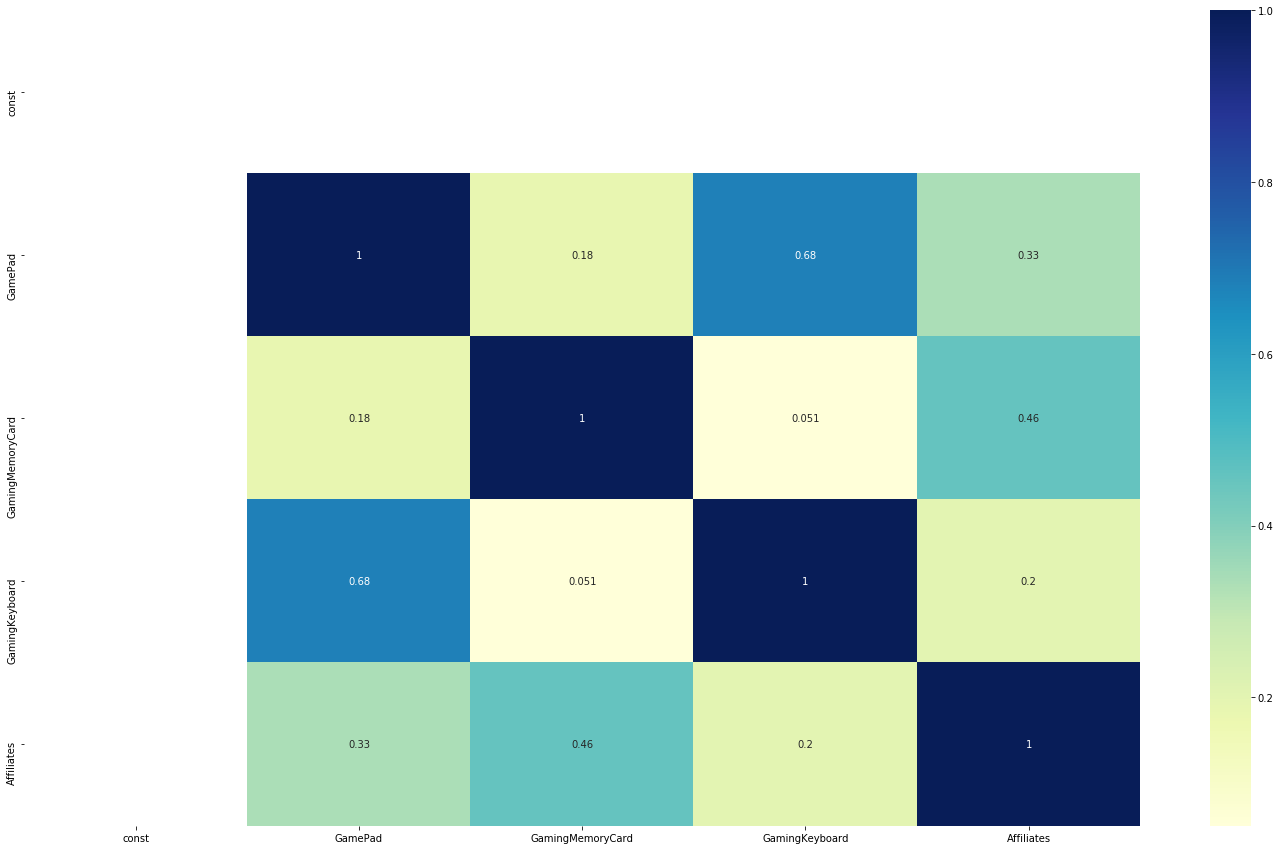

In [926]:
plt.figure(figsize = (25, 15))
sns.heatmap(X.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [927]:
col_rfe_t=['GamingKeyboard', 'GamePad',  'Affiliates','GamingMemoryCard','gmv_lag1']
    ### Adding lag variable to check the impact    

vif = pd.DataFrame()
X = gaming_withoutGMV.copy()
X=X[col_rfe_t]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
1  GamePad           15.41
2  Affiliates        10.60
0  GamingKeyboard    8.09 
4  gmv_lag1          7.35 
3  GamingMemoryCard  2.34

In [928]:
X=train[col_rfe_t]
X = sm.add_constant(X)
y=train['gmv']
gaming_koyck_m9 = sm.OLS(y,X).fit()
gaming_koyck_m9.summary()

#### Lag is an insignificant feature. 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     210.8
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           9.55e-21
Time:                        22:31:34   Log-Likelihood:                -451.04
No. Observations:                  33   AIC:                             914.1
Df Residuals:                      27   BIC:                             923.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3.171e+06   4.02e+04     78.923      0.000    3.09e+06    3.25e+06
GamingKeyboard    5.175e+05   5.89e+04      8.783      0.000    3.97e+05    6.38e+05
GamePad           7.865e+05    6.1e+04     12.886      0.000    6.61e+05    9.12e+05
Affiliates        1.421e+05   5.06e+04      2.807      0.009    3.82e+04    2.46e+05
GamingMemoryCard  1.873e+05   4.57e+04      4.096      0.000    9.35e+04    2.81e+05
gmv_lag1          2.188e+04   4.73e+04      0.463      0.647   -7.51e+04    1.19e+05
==============================================================================
Omnibus:                        2.855   Durbin-Watson:                   2.115
Prob(Omnibus):                  0.240   Jarque-Bera (JB):                2.186
Skew:                          -0.630   Prob(JB):                        0.335
Kurtosis:                       2.966   Cond. No.                         2.96
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### observation : Lag values are insignificant. Koyck model is not suitable for this data set . 

In [929]:
#creating the train and validation set from orignial data set
### Validation using timeseris split for mean RMSE. 

X = gaming_koyck_final.copy()
X=X[col_rfe]
y=gaming_koyck_final['gmv']

[339424.54768460686]


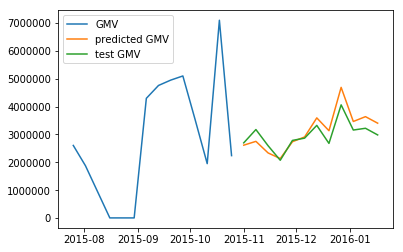

[339424.54768460686, 211296.3319423494]


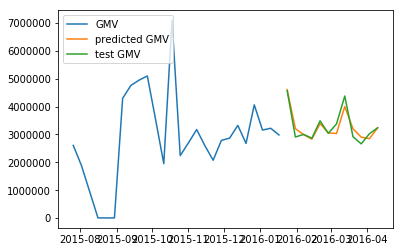

[339424.54768460686, 211296.3319423494, 323656.0952350426]


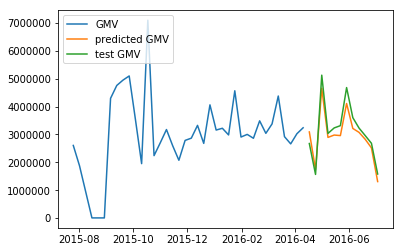

RMSE: 291458.9916206663


In [930]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

tscv = TimeSeriesSplit(n_splits = 3)
rmse = []

for train_index, test_index in tscv.split(X):
    cv_train, cv_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    scaler_new=StandardScaler()
    cv_train[col_rfe]=scaler_new.fit_transform(cv_train[col_rfe])
    cv_test[col_rfe]=scaler_new.transform(cv_test[col_rfe])
    #print(cv_train)
    cv_train = sm.add_constant(cv_train)
    cv_test=sm.add_constant(cv_test, prepend=True, has_constant='add')
    
    model = sm.OLS(y_train,cv_train).fit()
    predictions = model.predict(cv_test)
    true_values = y_test.values
    rmse.append(sqrt(mean_squared_error(true_values, predictions)))
    print(rmse)
    plt.plot(y_train.index,y_train, '-', label="GMV")
    plt.plot(y_test.index,predictions,'-',label="predicted GMV")
    plt.plot(y_test.index, y_test,'-',label="test GMV")
    plt.legend(loc='upper left')
    plt.show()
print("RMSE: {}".format(np.mean(rmse)))

In [931]:
### Test validation by fitting into the model 
test[cols_orig] = scaler.transform(test[cols_orig])
test_new=test[col_rfe]
test_new=sm.add_constant(test_new, prepend=True, has_constant='add')
test_new

const   GamePad  GamingMemoryCard  GamingKeyboard  Affiliates
Week                                                                     
2016-03-27  1.0   -0.058234 -0.779466         -0.156112        0.172755  
2016-04-03  1.0   -0.091475 -0.723395         -0.220029        0.106820  
2016-04-10  1.0    0.008247 -0.807501          0.457491        0.018907  
2016-04-17  1.0   -0.351167 -0.961695          0.751509        0.018907  
2016-04-24  1.0   -1.232044 -0.933660         -0.539614        0.018907  
2016-05-01  1.0    1.612108 -0.772457          0.674808        0.079156  
2016-05-08  1.0   -0.029149 -0.933660         -0.271163        0.440645  
2016-05-15  1.0   -0.018761 -0.737413         -0.194463        0.440645  
2016-05-22  1.0   -0.106018 -0.849554         -0.053845        0.440645  
2016-05-29  1.0    0.957683 -0.646298          0.470274        0.440645  
2016-06-05  1.0    0.209769 -0.597236          0.240173       -0.853914  
2016-06-12  1.0   -0.012528 -0.520139          0.431924       -1.371737  
2016-06-19  1.0   -0.272221 -0.716386          0.419141       -1.371737  
2016-06-26  1.0   -0.444657 -0.891607          0.150689       -1.371737  
2016-07-03  1.0   -1.360852 -1.031783         -0.577965       -1.935659

In [932]:
y_pred=gaming_koyck_m8.predict(test_new)
test_lr_reg=test.copy()
test_lr_reg['predicted_gmv']=y_pred

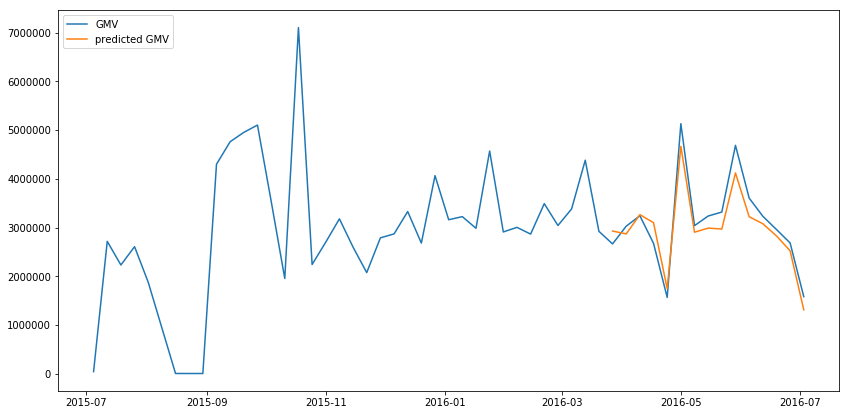

In [933]:
plt.figure(figsize=(14,7))
plt.plot(gaming_final.index,gaming_final.gmv, '-', label="GMV")
plt.plot(test.index,test_lr_reg.predicted_gmv,'-',label="predicted GMV")
#plt.plot(train.index, y_train_pred,'-',label="gmv_train_predicted")
plt.legend(loc='upper left')
plt.show()

In [934]:
from numpy import sqrt
from sklearn.metrics import mean_squared_error
camera_lr_reg_RMSE=sqrt(mean_squared_error(test.gmv,test_lr_reg.predicted_gmv))
camera_lr_reg_RMSE

297667.4950668774

#### <div id=22></div>Model Summary
Model Adj-R2 :0.971<br>
K fold Mean RMSE :291458<br>
TEST RMSE : 297667<br>
But model is not suitable for the purpose as lag is not significant. 

### <div id=23></div>Model Buidling - Multiplicative-Lag Model

In [935]:
### Log transformation 
gaming_log=gaming_final.copy()
cols_orig=['GamePad','GamingAccessoryKit','GamingHeadset','GamingMemoryCard','MotionController','GamingMouse','TVOutCableAccessory','deliverybdays','deliverycdays','Prepaid','sla','product_procurement_sla','payday','saleday','discount_per','GamingGun','JoystickGamingWheel','GamingAdapter','GamingMousePad','GamingKeyboard','GamingSpeaker','GamingChargingStation','GameControlMount','listprice','Holiday','Hot_WK','Snow_WK','Rain','Precipitation','NPS','Stock','Total_Investment','TV','Digital','Sponsorship','Content_Marketing','Online_marketing','Affiliates','SEM','Radio','Other']
gaming_log=gaming_log.apply(lambda x : [abs(i)+0.0001 if i <= 0 else i for i in x])
gaming_log

GamePad  GamingAccessoryKit  GamingHeadset  GamingMemoryCard  \
Week                                                                       
2015-07-05  17.0     4.0000              4.0            0.0001             
2015-07-12  933.0    82.0000             174.0          37.0000            
2015-07-19  1045.0   96.0000             186.0          37.0000            
2015-07-26  1028.0   134.0000            277.0          34.0000            
2015-08-02  683.0    84.0000             400.0          9.0000             
2015-08-16  3.0      0.0001              1.0            0.0001             
2015-08-30  6.0      0.0001              2.0            0.0001             
2015-09-06  2020.0   116.0000            674.0          34.0000            
2015-09-13  1844.0   182.0000            744.0          266.0000           
2015-09-20  2025.0   156.0000            768.0          200.0000           
2015-09-27  2106.0   230.0000            1138.0         110.0000           
2015-10-04  1459.0   132.0000            666.0          46.0000            
2015-10-11  853.0    106.0000            234.0          39.0000            
2015-10-18  1996.0   170.0000            2109.0         90.0000            
2015-10-25  863.0    104.0000            496.0          61.0000            
2015-11-01  950.0    131.0000            1011.0         42.0000            
2015-11-08  1060.0   146.0000            794.0          43.0000            
2015-11-15  902.0    146.0000            959.0          58.0000            
2015-11-22  751.0    132.0000            692.0          85.0000            
2015-11-29  1018.0   124.0000            953.0          105.0000           
2015-12-06  946.0    134.0000            1050.0         214.0000           
2015-12-13  1159.0   153.0000            866.0          237.0000           
2015-12-20  1006.0   104.0000            509.0          243.0000           
2015-12-27  1272.0   141.0000            918.0          600.0000           
2016-01-03  1093.0   125.0000            740.0          272.0000           
2016-01-10  1059.0   103.0000            843.0          323.0000           
2016-01-17  843.0    103.0000            1051.0         366.0000           
2016-01-24  1485.0   115.0000            1490.0         463.0000           
2016-01-31  988.0    81.0000             746.0          274.0000           
2016-02-07  927.0    108.0000            1052.0         248.0000           
2016-02-14  887.0    103.0000            1425.0         180.0000           
2016-02-21  970.0    91.0000             1669.0         297.0000           
2016-02-28  975.0    116.0000            1942.0         141.0000           
2016-03-06  1040.0   93.0000             2043.0         64.0000            
2016-03-13  1500.0   115.0000            1735.0         32.0000            
2016-03-20  1145.0   139.0000            504.0          45.0000            
2016-03-27  1089.0   128.0000            478.0          47.0000            
2016-04-03  1073.0   123.0000            566.0          55.0000            
2016-04-10  1121.0   131.0000            553.0          43.0000            
2016-04-17  948.0    77.0000             409.0          21.0000            
2016-04-24  524.0    42.0000             236.0          25.0000            
2016-05-01  1893.0   227.0000            1317.0         48.0000            
2016-05-08  1103.0   145.0000            745.0          25.0000            
2016-05-15  1108.0   146.0000            1003.0         53.0000            
2016-05-22  1066.0   151.0000            1105.0         37.0000            
2016-05-29  1578.0   149.0000            1012.0         66.0000            
2016-06-05  1218.0   160.0000            801.0          73.0000            
2016-06-12  1111.0   146.0000            648.0          84.0000            
2016-06-19  986.0    142.0000            622.0          56.0000            
2016-06-26  903.0    120.0000            615.0          31.0000            
2016-07-03  462.0    79.0000             355.0          11.0

In [936]:
gaming_log=gaming_log.apply(lambda x : [abs(i)+0.0001 if i <= 0 else i for i in x])
gaming_log

GamePad  GamingAccessoryKit  GamingHeadset  GamingMemoryCard  \
Week                                                                       
2015-07-05  17.0     4.0000              4.0            0.0001             
2015-07-12  933.0    82.0000             174.0          37.0000            
2015-07-19  1045.0   96.0000             186.0          37.0000            
2015-07-26  1028.0   134.0000            277.0          34.0000            
2015-08-02  683.0    84.0000             400.0          9.0000             
2015-08-16  3.0      0.0001              1.0            0.0001             
2015-08-30  6.0      0.0001              2.0            0.0001             
2015-09-06  2020.0   116.0000            674.0          34.0000            
2015-09-13  1844.0   182.0000            744.0          266.0000           
2015-09-20  2025.0   156.0000            768.0          200.0000           
2015-09-27  2106.0   230.0000            1138.0         110.0000           
2015-10-04  1459.0   132.0000            666.0          46.0000            
2015-10-11  853.0    106.0000            234.0          39.0000            
2015-10-18  1996.0   170.0000            2109.0         90.0000            
2015-10-25  863.0    104.0000            496.0          61.0000            
2015-11-01  950.0    131.0000            1011.0         42.0000            
2015-11-08  1060.0   146.0000            794.0          43.0000            
2015-11-15  902.0    146.0000            959.0          58.0000            
2015-11-22  751.0    132.0000            692.0          85.0000            
2015-11-29  1018.0   124.0000            953.0          105.0000           
2015-12-06  946.0    134.0000            1050.0         214.0000           
2015-12-13  1159.0   153.0000            866.0          237.0000           
2015-12-20  1006.0   104.0000            509.0          243.0000           
2015-12-27  1272.0   141.0000            918.0          600.0000           
2016-01-03  1093.0   125.0000            740.0          272.0000           
2016-01-10  1059.0   103.0000            843.0          323.0000           
2016-01-17  843.0    103.0000            1051.0         366.0000           
2016-01-24  1485.0   115.0000            1490.0         463.0000           
2016-01-31  988.0    81.0000             746.0          274.0000           
2016-02-07  927.0    108.0000            1052.0         248.0000           
2016-02-14  887.0    103.0000            1425.0         180.0000           
2016-02-21  970.0    91.0000             1669.0         297.0000           
2016-02-28  975.0    116.0000            1942.0         141.0000           
2016-03-06  1040.0   93.0000             2043.0         64.0000            
2016-03-13  1500.0   115.0000            1735.0         32.0000            
2016-03-20  1145.0   139.0000            504.0          45.0000            
2016-03-27  1089.0   128.0000            478.0          47.0000            
2016-04-03  1073.0   123.0000            566.0          55.0000            
2016-04-10  1121.0   131.0000            553.0          43.0000            
2016-04-17  948.0    77.0000             409.0          21.0000            
2016-04-24  524.0    42.0000             236.0          25.0000            
2016-05-01  1893.0   227.0000            1317.0         48.0000            
2016-05-08  1103.0   145.0000            745.0          25.0000            
2016-05-15  1108.0   146.0000            1003.0         53.0000            
2016-05-22  1066.0   151.0000            1105.0         37.0000            
2016-05-29  1578.0   149.0000            1012.0         66.0000            
2016-06-05  1218.0   160.0000            801.0          73.0000            
2016-06-12  1111.0   146.0000            648.0          84.0000            
2016-06-19  986.0    142.0000            622.0          56.0000            
2016-06-26  903.0    120.0000            615.0          31.0000            
2016-07-03  462.0    79.0000             355.0          11.0

In [937]:
gaming_log=gaming_log.apply(lambda X: np.log(X) , axis=1)
gaming_log

GamePad  GamingAccessoryKit  GamingHeadset  GamingMemoryCard  \
Week                                                                        
2015-07-05  2.833213  1.386294            1.386294      -9.210340           
2015-07-12  6.838405  4.406719            5.159055       3.610918           
2015-07-19  6.951772  4.564348            5.225747       3.610918           
2015-07-26  6.935370  4.897840            5.624018       3.526361           
2015-08-02  6.526495  4.430817            5.991465       2.197225           
2015-08-16  1.098612 -9.210340            0.000000      -9.210340           
2015-08-30  1.791759 -9.210340            0.693147      -9.210340           
2015-09-06  7.610853  4.753590            6.513230       3.526361           
2015-09-13  7.519692  5.204007            6.612041       5.583496           
2015-09-20  7.613325  5.049856            6.643790       5.298317           
2015-09-27  7.652546  5.438079            7.037028       4.700480           
2015-10-04  7.285507  4.882802            6.501290       3.828641           
2015-10-11  6.748760  4.663439            5.455321       3.663562           
2015-10-18  7.598900  5.135798            7.653969       4.499810           
2015-10-25  6.760415  4.644391            6.206576       4.110874           
2015-11-01  6.856462  4.875197            6.918695       3.737670           
2015-11-08  6.966024  4.983607            6.677083       3.761200           
2015-11-15  6.804615  4.983607            6.865891       4.060443           
2015-11-22  6.621406  4.882802            6.539586       4.442651           
2015-11-29  6.925595  4.820282            6.859615       4.653960           
2015-12-06  6.852243  4.897840            6.956545       5.365976           
2015-12-13  7.055313  5.030438            6.763885       5.468060           
2015-12-20  6.913737  4.644391            6.232448       5.493061           
2015-12-27  7.148346  4.948760            6.822197       6.396930           
2016-01-03  6.996681  4.828314            6.606650       5.605802           
2016-01-10  6.965080  4.634729            6.736967       5.777652           
2016-01-17  6.736967  4.634729            6.957497       5.902633           
2016-01-24  7.303170  4.744932            7.306531       6.137727           
2016-01-31  6.895683  4.394449            6.614726       5.613128           
2016-02-07  6.831954  4.682131            6.958448       5.513429           
2016-02-14  6.787845  4.634729            7.261927       5.192957           
2016-02-21  6.877296  4.510860            7.419980       5.693732           
2016-02-28  6.882437  4.753590            7.571474       4.948760           
2016-03-06  6.946976  4.532599            7.622175       4.158883           
2016-03-13  7.313220  4.744932            7.458763       3.465736           
2016-03-20  7.043160  4.934474            6.222576       3.806662           
2016-03-27  6.993015  4.852030            6.169611       3.850148           
2016-04-03  6.978214  4.812184            6.338594       4.007333           
2016-04-10  7.021976  4.875197            6.315358       3.761200           
2016-04-17  6.854355  4.343805            6.013715       3.044522           
2016-04-24  6.261492  3.737670            5.463832       3.218876           
2016-05-01  7.545918  5.424950            7.183112       3.871201           
2016-05-08  7.005789  4.976734            6.613384       3.218876           
2016-05-15  7.010312  4.983607            6.910751       3.970292           
2016-05-22  6.971669  5.017280            7.007601       3.610918           
2016-05-29  7.363914  5.003946            6.919684       4.189655           
2016-06-05  7.104965  5.075174            6.685861       4.290459           
2016-06-12  7.013016  4.983607            6.473891       4.430817           
2016-06-19  6.893656  4.955827            6.432940       4.025352           
2016-06-26  6.805723  4.787492            6.421622       3.433987           
2016-07-0

In [938]:
def lag_attributes (df,lag=2):
    new_dict={}
    for col_name in df:
        new_dict[col_name]=df[col_name]
        for l in range(1,lag+1):
            new_dict['%s_lag%d' %(col_name,l)]=df[col_name].shift(l)
    result=pd.DataFrame(new_dict,index=df.index)
    return result.dropna()


In [939]:
gaming_lag=lag_attributes(gaming_log)

In [940]:
gaming_lag.head(4)

GamePad  GamePad_lag1  GamePad_lag2  GamingAccessoryKit  \
Week                                                                   
2015-07-19  6.951772  6.838405      2.833213      4.564348             
2015-07-26  6.935370  6.951772      6.838405      4.897840             
2015-08-02  6.526495  6.935370      6.951772      4.430817             
2015-08-16  1.098612  6.526495      6.935370     -9.210340             

            GamingAccessoryKit_lag1  GamingAccessoryKit_lag2  GamingHeadset  \
Week                                                                          
2015-07-19  4.406719                 1.386294                 5.225747        
2015-07-26  4.564348                 4.406719                 5.624018        
2015-08-02  4.897840                 4.564348                 5.991465        
2015-08-16  4.430817                 4.897840                 0.000000        

            GamingHeadset_lag1  GamingHeadset_lag2  GamingMemoryCard  \
Week                                                                   
2015-07-19  5.159055            1.386294            3.610918           
2015-07-26  5.225747            5.159055            3.526361           
2015-08-02  5.624018            5.225747            2.197225           
2015-08-16  5.991465            5.624018           -9.210340           

            GamingMemoryCard_lag1  GamingMemoryCard_lag2  MotionController  \
Week                                                                         
2015-07-19  3.610918              -9.210340               2.833213           
2015-07-26  3.610918               3.610918               2.995732           
2015-08-02  3.526361               3.610918               2.564949           
2015-08-16  2.197225               3.526361              -9.210340           

            MotionController_lag1  MotionController_lag2  GamingMouse  \
Week                                                                    
2015-07-19  3.367296              -9.210340               5.899897      
2015-07-26  2.833213               3.367296               6.163315      
2015-08-02  2.995732               2.833213               5.517453      
2015-08-16  2.564949               2.995732              -9.210340      

            GamingMouse_lag1  GamingMouse_lag2  TVOutCableAccessory  \
Week                                                                  
2015-07-19  6.853299          1.609438          4.356709              
2015-07-26  5.899897          6.853299          4.077537              
2015-08-02  6.163315          5.899897          4.143135              
2015-08-16  5.517453          6.163315         -9.210340              

            TVOutCableAccessory_lag1  TVOutCableAccessory_lag2        gmv  \
Week                                                                        
2015-07-19  4.025352                 -9.210340                  14.617835   
2015-07-26  4.356709                  4.025352                  14.773602   
2015-08-02  4.077537                  4.356709                  14.445473   
2015-08-16  4.143135                  4.077537                  8.491875    

             gmv_lag1   gmv_lag2  deliverybdays  deliverybdays_lag1  \
Week                                                                  
2015-07-19  14.814554  10.667908 -9.210340      -9.210340             
2015-07-26  14.617835  14.814554 -9.210340      -9.210340             
2015-08-02  14.773602  14.617835 -5.042134      -9.210340             
2015-08-16  14.445473  14.773602  0.916291      -5.042134             

            deliverybdays_lag2  deliverycdays  deliverycdays_lag1  \
Week                                                                
2015-07-19 -1.343735           -9.210340      -9.210340             
2015-07-26 -9.210340           -9.210340      -9.210340             
2015-08-02 -9.210340           -4.859812      -9.210340             
2015-08-16 -9.210340            1.098612      -4.859812             

            deliverycdays_lag2  

In [941]:
gaming_withoutGMV=gaming_lag.copy()
gaming_withoutGMV=gaming_withoutGMV.drop('gmv',axis=1)

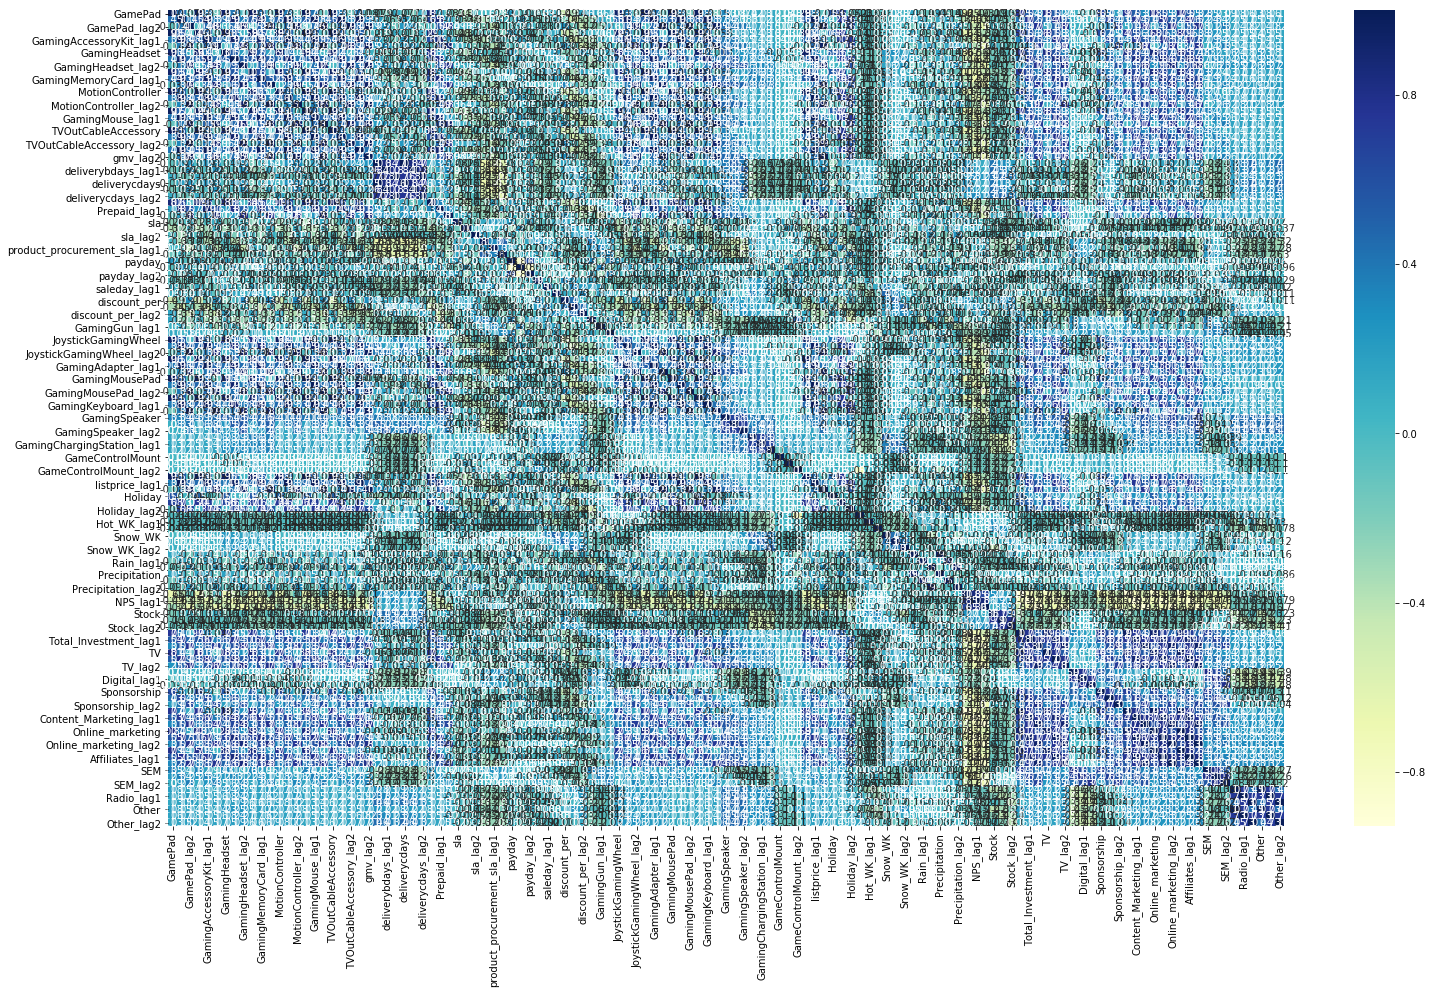

In [942]:
### Correlation Matrix
plt.figure(figsize = (25, 15))
sns.heatmap(gaming_withoutGMV.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [943]:
# Calculate the VIFs 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = gaming_withoutGMV.copy()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features  VIF
0    GamePad                       inf
79   Hot_WK_lag2                   inf
92   Stock                         inf
91   NPS_lag2                      inf
90   NPS_lag1                      inf
..        ...                      ...
37   product_procurement_sla_lag2  inf
36   product_procurement_sla_lag1  inf
35   product_procurement_sla       inf
34   sla_lag2                      inf
124  Other_lag2                    inf

[125 rows x 2 columns]

In [944]:
#creating the train and validation set from orignial data set

train = gaming_lag[:int(0.7*(len(gaming_lag)))]
test = gaming_lag[int(0.7*(len(gaming_lag))):]

In [945]:
gaming_lag.columns

Index(['GamePad', 'GamePad_lag1', 'GamePad_lag2', 'GamingAccessoryKit',
       'GamingAccessoryKit_lag1', 'GamingAccessoryKit_lag2', 'GamingHeadset',
       'GamingHeadset_lag1', 'GamingHeadset_lag2', 'GamingMemoryCard',
       ...
       'Affiliates_lag2', 'SEM', 'SEM_lag1', 'SEM_lag2', 'Radio', 'Radio_lag1',
       'Radio_lag2', 'Other', 'Other_lag1', 'Other_lag2'],
      dtype='object', length=126)

In [946]:
#Feature selection using rFE
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

X=train.copy()
X=X.drop('gmv',axis=1)
Y=train['gmv']
estimator_lr=LinearRegression()
rfe = RFE(estimator_lr, 15)             # running RFE
rfe = rfe.fit(X,Y)

In [947]:
ranking=pd.DataFrame(list(zip(X.columns,rfe.support_,rfe.ranking_)),columns=('Feature','FistList','Rank'))
ranking. head(3)

Feature  FistList  Rank
0  GamePad       True      1   
1  GamePad_lag1  False     89  
2  GamePad_lag2  False     95

In [948]:
col_rfe = X.columns[rfe.support_]
col_rfe

Index(['GamePad', 'GamingHeadset', 'GamingMouse', 'TVOutCableAccessory',
       'deliverycdays_lag2', 'GamingGun_lag2', 'JoystickGamingWheel',
       'GamingAdapter', 'GamingMousePad_lag1', 'GamingKeyboard_lag1',
       'listprice', 'Holiday', 'TV_lag1', 'Online_marketing', 'SEM'],
      dtype='object')

In [949]:
ranking.loc[(ranking.Rank >= 2) & (ranking.Rank<=15)]

Feature  FistList  Rank
5    GamingAccessoryKit_lag2  False     9   
9    GamingMemoryCard         False     4   
38   payday                   False     8   
39   payday_lag1              False     10  
42   saleday_lag1             False     13  
43   saleday_lag2             False     6   
48   GamingGun_lag1           False     7   
55   GamingAdapter_lag2       False     15  
56   GamingMousePad           False     14  
59   GamingKeyboard           False     12  
64   GamingSpeaker_lag2       False     2   
88   Precipitation_lag2       False     11  
96   Total_Investment_lag1    False     3   
118  SEM_lag2                 False     5

In [950]:
# Calculate the VIFs 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = gaming_withoutGMV.copy()
X=X[col_rfe]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features       VIF
10  listprice            11011.03
0   GamePad              6244.15 
13  Online_marketing     2618.83 
14  SEM                  1055.87 
12  TV_lag1              801.58  
9   GamingKeyboard_lag1  632.15  
8   GamingMousePad_lag1  512.21  
1   GamingHeadset        467.34  
3   TVOutCableAccessory  392.18  
2   GamingMouse          376.16  
7   GamingAdapter        306.14  
6   JoystickGamingWheel  53.25   
5   GamingGun_lag2       15.17   
4   deliverycdays_lag2   9.65    
11  Holiday              5.34

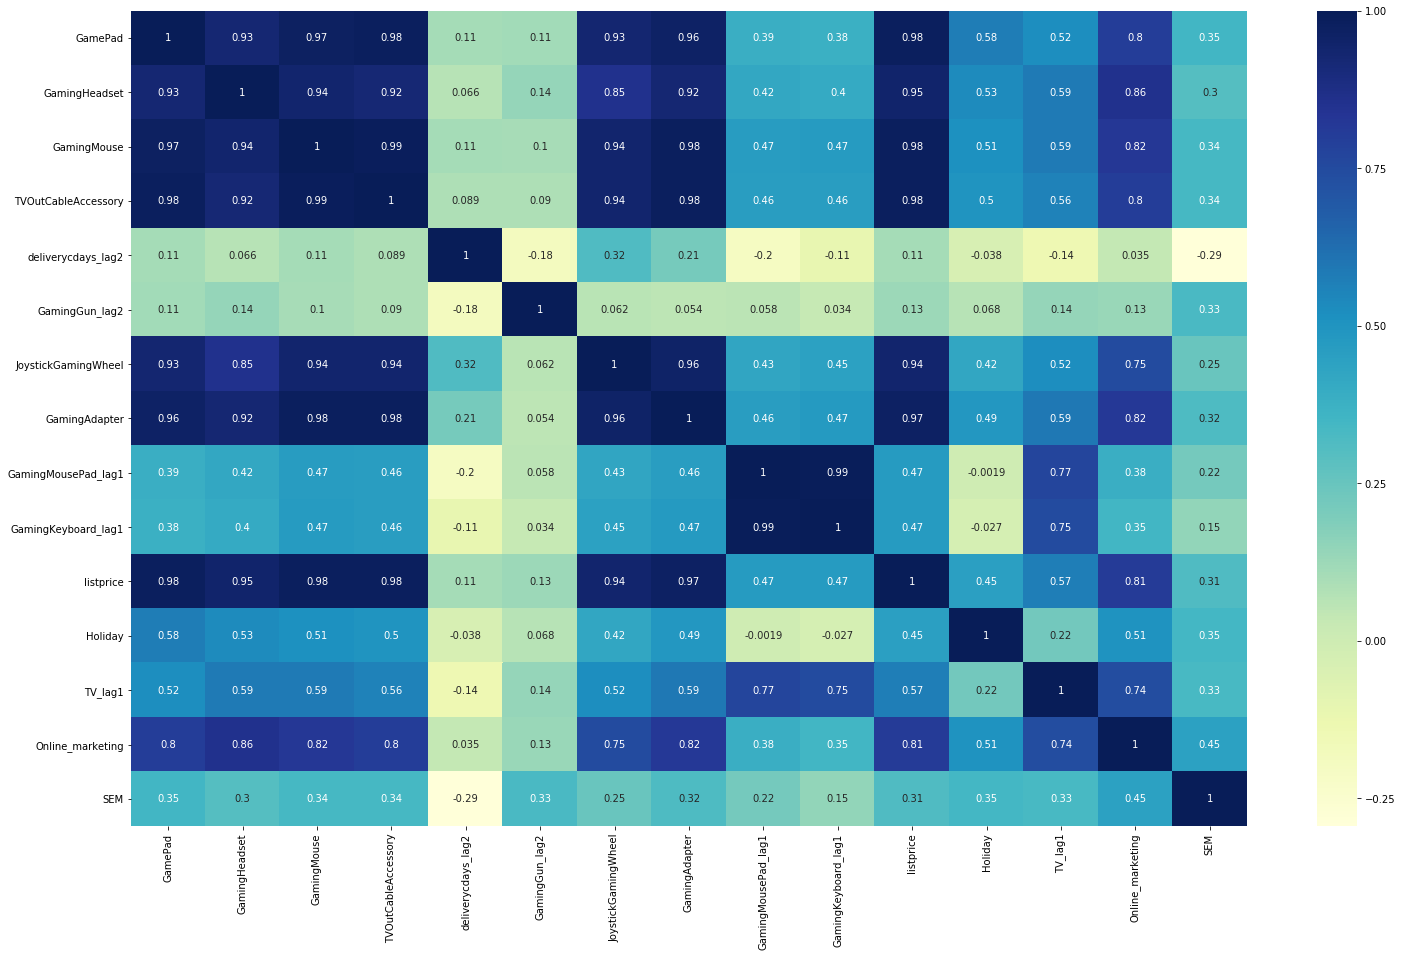

In [951]:
### Correlation Matrix
plt.figure(figsize = (25, 15))
sns.heatmap(X.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [952]:
## remove attributes with high multicolinearity 
col_rfe=['GamePad', 'GamingHeadset_lag1', 'GamingMouse', 'Prepaid',
       'Prepaid_lag1', 'GamingGun', 'GamingGun_lag1', 'GamingKeyboard',
        'Holiday', 'Hot_WK_lag1', 'Total_Investment',
       'Digital_lag1', 'Sponsorship', 'SEM']

vif = pd.DataFrame()
X = gaming_withoutGMV.copy()
X=X[col_rfe]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features      VIF
10  Total_Investment    3452.50
13  SEM                 2719.89
0   GamePad             1258.55
12  Sponsorship         828.30 
11  Digital_lag1        571.35 
2   GamingMouse         440.85 
7   GamingKeyboard      418.95 
1   GamingHeadset_lag1  161.23 
3   Prepaid             69.92  
4   Prepaid_lag1        34.66  
5   GamingGun           17.76  
6   GamingGun_lag1      13.03  
8   Holiday             2.24   
9   Hot_WK_lag1         1.43

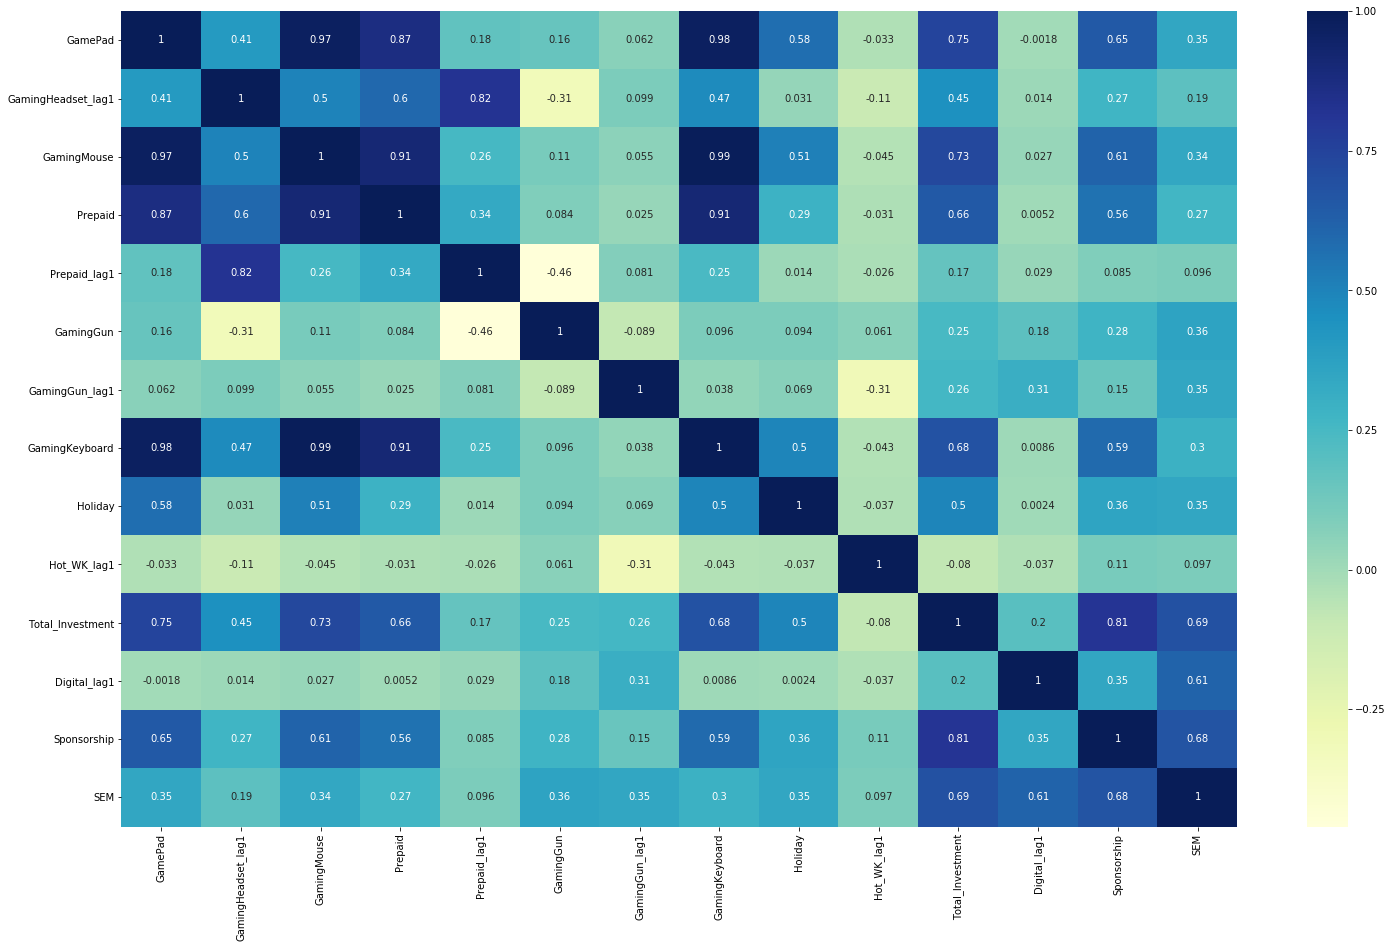

In [953]:
### Correlation Matrix
plt.figure(figsize = (25, 15))
sns.heatmap(X.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [954]:
## remove attributes with high multicolinearity 
col_rfe=['GamePad', 'GamingHeadset_lag1', 'GamingMouse', 'Prepaid',
       'Prepaid_lag1', 'GamingGun', 'GamingGun_lag1', 'GamingKeyboard',
        'Holiday', 'Hot_WK_lag1', 'Digital_lag1', 'Sponsorship', 'SEM']


vif = pd.DataFrame()
X = gaming_withoutGMV.copy()
X=X[col_rfe]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features      VIF
12  SEM                 1539.60
0   GamePad             948.12 
11  Sponsorship         711.28 
10  Digital_lag1        541.46 
2   GamingMouse         435.06 
7   GamingKeyboard      380.37 
1   GamingHeadset_lag1  142.79 
3   Prepaid             69.60  
4   Prepaid_lag1        31.56  
5   GamingGun           16.56  
6   GamingGun_lag1      12.75  
8   Holiday             2.24   
9   Hot_WK_lag1         1.28

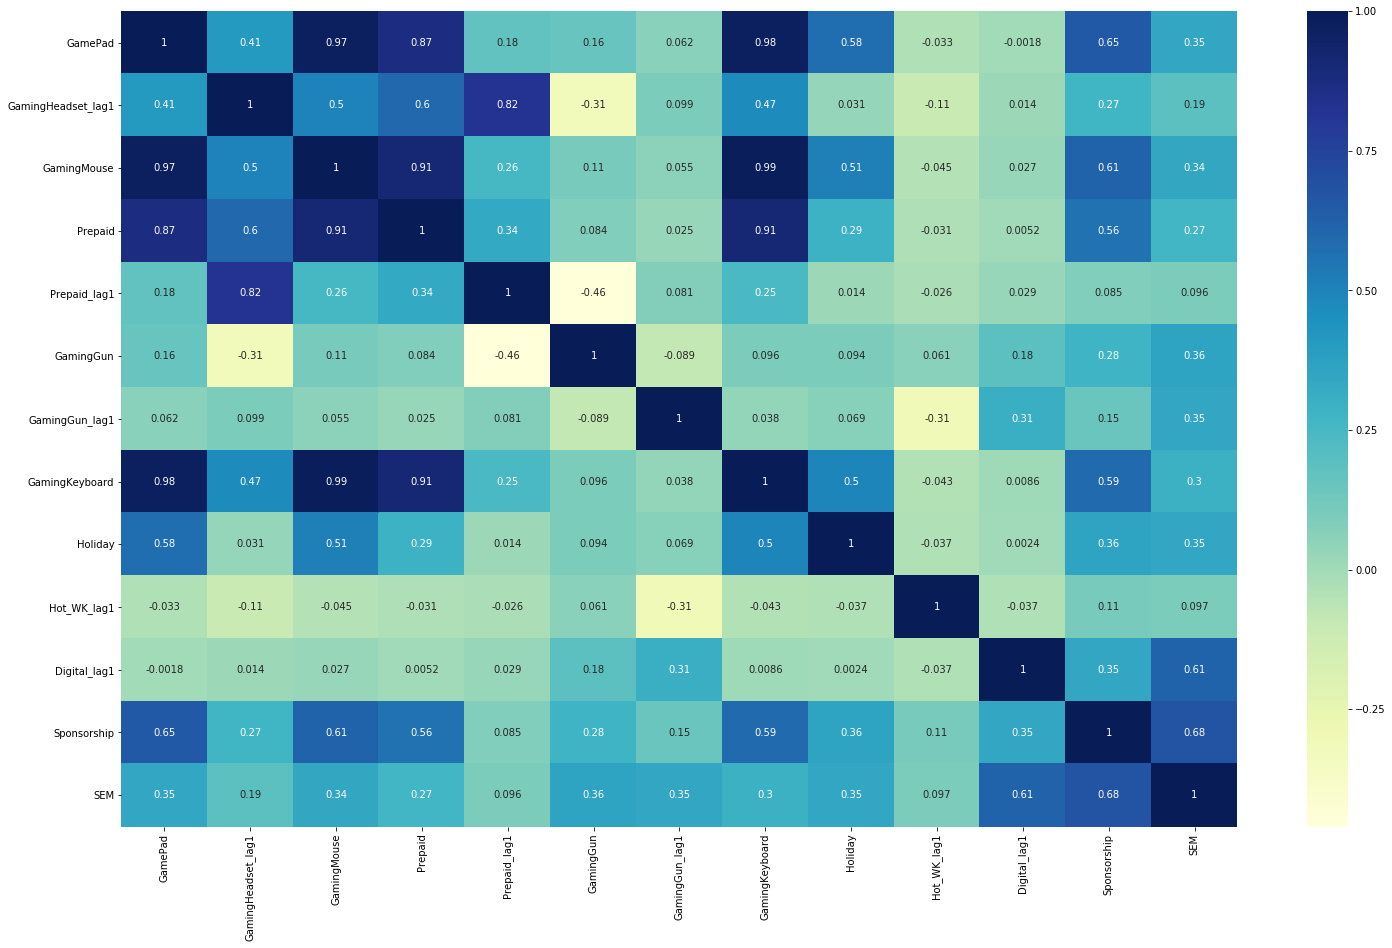

In [955]:
### Correlation Matrix
plt.figure(figsize = (25, 15))
sns.heatmap(X.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [956]:
## remove attributes with high multicolinearity 
col_rfe=['GamingHeadset_lag1', 'GamingMouse', 'Prepaid',
       'Prepaid_lag1', 'GamingGun', 'GamingGun_lag1', 'GamingKeyboard',
        'Holiday', 'Hot_WK_lag1', 'Digital_lag1', 'Sponsorship','SEM']


vif = pd.DataFrame()
X = gaming_withoutGMV.copy()
X=X[col_rfe]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features      VIF
11  SEM                 1155.03
10  Sponsorship         627.17 
9   Digital_lag1        505.45 
1   GamingMouse         434.12 
6   GamingKeyboard      309.95 
0   GamingHeadset_lag1  142.75 
2   Prepaid             69.38  
3   Prepaid_lag1        30.33  
4   GamingGun           15.61  
5   GamingGun_lag1      12.02  
7   Holiday             2.09   
8   Hot_WK_lag1         1.23

In [957]:
## remove attributes with high multicolinearity 
col_rfe=['GamingHeadset_lag1', 'GamingMouse', 'Prepaid',
       'Prepaid_lag1', 'GamingGun', 'GamingGun_lag1', 'GamingKeyboard',
        'Holiday', 'Hot_WK_lag1', 'Digital_lag1', 'Sponsorship']


vif = pd.DataFrame()
X = gaming_withoutGMV.copy()
X=X[col_rfe]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
1   GamingMouse         425.13
10  Sponsorship         339.84
6   GamingKeyboard      298.18
9   Digital_lag1        264.01
0   GamingHeadset_lag1  139.93
2   Prepaid             69.37 
3   Prepaid_lag1        30.28 
4   GamingGun           15.61 
5   GamingGun_lag1      11.90 
7   Holiday             1.98  
8   Hot_WK_lag1         1.23

In [958]:
### Build model using the features identified using VIF & Correlation  - manual & RFE  approach.

import statsmodels.api as sm
X=train[col_rfe]
X = sm.add_constant(X)
y=train['gmv']
gaming_lag_mul_m1 = sm.OLS(y,X).fit()
gaming_lag_mul_m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     393.5
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.35e-22
Time:                        22:33:40   Log-Likelihood:                 26.542
No. Observations:                  34   AIC:                            -29.08
Df Residuals:                      22   BIC:                            -10.77
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 12.0955      0.569     21.270      0.000      10.916      13.275
GamingHeadset_lag1    -0.0596      0.053     -1.128      0.272      -0.169       0.050
GamingMouse            0.0347      0.115      0.301      0.766      -0.204       0.274
Prepaid                0.3937      0.149      2.649      0.015       0.085       0.702
Prepaid_lag1           0.0184      0.022      0.829      0.416      -0.028       0.064
GamingGun              0.0020      0.010      0.192      0.849      -0.020       0.024
GamingGun_lag1        -0.0072      0.009     -0.806      0.429      -0.026       0.011
GamingKeyboard        -0.0063      0.102     -0.062      0.951      -0.217       0.205
Holiday                0.3246      0.135      2.411      0.025       0.045       0.604
Hot_WK_lag1           -0.0167      0.012     -1.380      0.181      -0.042       0.008
Digital_lag1          -0.0812      0.039     -2.083      0.049      -0.162      -0.000
Sponsorship            0.0745      0.034      2.195      0.039       0.004       0.145
==============================================================================
Omnibus:                        0.844   Durbin-Watson:                   1.836
Prob(Omnibus):                  0.656   Jarque-Bera (JB):                0.893
Skew:                           0.266   Prob(JB):                        0.640
Kurtosis:                       2.410   Cond. No.                         654.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [959]:
col_rfe=['GamingHeadset_lag1', 'GamingMouse', 'Prepaid',
       'Prepaid_lag1', 'GamingGun', 'GamingGun_lag1', 'GamingKeyboard',
        'Holiday', 'Hot_WK_lag1', 'Digital_lag1', 'Sponsorship']

vif = pd.DataFrame()
X = gaming_withoutGMV.copy()
X=X[col_rfe]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
1   GamingMouse         425.13
10  Sponsorship         339.84
6   GamingKeyboard      298.18
9   Digital_lag1        264.01
0   GamingHeadset_lag1  139.93
2   Prepaid             69.37 
3   Prepaid_lag1        30.28 
4   GamingGun           15.61 
5   GamingGun_lag1      11.90 
7   Holiday             1.98  
8   Hot_WK_lag1         1.23

In [960]:
import statsmodels.api as sm
X=train[col_rfe]
X = sm.add_constant(X)
y=train['gmv']
gaming_lag_mul_m2 = sm.OLS(y,X).fit()
gaming_lag_mul_m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     393.5
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.35e-22
Time:                        22:33:41   Log-Likelihood:                 26.542
No. Observations:                  34   AIC:                            -29.08
Df Residuals:                      22   BIC:                            -10.77
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 12.0955      0.569     21.270      0.000      10.916      13.275
GamingHeadset_lag1    -0.0596      0.053     -1.128      0.272      -0.169       0.050
GamingMouse            0.0347      0.115      0.301      0.766      -0.204       0.274
Prepaid                0.3937      0.149      2.649      0.015       0.085       0.702
Prepaid_lag1           0.0184      0.022      0.829      0.416      -0.028       0.064
GamingGun              0.0020      0.010      0.192      0.849      -0.020       0.024
GamingGun_lag1        -0.0072      0.009     -0.806      0.429      -0.026       0.011
GamingKeyboard        -0.0063      0.102     -0.062      0.951      -0.217       0.205
Holiday                0.3246      0.135      2.411      0.025       0.045       0.604
Hot_WK_lag1           -0.0167      0.012     -1.380      0.181      -0.042       0.008
Digital_lag1          -0.0812      0.039     -2.083      0.049      -0.162      -0.000
Sponsorship            0.0745      0.034      2.195      0.039       0.004       0.145
==============================================================================
Omnibus:                        0.844   Durbin-Watson:                   1.836
Prob(Omnibus):                  0.656   Jarque-Bera (JB):                0.893
Skew:                           0.266   Prob(JB):                        0.640
Kurtosis:                       2.410   Cond. No.                         654.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [961]:
col_rfe=['GamingHeadset_lag1', 'Prepaid',
       'Prepaid_lag1', 'GamingGun', 'GamingGun_lag1', 'GamingKeyboard',
        'Holiday', 'Hot_WK_lag1', 'Digital_lag1', 'Sponsorship']


vif = pd.DataFrame()
X = gaming_withoutGMV.copy()
X=X[col_rfe]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
9  Sponsorship         336.40
8  Digital_lag1        263.94
0  GamingHeadset_lag1  115.79
1  Prepaid             69.37 
5  GamingKeyboard      30.38 
2  Prepaid_lag1        28.41 
3  GamingGun           15.12 
4  GamingGun_lag1      11.69 
6  Holiday             1.81  
7  Hot_WK_lag1         1.22

In [962]:
import statsmodels.api as sm
X=train[col_rfe]
X = sm.add_constant(X)
y=train['gmv']
gaming_lag_mul_m3 = sm.OLS(y,X).fit()
gaming_lag_mul_m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     450.6
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           6.40e-24
Time:                        22:33:41   Log-Likelihood:                 26.472
No. Observations:                  34   AIC:                            -30.94
Df Residuals:                      23   BIC:                            -14.15
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 12.0294      0.514     23.394      0.000      10.966      13.093
GamingHeadset_lag1    -0.0561      0.051     -1.110      0.278      -0.161       0.048
Prepaid                0.4267      0.099      4.331      0.000       0.223       0.631
Prepaid_lag1           0.0167      0.021      0.795      0.435      -0.027       0.060
GamingGun              0.0016      0.010      0.156      0.877      -0.019       0.023
GamingGun_lag1        -0.0075      0.009     -0.862      0.398      -0.026       0.011
GamingKeyboard        -0.0050      0.100     -0.050      0.961      -0.211       0.201
Holiday                0.3565      0.081      4.374      0.000       0.188       0.525
Hot_WK_lag1           -0.0166      0.012     -1.398      0.175      -0.041       0.008
Digital_lag1          -0.0763      0.035     -2.199      0.038      -0.148      -0.005
Sponsorship            0.0721      0.032      2.229      0.036       0.005       0.139
==============================================================================
Omnibus:                        0.628   Durbin-Watson:                   1.855
Prob(Omnibus):                  0.730   Jarque-Bera (JB):                0.733
Skew:                           0.240   Prob(JB):                        0.693
Kurtosis:                       2.463   Cond. No.                         581.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [963]:
col_rfe=['Prepaid',
       'Prepaid_lag1', 'GamingGun', 'GamingGun_lag1', 'GamingKeyboard',
        'Holiday', 'Hot_WK_lag1', 'Digital_lag1', 'Sponsorship']



vif = pd.DataFrame()
X = gaming_withoutGMV.copy()
X=X[col_rfe]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
8  Sponsorship     317.47
7  Digital_lag1    263.83
0  Prepaid         61.45 
4  GamingKeyboard  30.06 
2  GamingGun       14.90 
1  Prepaid_lag1    11.82 
3  GamingGun_lag1  11.68 
5  Holiday         1.77  
6  Hot_WK_lag1     1.17

In [964]:
import statsmodels.api as sm
X=train[col_rfe]
X = sm.add_constant(X)
y=train['gmv']
gaming_lag_mul_m21 = sm.OLS(y,X).fit()
gaming_lag_mul_m21.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     495.8
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           5.03e-25
Time:                        22:33:41   Log-Likelihood:                 25.585
No. Observations:                  34   AIC:                            -31.17
Df Residuals:                      24   BIC:                            -15.91
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             11.9952      0.516     23.257      0.000      10.931      13.060
Prepaid            0.3685      0.084      4.395      0.000       0.195       0.542
Prepaid_lag1      -0.0034      0.011     -0.323      0.750      -0.025       0.019
GamingGun          0.0047      0.010      0.482      0.634      -0.016       0.025
GamingGun_lag1    -0.0064      0.009     -0.731      0.472      -0.024       0.012
GamingKeyboard     0.0441      0.090      0.492      0.627      -0.141       0.229
Holiday            0.3246      0.077      4.235      0.000       0.166       0.483
Hot_WK_lag1       -0.0132      0.012     -1.146      0.263      -0.037       0.011
Digital_lag1      -0.0710      0.035     -2.057      0.051      -0.142       0.000
Sponsorship        0.0676      0.032      2.095      0.047       0.001       0.134
==============================================================================
Omnibus:                        1.671   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.434   Jarque-Bera (JB):                1.562
Skew:                           0.438   Prob(JB):                        0.458
Kurtosis:                       2.420   Cond. No.                         563.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [965]:
col_rfe=['Prepaid_lag1', 'GamingGun', 'GamingGun_lag1', 'GamingKeyboard',
        'Holiday', 'Hot_WK_lag1', 'Digital_lag1', 'Sponsorship']


vif = pd.DataFrame()
X = gaming_withoutGMV.copy()
X=X[col_rfe]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
7  Sponsorship     301.10
6  Digital_lag1    262.05
1  GamingGun       14.65 
2  GamingGun_lag1  11.66 
0  Prepaid_lag1    10.74 
3  GamingKeyboard  6.55  
4  Holiday         1.40  
5  Hot_WK_lag1     1.16

In [966]:
import statsmodels.api as sm
X=train[col_rfe]
X = sm.add_constant(X)
y=train['gmv']
gaming_lag_mul_m22 = sm.OLS(y,X).fit()
gaming_lag_mul_m22.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     320.5
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           3.18e-23
Time:                        22:33:41   Log-Likelihood:                 15.545
No. Observations:                  34   AIC:                            -13.09
Df Residuals:                      25   BIC:                            0.6464
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             12.5457      0.659     19.050      0.000      11.189      13.902
Prepaid_lag1       0.0131      0.013      0.997      0.329      -0.014       0.040
GamingGun          0.0146      0.013      1.164      0.256      -0.011       0.040
GamingGun_lag1    -0.0011      0.011     -0.094      0.926      -0.025       0.022
GamingKeyboard     0.4351      0.016     27.828      0.000       0.403       0.467
Holiday           -0.0009      0.026     -0.036      0.972      -0.054       0.053
Hot_WK_lag1       -0.0133      0.015     -0.878      0.388      -0.045       0.018
Digital_lag1      -0.1279      0.042     -3.036      0.006      -0.215      -0.041
Sponsorship        0.1320      0.038      3.494      0.002       0.054       0.210
==============================================================================
Omnibus:                        0.264   Durbin-Watson:                   1.657
Prob(Omnibus):                  0.877   Jarque-Bera (JB):                0.137
Skew:                           0.145   Prob(JB):                        0.934
Kurtosis:                       2.888   Cond. No.                         529.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [967]:
col_rfe=['Prepaid_lag1', 'GamingGun', 'GamingKeyboard',
        'Holiday', 'Hot_WK_lag1', 'Digital_lag1', 'Sponsorship']

vif = pd.DataFrame()
X = gaming_withoutGMV.copy()
X=X[col_rfe]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
6  Sponsorship     288.35
5  Digital_lag1    261.99
1  GamingGun       14.59 
0  Prepaid_lag1    10.72 
2  GamingKeyboard  6.54  
3  Holiday         1.39  
4  Hot_WK_lag1     1.09

In [968]:
import statsmodels.api as sm
X=train[col_rfe]
X = sm.add_constant(X)
y=train['gmv']
gaming_lag_mul_m23 = sm.OLS(y,X).fit()
gaming_lag_mul_m23.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     380.8
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.56e-24
Time:                        22:33:41   Log-Likelihood:                 15.539
No. Observations:                  34   AIC:                            -15.08
Df Residuals:                      26   BIC:                            -2.868
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             12.5753      0.568     22.131      0.000      11.407      13.743
Prepaid_lag1       0.0131      0.013      1.015      0.319      -0.013       0.040
GamingGun          0.0148      0.012      1.222      0.233      -0.010       0.040
GamingKeyboard     0.4352      0.015     28.486      0.000       0.404       0.467
Holiday           -0.0011      0.025     -0.042      0.967      -0.053       0.051
Hot_WK_lag1       -0.0129      0.014     -0.911      0.371      -0.042       0.016
Digital_lag1      -0.1286      0.041     -3.170      0.004      -0.212      -0.045
Sponsorship        0.1314      0.037      3.598      0.001       0.056       0.207
==============================================================================
Omnibus:                        0.298   Durbin-Watson:                   1.665
Prob(Omnibus):                  0.862   Jarque-Bera (JB):                0.141
Skew:                           0.151   Prob(JB):                        0.932
Kurtosis:                       2.909   Cond. No.                         439.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [969]:
col_rfe=['Prepaid_lag1', 'GamingKeyboard',
        'Holiday', 'Hot_WK_lag1', 'Digital_lag1', 'Sponsorship']

vif = pd.DataFrame()
X = gaming_withoutGMV.copy()
X=X[col_rfe]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
5  Sponsorship     286.68
4  Digital_lag1    260.56
0  Prepaid_lag1    7.89  
1  GamingKeyboard  6.28  
2  Holiday         1.39  
3  Hot_WK_lag1     1.08

In [970]:
import statsmodels.api as sm
X=train[col_rfe]
X = sm.add_constant(X)
y=train['gmv']
gaming_lag_mul_m4 = sm.OLS(y,X).fit()
gaming_lag_mul_m4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     436.1
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.47e-25
Time:                        22:33:41   Log-Likelihood:                 14.590
No. Observations:                  34   AIC:                            -15.18
Df Residuals:                      27   BIC:                            -4.496
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             12.3002      0.526     23.364      0.000      11.220      13.380
Prepaid_lag1       0.0053      0.011      0.467      0.644      -0.018       0.028
GamingKeyboard     0.4374      0.015     28.562      0.000       0.406       0.469
Holiday           -0.0042      0.026     -0.166      0.869      -0.057       0.048
Hot_WK_lag1       -0.0120      0.014     -0.840      0.408      -0.041       0.017
Digital_lag1      -0.1259      0.041     -3.078      0.005      -0.210      -0.042
Sponsorship        0.1416      0.036      3.943      0.001       0.068       0.215
==============================================================================
Omnibus:                        0.004   Durbin-Watson:                   1.682
Prob(Omnibus):                  0.998   Jarque-Bera (JB):                0.132
Skew:                           0.022   Prob(JB):                        0.936
Kurtosis:                       2.698   Cond. No.                         378.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [971]:
col_rfe=['Prepaid_lag1', 'GamingKeyboard',
         'Hot_WK_lag1', 'Digital_lag1', 'Sponsorship']

vif = pd.DataFrame()
X = gaming_withoutGMV.copy()
X=X[col_rfe]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
4  Sponsorship     285.44
3  Digital_lag1    258.55
0  Prepaid_lag1    7.75  
1  GamingKeyboard  5.25  
2  Hot_WK_lag1     1.08

In [972]:
import statsmodels.api as sm
X=train[col_rfe]
X = sm.add_constant(X)
y=train['gmv']
gaming_lag_mul_m5 = sm.OLS(y,X).fit()
gaming_lag_mul_m5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     542.1
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           6.03e-27
Time:                        22:33:41   Log-Likelihood:                 14.573
No. Observations:                  34   AIC:                            -17.15
Df Residuals:                      28   BIC:                            -7.988
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             12.3023      0.517     23.791      0.000      11.243      13.362
Prepaid_lag1       0.0056      0.011      0.520      0.607      -0.017       0.028
GamingKeyboard     0.4359      0.012     35.912      0.000       0.411       0.461
Hot_WK_lag1       -0.0119      0.014     -0.854      0.401      -0.041       0.017
Digital_lag1      -0.1254      0.040     -3.128      0.004      -0.208      -0.043
Sponsorship        0.1412      0.035      4.011      0.000       0.069       0.213
==============================================================================
Omnibus:                        0.003   Durbin-Watson:                   1.698
Prob(Omnibus):                  0.998   Jarque-Bera (JB):                0.145
Skew:                           0.020   Prob(JB):                        0.930
Kurtosis:                       2.683   Cond. No.                         378.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [973]:
col_rfe=['GamingKeyboard',
         'Hot_WK_lag1', 'Digital_lag1', 'Sponsorship']


vif = pd.DataFrame()
X = gaming_withoutGMV.copy()
X=X[col_rfe]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
3  Sponsorship     285.35
2  Digital_lag1    252.51
0  GamingKeyboard  5.00  
1  Hot_WK_lag1     1.08

In [974]:
import statsmodels.api as sm
X=train[col_rfe]
X = sm.add_constant(X)
y=train['gmv']
gaming_lag_mul_m6 = sm.OLS(y,X).fit()
gaming_lag_mul_m6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     695.0
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.44e-28
Time:                        22:33:42   Log-Likelihood:                 14.410
No. Observations:                  34   AIC:                            -18.82
Df Residuals:                      29   BIC:                            -11.19
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             12.3273      0.508     24.250      0.000      11.288      13.367
GamingKeyboard     0.4376      0.012     37.944      0.000       0.414       0.461
Hot_WK_lag1       -0.0120      0.014     -0.871      0.391      -0.040       0.016
Digital_lag1      -0.1218      0.039     -3.124      0.004      -0.202      -0.042
Sponsorship        0.1382      0.034      4.031      0.000       0.068       0.208
==============================================================================
Omnibus:                        0.040   Durbin-Watson:                   1.689
Prob(Omnibus):                  0.980   Jarque-Bera (JB):                0.241
Skew:                           0.026   Prob(JB):                        0.887
Kurtosis:                       2.591   Cond. No.                         362.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [975]:
col_rfe=['GamingKeyboard',
         'Hot_WK_lag1', 'Sponsorship']


vif = pd.DataFrame()
X = gaming_withoutGMV.copy()
X=X[col_rfe]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2  Sponsorship     3.71
0  GamingKeyboard  3.70
1  Hot_WK_lag1     1.04

In [976]:
import statsmodels.api as sm
X=train[col_rfe]
X = sm.add_constant(X)
y=train['gmv']
gaming_lag_mul_m7 = sm.OLS(y,X).fit()
gaming_lag_mul_m7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     714.7
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           5.57e-28
Time:                        22:33:42   Log-Likelihood:                 9.4778
No. Observations:                  34   AIC:                            -10.96
Df Residuals:                      30   BIC:                            -4.850
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             11.5143      0.496     23.197      0.000      10.501      12.528
GamingKeyboard     0.4475      0.013     35.501      0.000       0.422       0.473
Hot_WK_lag1       -0.0088      0.016     -0.559      0.580      -0.041       0.023
Sponsorship        0.0841      0.034      2.500      0.018       0.015       0.153
==============================================================================
Omnibus:                        1.382   Durbin-Watson:                   1.157
Prob(Omnibus):                  0.501   Jarque-Bera (JB):                1.116
Skew:                          -0.433   Prob(JB):                        0.572
Kurtosis:                       2.802   Cond. No.                         240.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [977]:
col_rfe=['GamingKeyboard',
          'Sponsorship']

vif = pd.DataFrame()
X = gaming_withoutGMV.copy()
X=X[col_rfe]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0  GamingKeyboard  3.69
1  Sponsorship     3.69

In [978]:
import statsmodels.api as sm
X=train[col_rfe]
X = sm.add_constant(X)
y=train['gmv']
gaming_lag_mul_m8 = sm.OLS(y,X).fit()
gaming_lag_mul_m8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     1096.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.73e-29
Time:                        22:33:42   Log-Likelihood:                 9.3016
No. Observations:                  34   AIC:                            -12.60
Df Residuals:                      31   BIC:                            -8.024
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             11.5619      0.484     23.910      0.000      10.576      12.548
GamingKeyboard     0.4485      0.012     36.379      0.000       0.423       0.474
Sponsorship        0.0811      0.033      2.470      0.019       0.014       0.148
==============================================================================
Omnibus:                        1.693   Durbin-Watson:                   1.131
Prob(Omnibus):                  0.429   Jarque-Bera (JB):                1.334
Skew:                          -0.479   Prob(JB):                        0.513
Kurtosis:                       2.840   Cond. No.                         237.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

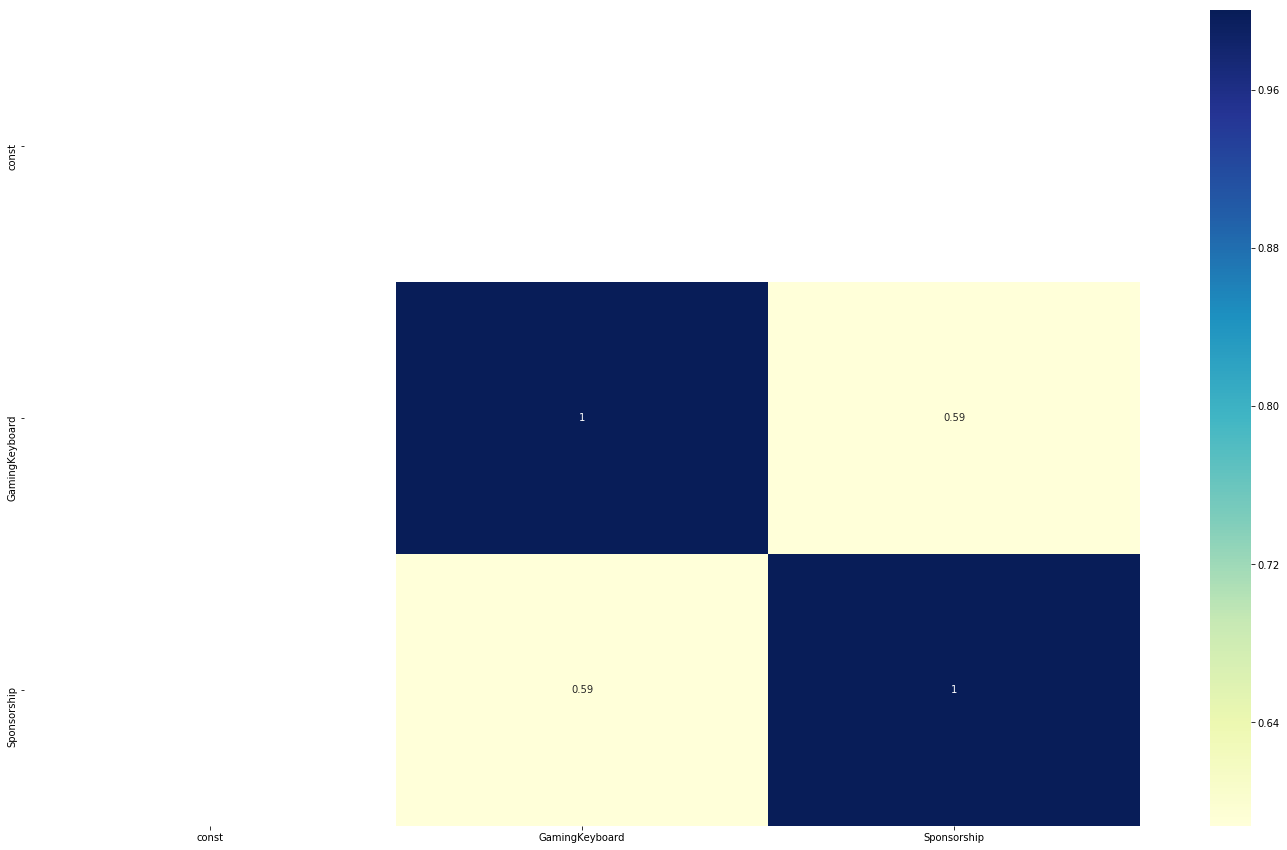

In [979]:
### Correlation Matrix
plt.figure(figsize = (25, 15))
sns.heatmap(X.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [980]:
#creating the train and validation set from orignial data set
### Validate Kfold timeseries split for mean RMSE .
X = gaming_lag.copy()
X=X[col_rfe]
y=gaming_lag['gmv']


[699723.3856588715]


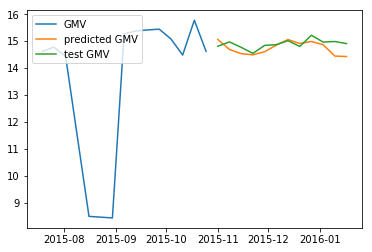

[699723.3856588715, 556296.180079742]


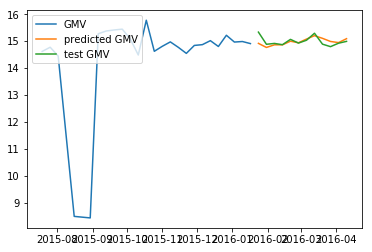

[699723.3856588715, 556296.180079742, 774191.9964273135]


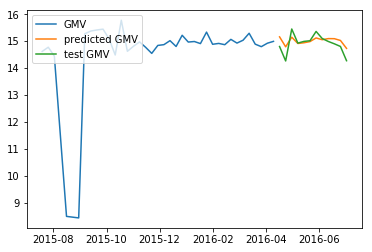

RMSE: 676737.1873886423


In [981]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

tscv = TimeSeriesSplit(n_splits = 3)
rmse = []

for train_index, test_index in tscv.split(X):
    cv_train, cv_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    cv_train = sm.add_constant(cv_train)
    cv_test=sm.add_constant(cv_test, prepend=True, has_constant='add')
    model = sm.OLS(y_train,cv_train).fit()
    predictions = model.predict(cv_test)
    true_values = y_test.values
    rmse.append(sqrt(mean_squared_error(np.exp(true_values), np.exp(predictions))))
    print(rmse)
    plt.plot(y_train.index,y_train, '-', label="GMV")
    plt.plot(y_test.index,predictions,'-',label="predicted GMV")
    plt.plot(y_test.index, y_test,'-',label="test GMV")
    plt.legend(loc='upper left')
    plt.show()
print("RMSE: {}".format(np.mean(rmse)))

In [982]:
### Test validation by fitting into the model
test_new=test[col_rfe]
test_new=sm.add_constant(test_new, prepend=True, has_constant='add')
test_new

const  GamingKeyboard  Sponsorship
Week                                          
2016-03-27  1.0    4.691348        16.257826  
2016-04-03  1.0    4.644391        16.071819  
2016-04-10  1.0    5.056246        15.753576  
2016-04-17  1.0    5.192957        15.753576  
2016-04-24  1.0    4.369448        15.753576  
2016-05-01  1.0    5.159055        15.790213  
2016-05-08  1.0    4.605170        15.985652  
2016-05-15  1.0    4.663439        15.985652  
2016-05-22  1.0    4.762174        15.985652  
2016-05-29  1.0    5.062595        15.985652  
2016-06-05  1.0    4.941642        15.845592  
2016-06-12  1.0    5.043425        15.783571  
2016-06-19  1.0    5.036953        15.783571  
2016-06-26  1.0    4.890349        15.783571  
2016-07-03  1.0    4.330733        15.223956

In [983]:
y_pred=gaming_lag_mul_m8.predict(test_new)
test_lr_reg=test.copy()
test_lr_reg['predicted_gmv']=np.exp(y_pred)

In [984]:
test['ActualGMV']=np.exp(test.gmv)

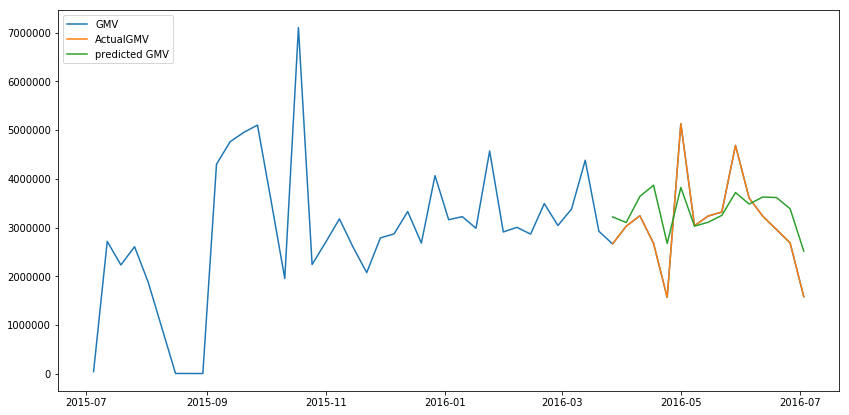

In [985]:
plt.figure(figsize=(14,7))
plt.plot(gaming_final.index,gaming_final.gmv, '-', label="GMV")

plt.plot(test.index, test.ActualGMV,'-',label="ActualGMV")
plt.plot(test.index,test_lr_reg.predicted_gmv,'-',label="predicted GMV")

plt.legend(loc='upper left')
plt.show()

In [986]:
from numpy import sqrt
from sklearn.metrics import mean_squared_error
camera_lr_reg_RMSE=sqrt(mean_squared_error(test.ActualGMV,test_lr_reg.predicted_gmv))
camera_lr_reg_RMSE

719145.9980168206

#### <div id=24></div>Model Summary
Model Adj -R2 :0.985<br>
Kfold mean RMSE: 676737<br>
Test RMSE :719145<br>
Features: GamingKeyboard, Sponshorship

In [988]:
# Calculate elasticity
df=gaming_lag_mul_m8.summary2().tables[1]
significant_vars=df.index
elasticity=pd.DataFrame()
for significant_var in significant_vars:
    if (significant_var!= 'const'):
        elasticityValue=df.loc[significant_var]['Coef.']*train[significant_var].mean()/train['gmv'].mean()
        data={'kpi':significant_var,'elasticityValue':elasticityValue}
        elasticity = elasticity.append(data, ignore_index=True)
elasticity

elasticityValue             kpi
0  0.121474         GamingKeyboard
1  0.086215         Sponsorship

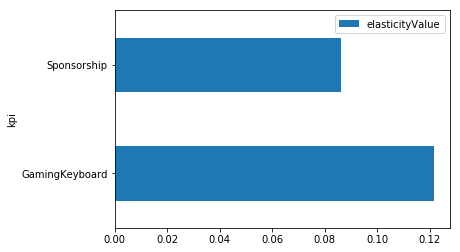

In [989]:
ax = elasticity.plot.barh(x='kpi', y='elasticityValue')